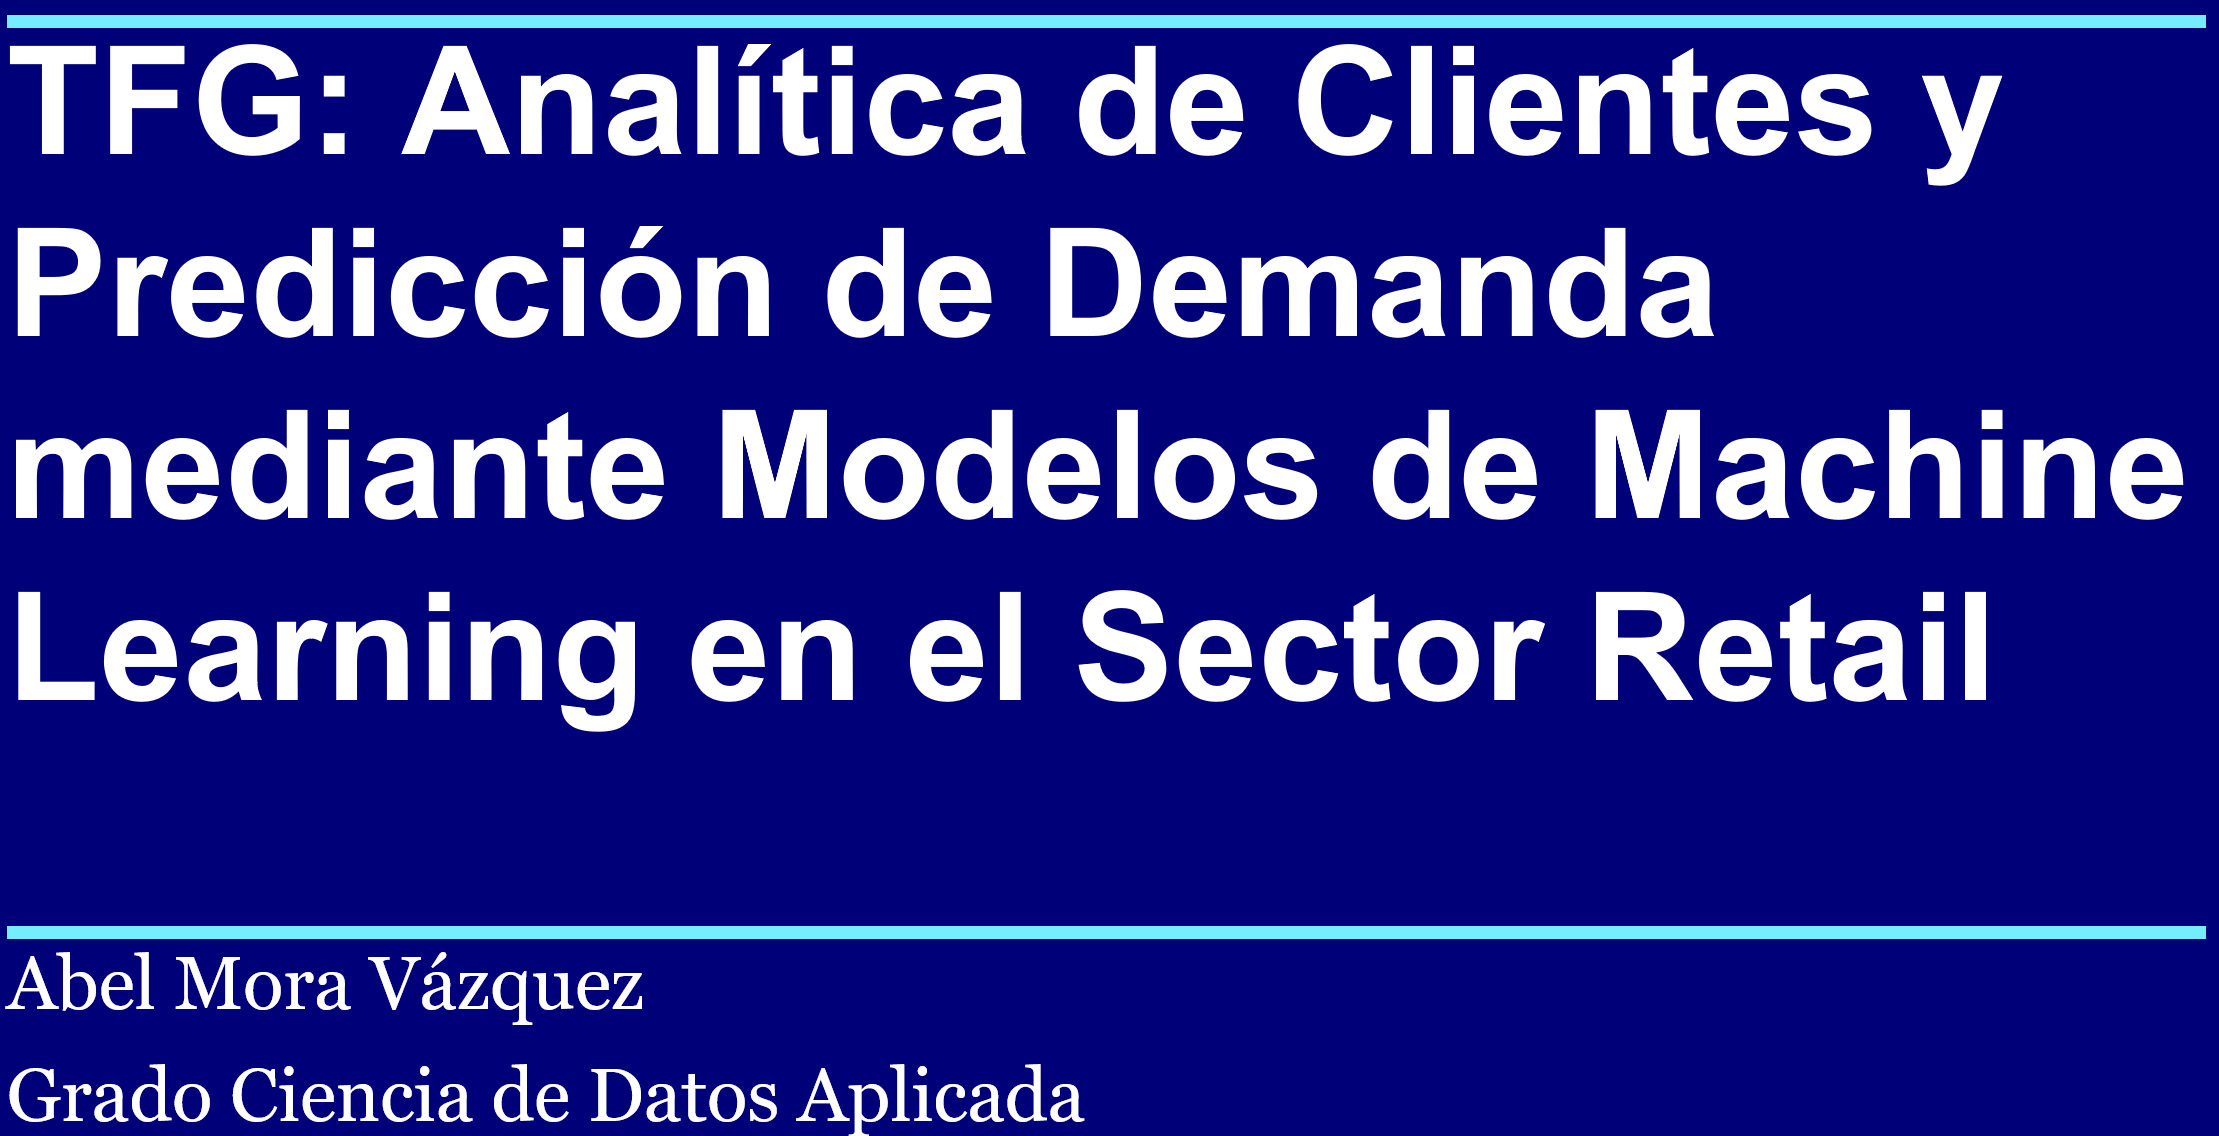

# 0. CARGA DE LIBRERIAS Y DATASETS

In [1]:
import warnings
import logging
from holidays import FutureIncompatibilityWarning
warnings.filterwarnings('ignore')
logging.getLogger('cmdstanpy').setLevel(logging.CRITICAL)

In [2]:
#Carga librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import silhouette_score
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from matplotlib.backends.backend_pdf import PdfPages
from transformers import pipeline
import re
import requests
import spacy
from transformers import pipeline
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from prophet.diagnostics import cross_validation, performance_metrics
from sklearn.impute import KNNImputer
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima import auto_arima

In [3]:
# Carga de los datasets
df_calendar = pd.read_csv('MavenMarket_Calendar.csv')
df_customers = pd.read_csv('MavenMarket_Customers.csv')
df_products = pd.read_csv('MavenMarket_Products.csv')
df_regions = pd.read_csv('MavenMarket_Regions.csv')
df_returns = pd.read_csv('MavenMarket_Returns_1997-1998.csv')
df_stores = pd.read_csv('MavenMarket_Stores.csv')
df_trans97 = pd.read_csv('MavenMarket_Transactions_1997.csv')
df_trans98 = pd.read_csv('MavenMarket_Transactions_1998.csv')

# 1. Analisis Exploratorio

## 1.1 Datasets

### 1.1.1  df_calendar

In [4]:
df_calendar.head()

date
0  1/1/1997
1  1/2/1997
2  1/3/1997
3  1/4/1997
4  1/5/1997

In [5]:
df_calendar.shape

(730, 1)

In [6]:
df_calendar.dtypes

date    object
dtype: object

In [7]:
df_calendar.nunique()

date    730
dtype: int64

In [8]:
df_calendar.isnull().sum()

date    0
dtype: int64

El dataset calendar contiene 730 registros en una columna. Los datos son de tipo object, no existen duplicados ni valores nulos.


In [9]:
# Se convierte la columna 'date' y 'acct_open_date' a tipo datetime
df_calendar['date'] = pd.to_datetime(df_calendar['date'])
df_customers['acct_open_date'] = pd.to_datetime(df_customers['acct_open_date'])

### 1.1.2 df_customers

In [10]:
df_customers.head()

customer_id  customer_acct_num first_name  last_name    customer_address  \
0            1        87462024688      Sheri     Nowmer    2433 Bailey Road   
1            2        87470586299    Derrick    Whelply  2219 Dewing Avenue   
2            3        87475757600     Jeanne      Derry     7640 First Ave.   
3            4        87500482201    Michael     Spence       337 Tosca Way   
4            5        87514054179       Maya  Gutierrez     8668 Via Neruda   

  customer_city customer_state_province  customer_postal_code  \
0      Tlaxiaco                  Oaxaca                 15057   
1         Sooke                      BC                 17172   
2      Issaquah                      WA                 73980   
3       Burnaby                      BC                 74674   
4        Novato                      CA                 57355   

  customer_country  birthdate marital_status yearly_income gender  \
0           Mexico  8/26/1961              M   $30K - $50K      F   
1           Canada   7/3/1915              S   $70K - $90K      M   
2              USA  6/21/1910              M   $50K - $70K      F   
3           Canada  6/20/1969              M   $10K - $30K      M   
4              USA  5/10/1951              S   $30K - $50K      F   

   total_children  num_children_at_home            education acct_open_date  \
0               4                     2  Partial High School     1991-09-10   
1               1                     0  Partial High School     1993-03-11   
2               1                     1     Bachelors Degree     1991-06-11   
3               4                     4  Partial High School     1994-05-21   
4               3                     0      Partial College     1992-08-21   

  member_card      occupation homeowner  
0      Bronze  Skilled Manual         Y  
1      Bronze    Professional         N  
2      Bronze    Professional         Y  
3      Normal  Skilled Manual         N  
4      Silver          Manual         N

In [11]:
df_customers.shape

(10281, 20)

In [12]:
df_customers.dtypes

customer_id                         int64
customer_acct_num                   int64
first_name                         object
last_name                          object
customer_address                   object
customer_city                      object
customer_state_province            object
customer_postal_code                int64
customer_country                   object
birthdate                          object
marital_status                     object
yearly_income                      object
gender                             object
total_children                      int64
num_children_at_home                int64
education                          object
acct_open_date             datetime64[ns]
member_card                        object
occupation                         object
homeowner                          object
dtype: object

In [13]:
df_customers.nunique()

customer_id                10281
customer_acct_num          10281
first_name                  2300
last_name                   5574
customer_address           10264
customer_city                108
customer_state_province       13
customer_postal_code        9841
customer_country               3
birthdate                   8149
marital_status                 2
yearly_income                  8
gender                         2
total_children                 6
num_children_at_home           6
education                      5
acct_open_date              1648
member_card                    4
occupation                     5
homeowner                      2
dtype: int64

In [14]:
df_customers.isnull().sum()

customer_id                0
customer_acct_num          0
first_name                 0
last_name                  1
customer_address           0
customer_city              0
customer_state_province    0
customer_postal_code       0
customer_country           0
birthdate                  0
marital_status             0
yearly_income              0
gender                     0
total_children             0
num_children_at_home       0
education                  0
acct_open_date             0
member_card                0
occupation                 0
homeowner                  0
dtype: int64

In [15]:
# Existe un valor para el apellido que es nulo. Se imprime el registro para ver las características en el resto de columnas.
nulos = df_customers[df_customers['last_name'].isnull()]
print(nulos)

      customer_id  customer_acct_num first_name last_name customer_address  \
5139         5140        40265998244     Robert       NaN        2874 Tice   

     customer_city customer_state_province  customer_postal_code  \
5139      Santa Fe                      DF                 55238   

     customer_country  birthdate marital_status yearly_income gender  \
5139           Mexico  4/18/1917              S   $70K - $90K      F   

      total_children  num_children_at_home        education acct_open_date  \
5139               1                     0  Graduate Degree     1991-02-10   

     member_card  occupation homeowner  
5139      Silver  Management         N  


In [16]:
# Como se tienen todos los registros del resto de columnas se sustituye el NaN por 'Unknown' así no se pierde el registro
df_customers['last_name'] = df_customers['last_name'].fillna('Unknown')

# Ahora asignado el apellido Unknown
print(df_customers[df_customers['last_name'] == 'Unknown'])

      customer_id  customer_acct_num first_name last_name customer_address  \
5139         5140        40265998244     Robert   Unknown        2874 Tice   

     customer_city customer_state_province  customer_postal_code  \
5139      Santa Fe                      DF                 55238   

     customer_country  birthdate marital_status yearly_income gender  \
5139           Mexico  4/18/1917              S   $70K - $90K      F   

      total_children  num_children_at_home        education acct_open_date  \
5139               1                     0  Graduate Degree     1991-02-10   

     member_card  occupation homeowner  
5139      Silver  Management         N  


In [17]:
df_customers['customer_city'].unique()

array(['Tlaxiaco', 'Sooke', 'Issaquah', 'Burnaby', 'Novato', 'Lynnwood',
       'San Andres', 'Richmond', 'Lake Oswego', 'La Mesa', 'Chula Vista',
       'Mexico City', 'Lincoln Acres', 'Oak Bay', 'Camacho', 'Arcadia',
       'Altadena', 'Oakland', 'Spring Valley', 'Renton', 'Bellingham',
       'La Jolla', 'Santa Fe', 'Haney', 'Burbank', 'Anacortes', 'Everett',
       'Milwaukie', 'Concord', 'Ladner', 'Santa Cruz', 'Merida',
       'Oregon City', 'Seattle', 'Lebanon', 'W. Linn', 'Bellflower',
       'Mill Valley', 'Tixapan', 'Metchosin', 'Grossmont',
       'Imperial Beach', 'Langley', 'Tacoma', 'Santa Monica', 'Beaverton',
       'Westminster', 'Hidalgo', 'Los Angeles', 'Coronado', 'La Cruz',
       'Shawnee', 'Yakima', 'Ballard', 'Port Orchard', 'Downey', 'Salem',
       'Lemon Grove', 'Bremerton', 'N. Vancouver', 'Woodland Hills',
       'Long Beach', 'Woodburn', 'Vancouver', 'San Jose', 'Langford',
       'Acapulco', 'National City', 'Cliffside', 'Newton', 'West Covina',
       'P

In [18]:
df_customers['customer_postal_code'].unique()

array([15057, 17172, 73980, ..., 71758, 42550, 27746], dtype=int64)

In [19]:
df_customers['customer_country'].unique()

array(['Mexico', 'Canada', 'USA'], dtype=object)

In [20]:
df_customers['customer_city'].unique()

array(['Tlaxiaco', 'Sooke', 'Issaquah', 'Burnaby', 'Novato', 'Lynnwood',
       'San Andres', 'Richmond', 'Lake Oswego', 'La Mesa', 'Chula Vista',
       'Mexico City', 'Lincoln Acres', 'Oak Bay', 'Camacho', 'Arcadia',
       'Altadena', 'Oakland', 'Spring Valley', 'Renton', 'Bellingham',
       'La Jolla', 'Santa Fe', 'Haney', 'Burbank', 'Anacortes', 'Everett',
       'Milwaukie', 'Concord', 'Ladner', 'Santa Cruz', 'Merida',
       'Oregon City', 'Seattle', 'Lebanon', 'W. Linn', 'Bellflower',
       'Mill Valley', 'Tixapan', 'Metchosin', 'Grossmont',
       'Imperial Beach', 'Langley', 'Tacoma', 'Santa Monica', 'Beaverton',
       'Westminster', 'Hidalgo', 'Los Angeles', 'Coronado', 'La Cruz',
       'Shawnee', 'Yakima', 'Ballard', 'Port Orchard', 'Downey', 'Salem',
       'Lemon Grove', 'Bremerton', 'N. Vancouver', 'Woodland Hills',
       'Long Beach', 'Woodburn', 'Vancouver', 'San Jose', 'Langford',
       'Acapulco', 'National City', 'Cliffside', 'Newton', 'West Covina',
       'P

In [21]:
df_customers['marital_status'].unique()

array(['M', 'S'], dtype=object)

In [22]:
df_customers['yearly_income'].unique()

array(['$30K - $50K', '$70K - $90K', '$50K - $70K', '$10K - $30K',
       '$90K - $110K', '$110K - $130K', '$130K - $150K', '$150K +'],
      dtype=object)

In [23]:
df_customers['gender'].unique()

array(['F', 'M'], dtype=object)

In [24]:
df_customers['total_children'].unique()

array([4, 1, 3, 2, 5, 0], dtype=int64)

In [25]:
df_customers['num_children_at_home'].unique()

array([2, 0, 1, 4, 3, 5], dtype=int64)

In [26]:
df_customers['education'].unique()

array(['Partial High School', 'Bachelors Degree', 'Partial College',
       'High School Degree', 'Graduate Degree'], dtype=object)

In [27]:
df_customers['member_card'].unique()

array(['Bronze', 'Normal', 'Silver', 'Golden'], dtype=object)

In [28]:
df_customers['occupation'].unique()

array(['Skilled Manual', 'Professional', 'Manual', 'Management',
       'Clerical'], dtype=object)

In [29]:
df_customers['homeowner'].unique()

array(['Y', 'N'], dtype=object)

Para el df customers se observa que existen 10281 registros y 20 columnas. En cuanto a id de cliente no existen duplicados. Se observa que existen 108 ciudades diferentes 13 estados o provincias, 3 paises de procedencia, 2 tipos de estado marital, 8 tramos de ingresos, 2 generos, total de hijos de 0 a 5 (se podría clasificar como sin hijos, familia 1-2, familia numerosa 3-5), 5 niveles de educación, 4 tipos de tarjeta de membresia, 5 niveles de ocupación y 2 posibles resultados en cuando a propietario de vivienda.
Se crean 3 columnas nuevas: 

   - age: edad del cliente en la fecha de transacción.

   - age_group: grupo de edad al aque pertenece el cliente clasificado entre menor, joven, adulto y senior.

   - generation: grupo de generación al que pertenece el cliente. Millenials(1981-1996), Generación X(1965-1980), Baby Boomers(1946-1964) o Silent Generation nacidos antes de 1946.

### Agrupación de clientes por edad

In [30]:
# Se combinan las transacciones de 1997 y 1998
df_transactions = pd.concat([df_trans97, df_trans98], ignore_index=True)

# Se convierten las columnas en formato de fecha
df_customers['birthdate'] = pd.to_datetime(df_customers['birthdate'])
df_transactions['transaction_date'] = pd.to_datetime(df_transactions['transaction_date'])

# Función para calcular la edad basada en la fecha de transacción
def calculate_age(transaction_date, birthdate):
    return transaction_date.year - birthdate.year - ((transaction_date.month, transaction_date.day) < (birthdate.month, birthdate.day))

# Función para clasificar por grupo de edad
def age_group(age):
    if age < 18:
        return 'Minor'
    elif 18 <= age <= 30:
        return 'Young'
    elif 31 <= age <= 45:
        return 'Young Adult'
    elif 46 <= age <= 60:
        return 'Mid Adult'
    else:
        return 'Senior'

# Función para clasificar por generación
def classify_generation(birth_year):
    if 1981 <= birth_year <= 1996:
        return 'Millennials'
    elif 1965 <= birth_year <= 1980:
        return 'Generación X'
    elif 1946 <= birth_year <= 1964:
        return 'Baby Boomers'
    else:
        return 'Silent Generation'

# Se combinan `df_transactions` con la información de `df_customers`
df_customers_combined = df_customers
df_customers_combined = df_customers_combined.merge(
    df_transactions[['customer_id', 'transaction_date']],
    on='customer_id',
    how='left'
)

# Se calcula edad, grupo de edad y generación
df_customers_combined['age'] = df_customers_combined.apply(lambda row: calculate_age(row['transaction_date'], row['birthdate']), axis=1)
df_customers_combined['age_group'] = df_customers_combined['age'].apply(age_group)
df_customers_combined['generation'] = df_customers_combined['birthdate'].dt.year.apply(classify_generation)

Para asignar al cliente una edad fija y poder realizar los modelos de segmentación de clientes se ha decidido escoger la edad de la última transacción, ya que los procesos de recomendación de productos o de campañas de marketing irán dirigidas a la edad de la persona más actualizada.

In [31]:
# Se selecciona la edad de la última transacción y se aplica al df_customer
age_columns = (
    df_customers_combined
    .sort_values('transaction_date', ascending=False)  # Se ordenan por fecha de transacción descendente
    .drop_duplicates(subset=['customer_id'])  # Se eliminan duplicados y se conserva la última transacción
    [['customer_id', 'age', 'age_group', 'generation']] 
)
# Realizar el merge para actualizar `df_customers` con las nuevas columnas
df_customers = df_customers.merge(age_columns, on='customer_id', how='left')

In [32]:
# Resumen estadístico de las transacciones de la columna 'age'
age_summary = df_customers['age'].describe()
print(age_summary)

count    8842.000000
mean       52.673264
std        20.115089
min        16.000000
25%        35.000000
50%        53.000000
75%        70.000000
max        88.000000
Name: age, dtype: float64


In [33]:
# Conteo de clientes por generación
generation_summary = df_customers["generation"].value_counts()
display(generation_summary)

generation
Silent Generation    5208
Baby Boomers         2863
Generación X         2210
Name: count, dtype: int64

In [34]:
# Conteo de clientes por grupo de edad
age_group_summary = df_customers["age_group"].value_counts()
display(age_group_summary)

age_group
Senior         4856
Young Adult    1947
Mid Adult      1918
Young          1537
Minor            23
Name: count, dtype: int64

In [35]:
df_customers.head()

customer_id  customer_acct_num first_name  last_name    customer_address  \
0            1        87462024688      Sheri     Nowmer    2433 Bailey Road   
1            2        87470586299    Derrick    Whelply  2219 Dewing Avenue   
2            3        87475757600     Jeanne      Derry     7640 First Ave.   
3            4        87500482201    Michael     Spence       337 Tosca Way   
4            5        87514054179       Maya  Gutierrez     8668 Via Neruda   

  customer_city customer_state_province  customer_postal_code  \
0      Tlaxiaco                  Oaxaca                 15057   
1         Sooke                      BC                 17172   
2      Issaquah                      WA                 73980   
3       Burnaby                      BC                 74674   
4        Novato                      CA                 57355   

  customer_country  birthdate  ... total_children num_children_at_home  \
0           Mexico 1961-08-26  ...              4                    2   
1           Canada 1915-07-03  ...              1                    0   
2              USA 1910-06-21  ...              1                    1   
3           Canada 1969-06-20  ...              4                    4   
4              USA 1951-05-10  ...              3                    0   

             education  acct_open_date  member_card      occupation homeowner  \
0  Partial High School      1991-09-10       Bronze  Skilled Manual         Y   
1  Partial High School      1993-03-11       Bronze    Professional         N   
2     Bachelors Degree      1991-06-11       Bronze    Professional         Y   
3  Partial High School      1994-05-21       Normal  Skilled Manual         N   
4      Partial College      1992-08-21       Silver          Manual         N   

    age    age_group         generation  
0   NaN       Senior       Baby Boomers  
1   NaN       Senior  Silent Generation  
2  87.0       Senior  Silent Generation  
3   NaN       Senior       Generación X  
4  45.0  Young Adult       Baby Boomers  

[5 rows x 23 columns]

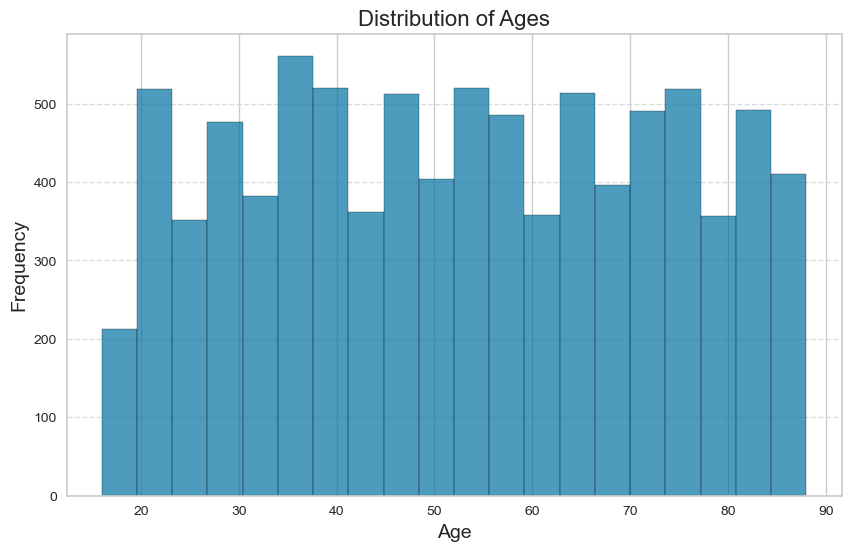

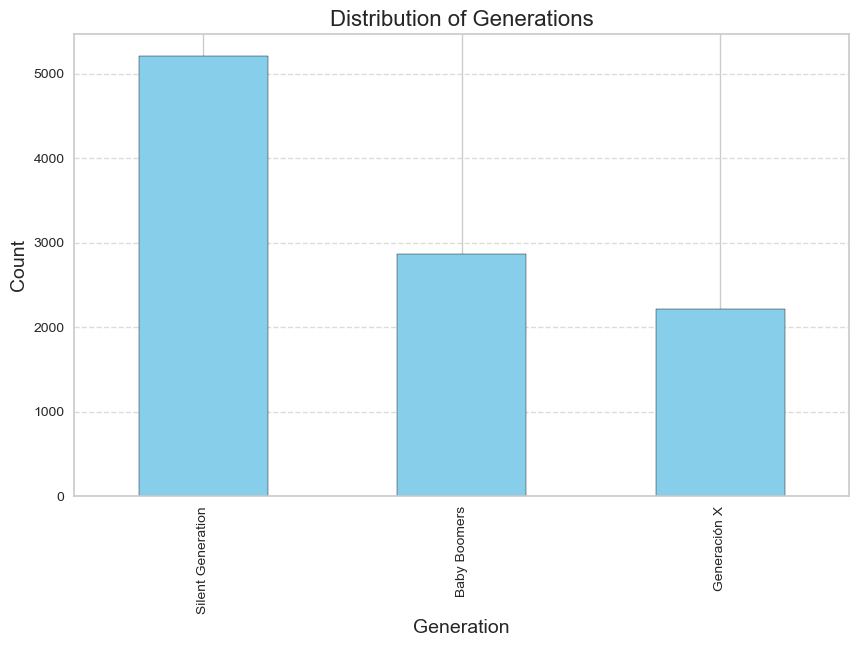

In [36]:
# Histograma de la columna age
plt.figure(figsize=(10, 6))
plt.hist(df_customers['age'].dropna(), bins=20, edgecolor='black', alpha=0.7)
plt.title('Distribution of Ages', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Histograma de la columna generation
plt.figure(figsize=(10, 6))
df_customers['generation'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Generations', fontsize=16)
plt.xlabel('Generation', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Se analiza los valores nulos tras obtener la edad de los clientes

In [37]:
df_customers.isnull().sum()

customer_id                   0
customer_acct_num             0
first_name                    0
last_name                     0
customer_address              0
customer_city                 0
customer_state_province       0
customer_postal_code          0
customer_country              0
birthdate                     0
marital_status                0
yearly_income                 0
gender                        0
total_children                0
num_children_at_home          0
education                     0
acct_open_date                0
member_card                   0
occupation                    0
homeowner                     0
age                        1439
age_group                     0
generation                    0
dtype: int64

In [38]:
# Clientes con edad con valores nulos
customers_with_null_age = df_customers[df_customers['age'].isnull()]
generations_of_null_age = customers_with_null_age[['customer_id', 'birthdate', 'generation']]
generations_of_null_age.head()

customer_id  birthdate         generation
0             1 1961-08-26       Baby Boomers
1             2 1915-07-03  Silent Generation
3             4 1969-06-20       Generación X
6             7 1949-03-27       Baby Boomers
12           13 1975-10-12       Generación X

In [39]:
# Conteo de clientes que no han realizado operaciones por generación
generation_counts = generations_of_null_age['generation'].value_counts()
generation_counts

generation
Silent Generation    745
Baby Boomers         387
Generación X         307
Name: count, dtype: int64

Se observa que existen clientes con tarjeta de fidelización que no han realizado ninguna operación durante los años 1997 y 1998.
Entre las causas que pueden explicar este motivo pueden ser las siguientes:
    
- No se ha identificado con la tarjeta de fidelización durante la compra.

- Se ha trasladado a una localidad donde no haya una tienda.

- No tiene interés de comprar en la cadena de supermercados y por lo tanto se ha perdido el cliente.

- Ha fallecido.

Estos son insights relevantes para el departamento de CRM y marketing ya que pueden actualzar bases de datos de clientes en caso de inoperatividad de la cuenta.

   - Para los pertenecientes a la Silent Generation. 
   
       - Anular la cuenta en caso de inoperatividad durante un periodo de 2 años ya que se podría entender que no tienen las facultades para ir a comprar o han fallecido  

- Para los clientes en la generación Baby Boomers.

    - Iniciar una campaña de recordatorio de pasar la tarjeta de identificación durante la compra incentivando el uso mediante descuentos.

- Para los clientes de la gerenación X. 

    - Iniciar una campaña de marketing mediante redes sociales y correo para que realicen las compras en los establecimientos.


### Agrupación de clientes por salario

In [40]:
# Segmentos ingreso anual
def segment_income(row):
    income = row['yearly_income']
    if '$10K - $30K' in income:
        return 'Low Income'
    elif '$30K - $50K' in income or '$50K - $70K' in income:
        return 'Mid Income'
    elif '$70K - $90K' in income or '$90K - $110K' in income or '$110K - $130K' in income or '$130K - $150K' in income or '$150K +' in income:
        return 'High Income'
    else:
        return 'Unknown'

df_customers['income_segment'] = df_customers.apply(segment_income, axis=1)

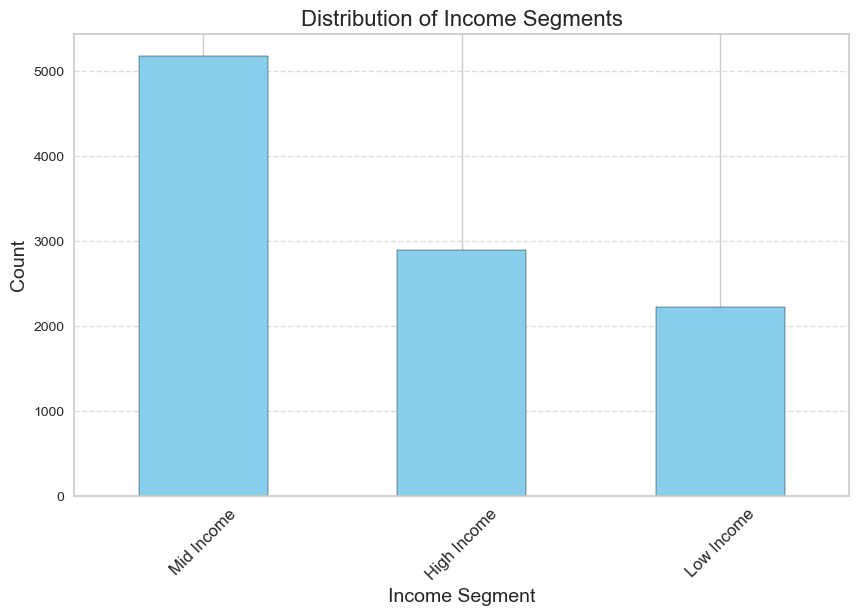

In [41]:
# Histograma de la columna income_segment
plt.figure(figsize=(10, 6))
df_customers['income_segment'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Income Segments', fontsize=16)
plt.xlabel('Income Segment', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, fontsize=12)
plt.show()

### Agrupación de clientes por educación

In [42]:
# Segmentos en la educación
def segment_education(row):
    education = row['education']
    if 'Partial High School' in education:
        return 'Low Education'
    elif  'High School Degree' in education or 'Partial College' in education:
        return 'Mid Education'
    elif 'Bachelors Degree' in education or 'Graduate Degree' in education:
        return 'High Education'
    else:
        return 'Unknown'

df_customers['education_segment'] = df_customers.apply(segment_education, axis=1)

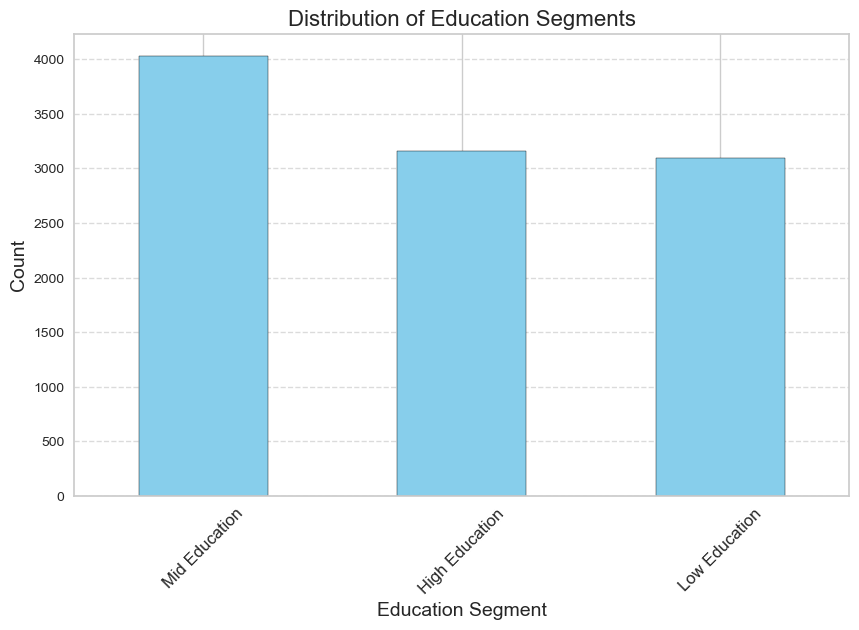

In [43]:
# Histograma de la columna education_segment
plt.figure(figsize=(10, 6))
df_customers['education_segment'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Education Segments', fontsize=16)
plt.xlabel('Education Segment', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, fontsize=12)
plt.show()

### 1.1.3 df_products


In [44]:
df_products.head()

product_id product_brand                 product_name  product_sku  \
0           1    Washington       Washington Berry Juice  90748583674   
1           2    Washington       Washington Mango Drink  96516502499   
2           3    Washington  Washington Strawberry Drink  58427771925   
3           4    Washington        Washington Cream Soda  64412155747   
4           5    Washington         Washington Diet Soda  85561191439   

   product_retail_price  product_cost  product_weight  recyclable  low_fat  
0                  2.85          0.94            8.39         NaN      NaN  
1                  0.74          0.26            7.42         NaN      1.0  
2                  0.83          0.40           13.10         1.0      1.0  
3                  3.64          1.64           10.60         1.0      NaN  
4                  2.19          0.77            6.66         1.0      NaN

In [45]:
df_products["product_retail_price"].max()

3.98

In [46]:
df_products.shape

(1560, 9)

In [47]:
df_products.dtypes

product_id                int64
product_brand            object
product_name             object
product_sku               int64
product_retail_price    float64
product_cost            float64
product_weight          float64
recyclable              float64
low_fat                 float64
dtype: object

In [48]:
df_products.nunique()

product_id              1560
product_brand            111
product_name            1560
product_sku             1560
product_retail_price     315
product_cost             173
product_weight           376
recyclable                 1
low_fat                    1
dtype: int64

In [49]:
df_products.isnull().sum()

product_id                 0
product_brand              0
product_name               0
product_sku                0
product_retail_price       0
product_cost               0
product_weight             0
recyclable               687
low_fat                 1008
dtype: int64

In [50]:
#Existen valores nulos en recyclable y en low_fat sin embargo solo existe un valor para cada uno de ellos. Por tanto se trata de una variable categórica que toma como valores 1.0 o Nan. se transforman los datos para que 1.0 sea 1 y nan sea 0.
# Se transforman los valores de 'recyclable' y 'low_fat'
df_products['recyclable'] = df_products['recyclable'].fillna(0).astype(int)
df_products['low_fat'] = df_products['low_fat'].fillna(0).astype(int)

In [51]:
df_products['recyclable'].unique()

array([0, 1])

In [52]:
df_products['low_fat'].unique()

array([0, 1])

El dataset df_products tiene 1560 registros y 9 columnas. Entre las columnas tenemos id producto, marca, nombre de producto, el código de barras, el precio retail, precio de coste, el peso, si es reciblable y si tiene bajas calorias. En estas dos últimas columnas se encuentra que existen valores nulos pero solo 1 valor único por tanto, inicialmente se entiende como una variable categórica en la que toma valor como 1 si 0 no. Se sustituyen los nan por 0. En siguientes procesos se clasificarán por tipo de producto y se sustiuirán los 0 por nonfood en articulos que no sean comida.

### 1.1.4 df_regions

In [53]:
df_regions.head()

region_id sales_district    sales_region
0          1  San Francisco    Central West
1          2    Mexico City  Mexico Central
2          3    Los Angeles      South West
3          4    Guadalajara     Mexico West
4          5      Vancouver     Canada West

In [54]:
df_regions.shape

(109, 3)

In [55]:
df_regions.dtypes

region_id          int64
sales_district    object
sales_region      object
dtype: object

In [56]:
df_regions.nunique()

region_id         109
sales_district     22
sales_region        7
dtype: int64

In [57]:
df_regions.isnull().sum()

region_id         0
sales_district    0
sales_region      0
dtype: int64

In [58]:
# Filtro San Francisco
sales_district = df_regions[df_regions['sales_district'] == 'San Francisco']
sales_district.head(2)

region_id sales_district  sales_region
0           1  San Francisco  Central West
30         31  San Francisco  Central West

Se observa en el df_regions que existen 109 registros y 3 columnas. Existen 109 id de region, 22 distritos de ventas y 7 regiones de ventas. Esto puede ser que cada region_id se identifique con una tienda. Es un aspecto a valorar.

### 1.1.5 df_returns

In [59]:
df_returns.head()

return_date  product_id  store_id  quantity
0    1/1/1997         250         6         1
1    1/1/1997         628         6         1
2    1/1/1997         869         6         1
3    1/2/1997         469        11         1
4    1/2/1997         532        23         2

In [60]:
df_returns.shape

(7087, 4)

In [61]:
df_returns.dtypes

return_date    object
product_id      int64
store_id        int64
quantity        int64
dtype: object

In [62]:
df_returns.nunique()

return_date     639
product_id     1539
store_id         20
quantity          2
dtype: int64

In [63]:
df_returns.isnull().sum()

return_date    0
product_id     0
store_id       0
quantity       0
dtype: int64

Se observa en el df_returns que contiene 7087 registros y 4 columnas. En cuanto a fecha de devolución existen 639 distintas, se han devuelto 1539 productos diferentes en 20 tiendas y solo han devuelto 1 producto o dos productos iguales.


In [64]:
# Se convierte la columna 'return_date' a tipo datetime
df_returns['return_date'] = pd.to_datetime(df_returns['return_date'])

### 1.1.6 df_stores

In [65]:
df_stores.head()

store_id  region_id           store_type store_name store_street_address  \
0         1         28          Supermarket    Store 1       2853 Bailey Rd   
1         2         78        Small Grocery    Store 2   5203 Catanzaro Way   
2         3         76          Supermarket    Store 3   1501 Ramsey Circle   
3         4         27  Gourmet Supermarket    Store 4     433 St George Dr   
4         5          4        Small Grocery    Store 5   1250 Coggins Drive   

    store_city store_state store_country   store_phone first_opened_date  \
0     Acapulco    Guerrero        Mexico  262-555-5124          1/9/1982   
1   Bellingham          WA           USA  605-555-8203          4/2/1970   
2    Bremerton          WA           USA  509-555-1596         6/14/1959   
3      Camacho   Zacatecas        Mexico  304-555-1474         9/27/1994   
4  Guadalajara     Jalisco        Mexico  801-555-4324         9/18/1978   

  last_remodel_date  total_sqft  grocery_sqft  
0         12/5/1990       23593         17475  
1          6/4/1973       28206         22271  
2        11/19/1967       39696         24390  
3         12/1/1995       23759         16844  
4         6/29/1991       24597         15012

In [66]:
df_stores.shape

(24, 13)

In [67]:
df_stores.dtypes

store_id                 int64
region_id                int64
store_type              object
store_name              object
store_street_address    object
store_city              object
store_state             object
store_country           object
store_phone             object
first_opened_date       object
last_remodel_date       object
total_sqft               int64
grocery_sqft             int64
dtype: object

In [68]:
df_stores.nunique()

store_id                24
region_id               23
store_type               5
store_name              24
store_street_address    24
store_city              23
store_state             10
store_country            3
store_phone             24
first_opened_date       24
last_remodel_date       24
total_sqft              24
grocery_sqft            24
dtype: int64

In [69]:
df_stores.isnull().sum()

store_id                0
region_id               0
store_type              0
store_name              0
store_street_address    0
store_city              0
store_state             0
store_country           0
store_phone             0
first_opened_date       0
last_remodel_date       0
total_sqft              0
grocery_sqft            0
dtype: int64

Se observa en el dataset df_stores que existen 24 registros y 13 columnas. Se observa que region_id tiene 23 valores únicos por los 109 que tenía el df_regions. Probablemente df_regions obtiene regiones por barrios y por ende existen mas rnúmero de  region_id que regiones.
Se observa que existen 5 tipos de tiendas, 24 nombres, 24 direcciones, 23 ciudades, 10 estados, 3 paises, y que cada una de las tiendas se ha construido, remodelado en diferentes fechas y que todas ellas tienen metros cuadrados contruidos y de sala de ventas diferentes.

In [70]:
# Se convierten las columnas 'first_opened_date' y 'last_remodel_date' a tipo datetime
df_stores['first_opened_date'] = pd.to_datetime(df_stores['first_opened_date'])
df_stores['last_remodel_date'] = pd.to_datetime(df_stores['last_remodel_date'])

### 1.1.7 df_trans97

In [71]:
df_trans97.head()

transaction_date  stock_date  product_id  customer_id  store_id  quantity
0         1/1/1997  12/31/1996         869         3449         6         5
1         1/1/1997  12/31/1996        1472         3449         6         3
2         1/1/1997  12/28/1996          76         3449         6         4
3         1/1/1997  12/26/1996         320         3449         6         3
4         1/1/1997  12/25/1996           4         3449         6         4

In [72]:
df_trans97.shape

(86837, 6)

In [73]:
df_trans97.dtypes

transaction_date    object
stock_date          object
product_id           int64
customer_id          int64
store_id             int64
quantity             int64
dtype: object

In [74]:
df_trans97.nunique()

transaction_date     323
stock_date           370
product_id          1559
customer_id         5581
store_id              13
quantity               6
dtype: int64

In [75]:
df_trans97.isnull().sum()

transaction_date    0
stock_date          0
product_id          0
customer_id         0
store_id            0
quantity            0
dtype: int64

Se observa en df_trans97 las transacciones realizadas en el año 1997 existen 86837 transacciones y 6 columnas.
existen 323 dias de transacciones por lo que o faltan datos del año o existen fechas que han cerrado por vacaciones. existen 1559 productos diferentes 5581 clientes y 13 tiendas. El número máximo de unidades vendidas del mismo producto es 6


In [76]:
# Se convierten las columnas 'transaction_date' y 'stock_date' a tipo datetime
df_trans97['transaction_date'] = pd.to_datetime(df_trans97['transaction_date'])
df_trans97['stock_date'] = pd.to_datetime(df_trans97['stock_date'])

### 1.1.8 df_trans98

In [77]:
df_trans98.head()

transaction_date  stock_date  product_id  customer_id  store_id  quantity
0         1/1/1998  12/25/1997           4         2439        10         3
1         1/1/1998  12/28/1997          11         4284        10         3
2         1/1/1998  12/28/1997          12          534        10         3
3         1/1/1998  12/29/1997          14         9743        10         2
4         1/1/1998  12/27/1997          16         3608        10         3

In [78]:
df_trans98.shape

(182883, 6)

In [79]:
df_trans98.dtypes

transaction_date    object
stock_date          object
product_id           int64
customer_id          int64
store_id             int64
quantity             int64
dtype: object

In [80]:
df_trans98.nunique()

transaction_date     350
stock_date           370
product_id          1559
customer_id         8060
store_id              24
quantity               6
dtype: int64

In [81]:
df_trans98.isnull().sum()

transaction_date    0
stock_date          0
product_id          0
customer_id         0
store_id            0
quantity            0
dtype: int64

Se observa en el df_trans98 las transacciones realizadas en el año 1998. Existen 350 días diferentes por lo que no existen datos faltantes o ha habido dias cerrados por vacaciones o domingos. Existen 1559 prodcutos diferentes vendidos 8060 clientes diferentes 24 tiendas y el número máximo de unidades vendidas de un mismo producto es 6.


In [82]:
# Convertir las columnas transaction_date y stock_date a datetime
df_trans98['transaction_date'] = pd.to_datetime(df_trans98['transaction_date'])
df_trans98['stock_date'] = pd.to_datetime(df_trans98['stock_date'])

### Dataset unificado

In [83]:
# Se combinan las transacciones de 1997 y 1998
df_transactions = pd.concat([df_trans97, df_trans98], ignore_index=True)

# Se unen las transacciones con productos
df_combined = pd.merge(df_transactions, df_products, on='product_id', how='left')

# Se unen las transacciones con clientes
df_combined = pd.merge(df_combined, df_customers, on='customer_id', how='left')

# Se unen las transacciones con tiendas
df_combined = pd.merge(df_combined, df_stores, on='store_id', how='left')

# Se unen las transacciones con el calendario
df_combined = pd.merge(df_combined, df_calendar, left_on='transaction_date', right_on='date', how='left')
df_combined.drop('date', axis=1, inplace=True)

# Se unen las devoluciones con el dataframe combinado
# Como no hay una columna 'return_date' en df_trans97 y df_trans98, asumo que 'transaction_date' debería usarse
df_combined = pd.merge(df_combined, df_returns, left_on=['transaction_date', 'product_id', 'store_id'], right_on=['return_date', 'product_id', 'store_id'], how='left')

# Se unen las tiendas con regiones
df_combined = pd.merge(df_combined, df_regions, on='region_id', how='left')


In [84]:
df_combined.shape

(269732, 54)

In [85]:
df_combined.columns

Index(['transaction_date', 'stock_date', 'product_id', 'customer_id',
       'store_id', 'quantity_x', 'product_brand', 'product_name',
       'product_sku', 'product_retail_price', 'product_cost', 'product_weight',
       'recyclable', 'low_fat', 'customer_acct_num', 'first_name', 'last_name',
       'customer_address', 'customer_city', 'customer_state_province',
       'customer_postal_code', 'customer_country', 'birthdate',
       'marital_status', 'yearly_income', 'gender', 'total_children',
       'num_children_at_home', 'education', 'acct_open_date', 'member_card',
       'occupation', 'homeowner', 'age', 'age_group', 'generation',
       'income_segment', 'education_segment', 'region_id', 'store_type',
       'store_name', 'store_street_address', 'store_city', 'store_state',
       'store_country', 'store_phone', 'first_opened_date',
       'last_remodel_date', 'total_sqft', 'grocery_sqft', 'return_date',
       'quantity_y', 'sales_district', 'sales_region'],
      dtype='objec

In [86]:
# Se crean columnas para año, mes, semana y día
df_combined['year'] = df_combined['transaction_date'].dt.year
df_combined['month'] = df_combined['transaction_date'].dt.month
df_combined['week'] = df_combined['transaction_date'].dt.isocalendar().week
df_combined['day'] = df_combined['transaction_date'].dt.day

In [87]:
df_combined.isnull().sum()

transaction_date                0
stock_date                      0
product_id                      0
customer_id                     0
store_id                        0
quantity_x                      0
product_brand                   0
product_name                    0
product_sku                     0
product_retail_price            0
product_cost                    0
product_weight                  0
recyclable                      0
low_fat                         0
customer_acct_num               0
first_name                      0
last_name                       0
customer_address                0
customer_city                   0
customer_state_province         0
customer_postal_code            0
customer_country                0
birthdate                       0
marital_status                  0
yearly_income                   0
gender                          0
total_children                  0
num_children_at_home            0
education                       0
acct_open_date

Se observa que solo existen  nulos en la columna return_date y quantity_y. Esto es esperado ya que no todos los clientes han realizado una operación de devolución de producto siendo return_date la fecha de devolución y quantity_y las unidades de producto devueltas.

Se ha creado un dataset df_tfg que contiene todos los datos de todos los datasets.

In [88]:
df_combined.head()

transaction_date stock_date  product_id  customer_id  store_id  quantity_x  \
0       1997-01-01 1996-12-31         869         3449         6           5   
1       1997-01-01 1996-12-31        1472         3449         6           3   
2       1997-01-01 1996-12-28          76         3449         6           4   
3       1997-01-01 1996-12-26         320         3449         6           3   
4       1997-01-01 1996-12-25           4         3449         6           4   

  product_brand                product_name  product_sku  \
0     Nationeel  Nationeel Grape Fruit Roll  52382137179   
1     Fort West     Fort West Fudge Cookies  37276054024   
2     Red Spade    Red Spade Sliced Chicken  62054644227   
3     Excellent   Excellent Cranberry Juice  36570182442   
4    Washington       Washington Cream Soda  64412155747   

   product_retail_price  ...  total_sqft  grocery_sqft  return_date  \
0                  2.12  ...       23688         15337   1997-01-01   
1                  2.20  ...       23688         15337          NaT   
2                  1.69  ...       23688         15337          NaT   
3                  3.26  ...       23688         15337          NaT   
4                  3.64  ...       23688         15337          NaT   

   quantity_y  sales_district sales_region  year month week day  
0         1.0     Los Angeles   South West  1997     1    1   1  
1         NaN     Los Angeles   South West  1997     1    1   1  
2         NaN     Los Angeles   South West  1997     1    1   1  
3         NaN     Los Angeles   South West  1997     1    1   1  
4         NaN     Los Angeles   South West  1997     1    1   1  

[5 rows x 58 columns]

### Análisis generaciones

<Figure size 1200x600 with 0 Axes>

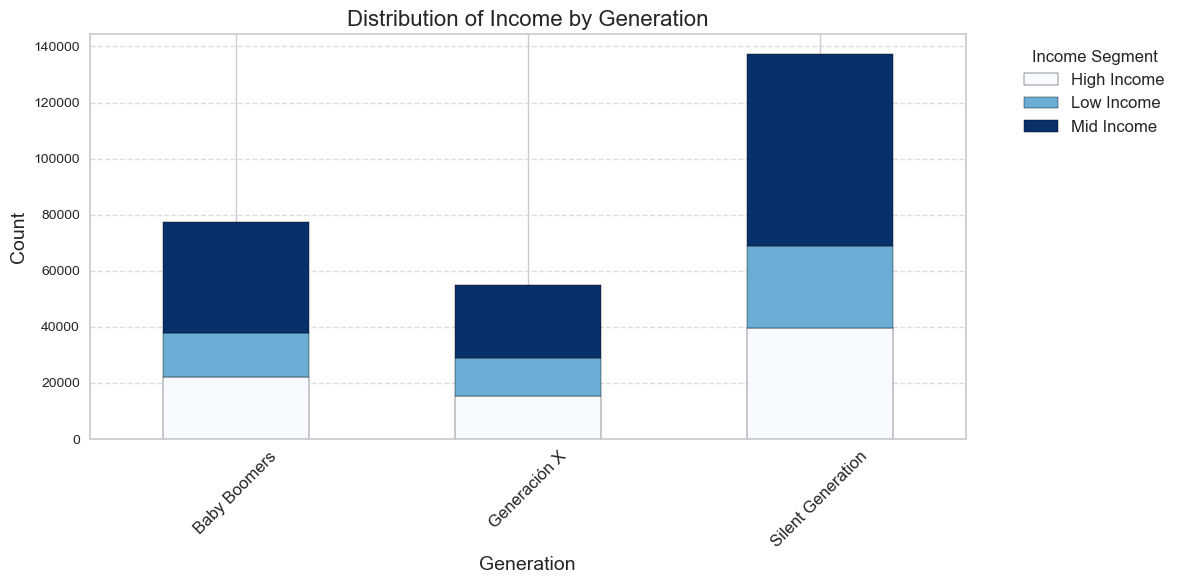

In [89]:
# Histograma de distribución por generación e ingreso
plt.figure(figsize=(12, 6))
df_combined.groupby(['generation', 'income_segment']).size().unstack().plot(
    kind='bar',
    stacked=True,
    colormap='Blues',
    edgecolor='black',
    figsize=(12, 6)
)
plt.title('Distribution of Income by Generation', fontsize=16)
plt.xlabel('Generation', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.legend(title='Income Segment', fontsize=12, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

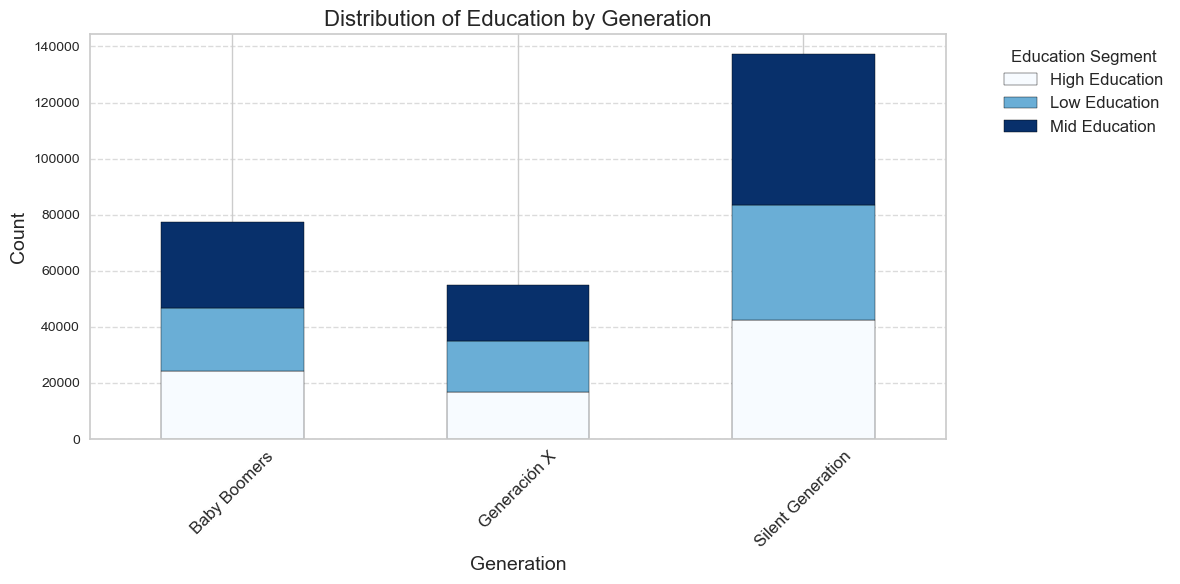

In [90]:
# Histograma de distribución por generación y educación
plt.figure(figsize=(12, 6))
df_combined.groupby(['generation', 'education_segment']).size().unstack().plot(
    kind='bar',
    stacked=True,
    colormap='Blues',
    edgecolor='black',
    figsize=(12, 6)
)
plt.title('Distribution of Education by Generation', fontsize=16)
plt.xlabel('Generation', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.legend(title='Education Segment', fontsize=12, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [91]:
generation_counts = df_customers['generation'].value_counts()
generation_data = generation_counts.reset_index()
generation_data.columns = ['Generation', 'Count']
generation_data['Percentage'] = (generation_data['Count'] / generation_data['Count'].sum()) * 100
generation_data

Generation  Count  Percentage
0  Silent Generation   5208   50.656551
1       Baby Boomers   2863   27.847486
2       Generación X   2210   21.495963

C:\Users\abeli\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\abeli\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\abeli\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


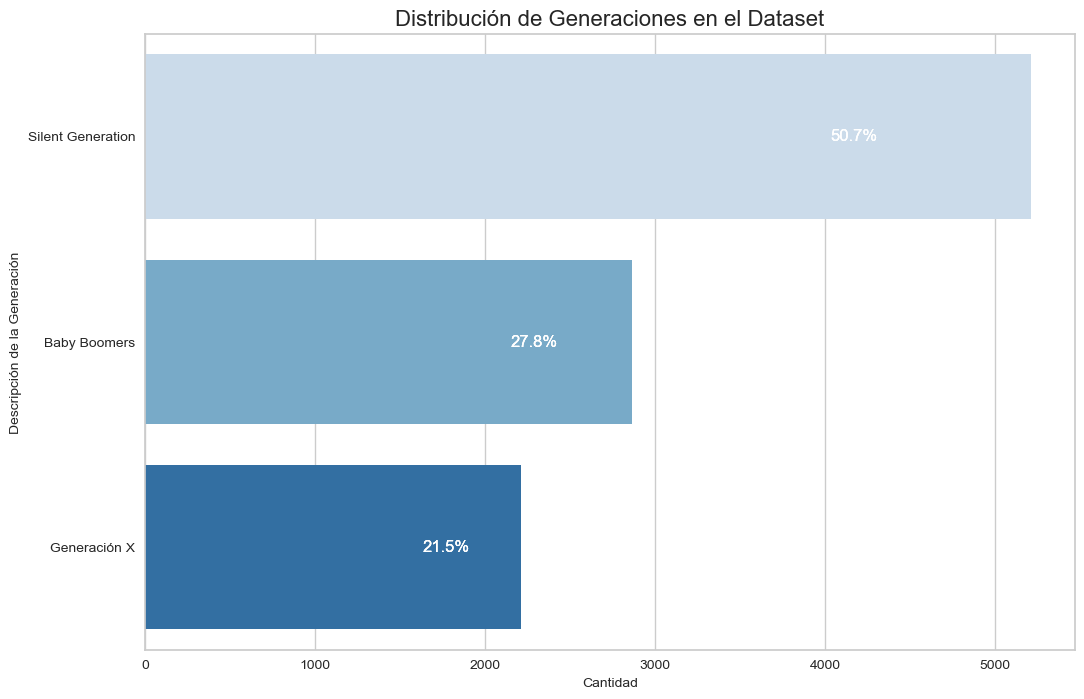

In [92]:
plt.figure(figsize=(12, 8))
barplot = sns.barplot(
    x='Count', 
    y='Generation', 
    data=generation_data, 
    palette="Blues"
)

# Añadir el porcentaje dentro de las barras
for index, row in generation_data.iterrows():
   for index, row in generation_data.iterrows():
    barplot.text(
        row['Count'] - (row['Count'] * 0.2),  
        index, 
        f"{row['Percentage']:.1f}%",  
        color='white',  
        ha='center', 
        va='center',  
        fontsize=12  
    )

# Etiquetas y título
plt.title('Distribución de Generaciones en el Dataset', fontsize=16)
plt.xlabel('Cantidad', fontsize=10)
plt.ylabel('Descripción de la Generación', fontsize=10)
#plt.tight_layout()
plt.show()

### Perspectiva de género

<Figure size 1200x600 with 0 Axes>

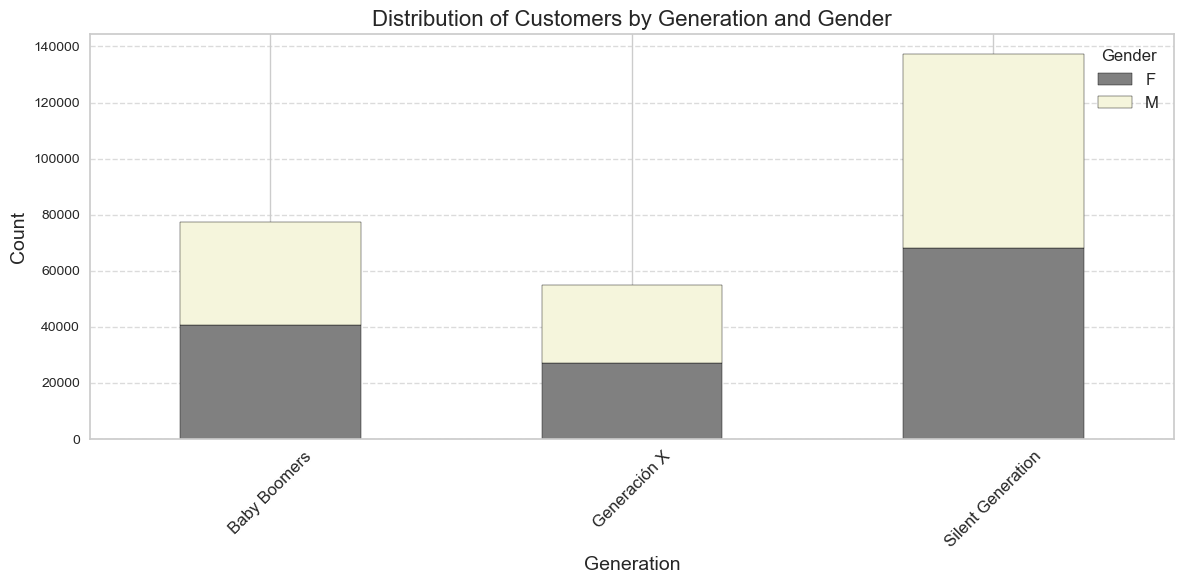

In [93]:
# Histograma de distribución por género y generación
plt.figure(figsize=(12, 6))
df_combined.groupby(['generation', 'gender']).size().unstack().plot(
    kind='bar',
    stacked=True,
    color=['grey', 'beige'],
    edgecolor='black',
    figsize=(12, 6)
)
plt.title('Distribution of Customers by Generation and Gender', fontsize=16)
plt.xlabel('Generation', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.legend(title='Gender', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

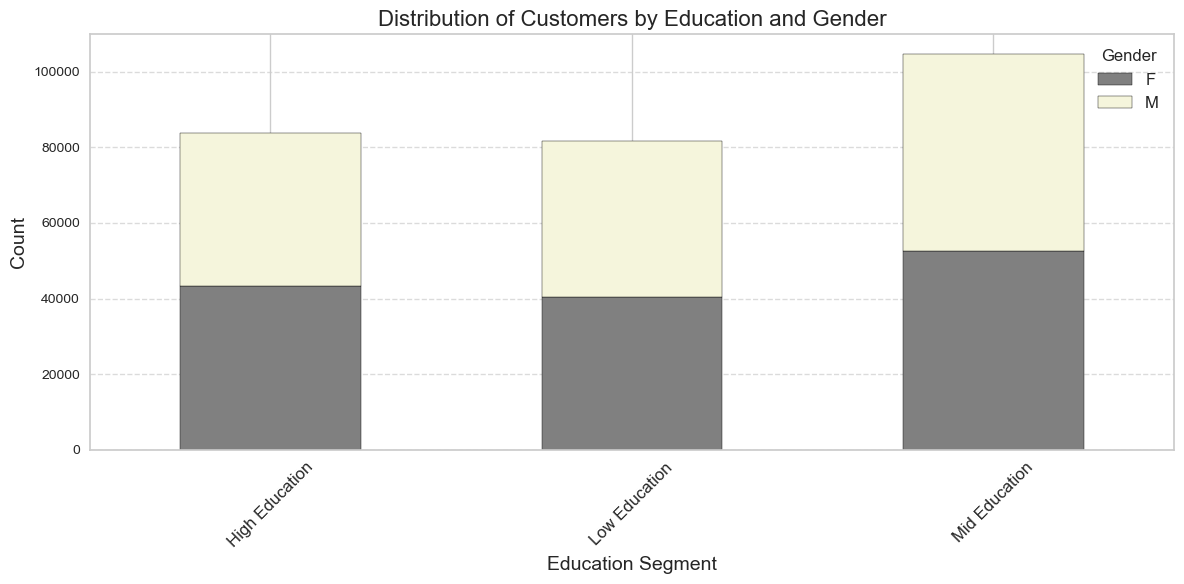

In [94]:
# Histograma de distribución por género y educación
plt.figure(figsize=(12, 6))
df_combined.groupby(['education_segment', 'gender']).size().unstack().plot(
    kind='bar',
    stacked=True,
    color=['grey', 'beige'],
    edgecolor='black',
    figsize=(12, 6)
)
plt.title('Distribution of Customers by Education and Gender', fontsize=16)
plt.xlabel('Education Segment', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.legend(title='Gender', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

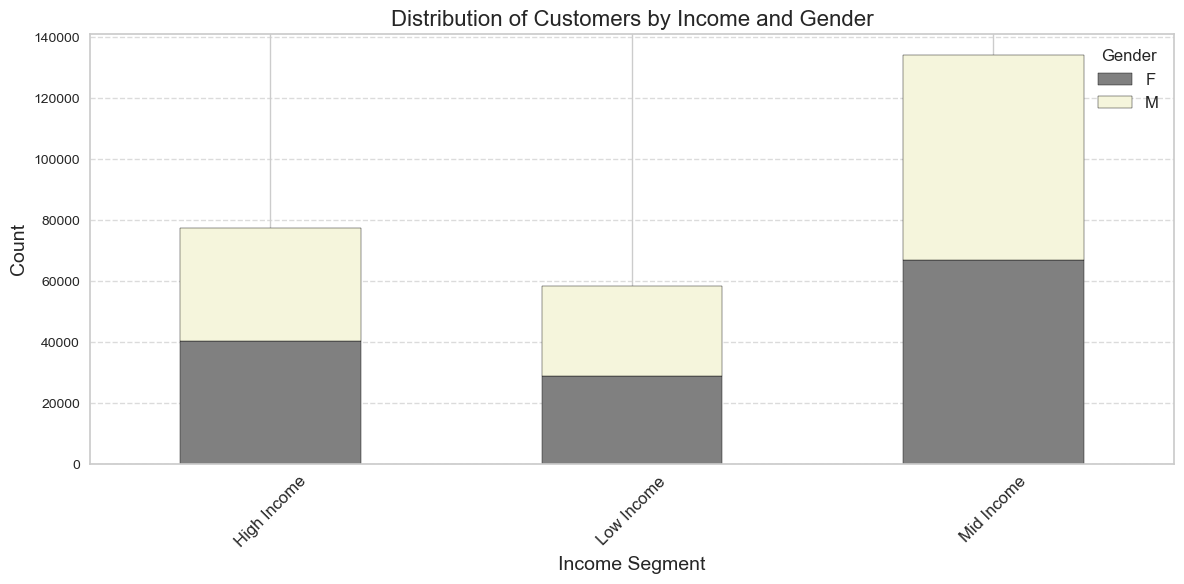

In [95]:
# Histograma de distribución por género y salario
plt.figure(figsize=(12, 6))
df_combined.groupby(['income_segment', 'gender']).size().unstack().plot(
    kind='bar',
    stacked=True,
    color=['grey', 'beige'],
    edgecolor='black',
    figsize=(12, 6)
)
plt.title('Distribution of Customers by Income and Gender', fontsize=16)
plt.xlabel('Income Segment', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.legend(title='Gender', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

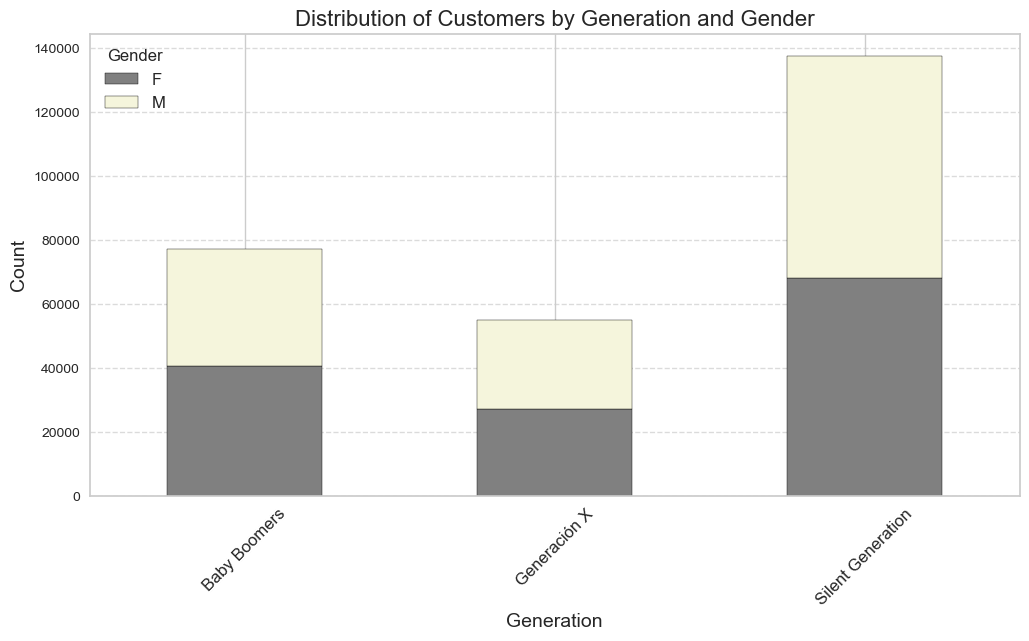

In [96]:
# Histograma de distribución por género y generación
plt.figure(figsize=(12, 6))
df_combined.groupby(['generation', 'gender']).size().unstack().plot(
    kind='bar',
    stacked=True,
    color=['grey', 'beige'],
    edgecolor='black',
    figsize=(12, 6)
)
plt.title('Distribution of Customers by Generation and Gender', fontsize=16)
plt.xlabel('Generation', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.legend(title='Gender', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 2. Procesamiento de Lenguaje Natural (PLN)

In [97]:
# Se descargan las categorías de Open Food Facts
url = "https://world.openfoodfacts.org/categories.json"
response = requests.get(url, headers={"User-Agent": "Mozilla/5.0"})
categorias_openfood = response.json()["tags"]

# Se crea un DataFrame con las categorías
df_categorias = pd.DataFrame([
    {"name": categoria["name"], "url": categoria["url"]} for categoria in categorias_openfood
])
df_categorias.head()

name  \
0  Plant-based foods and beverages   
1                Plant-based foods   
2                           Snacks   
3                     Sweet snacks   
4                        Beverages   

                                                 url  
0  https://world.openfoodfacts.org/category/plant...  
1  https://world.openfoodfacts.org/category/plant...  
2    https://world.openfoodfacts.org/category/snacks  
3  https://world.openfoodfacts.org/category/sweet...  
4  https://world.openfoodfacts.org/category/bever...

In [98]:
df_categorias["name"].unique()

array(['Plant-based foods and beverages', 'Plant-based foods', 'Snacks',
       'Sweet snacks', 'Beverages', 'Dairies', 'Cereals and potatoes',
       'Meats and their products', 'Fermented foods',
       'Fermented milk products', 'Fruits and vegetables based foods',
       'Condiments', 'Meats', 'Desserts', 'Biscuits and cakes', 'Meals',
       'Cereals and their products', 'Spreads', 'Cheeses', 'Sauces',
       'Confectioneries', 'Groceries', 'Frozen foods', 'Breakfasts',
       'Prepared meats', 'Plant-based beverages',
       'Vegetables based foods', 'Cocoa and its products', 'Seafood',
       'Canned foods', 'Sweet spreads', 'Biscuits', 'Fruits based foods',
       'Dairy desserts', 'Breads', 'Plant-based spreads', 'Fats',
       'Fermented dairy desserts', 'Fishes and their products',
       'Salty snacks', 'Fishes', 'Pastas', 'Alcoholic beverages',
       'Beverages and beverages preparations', 'Yogurts', 'Poultries',
       'Sweeteners', 'Legumes and their products', 'Frozen 

Se analizan los datos del dataset para decidir las categorías que se seleccionan. Se muestran 3 productos de cada marca 

In [99]:
# Se obtienen 3 productos por cada marca
two_products_per_brand = df_products.groupby("product_brand").head(3)
# Configuración para mostrar todas las filas
pd.set_option('display.max_rows', None) 
display(two_products_per_brand.head())

product_id product_brand                 product_name  product_sku  \
0            1    Washington       Washington Berry Juice  90748583674   
1            2    Washington       Washington Mango Drink  96516502499   
2            3    Washington  Washington Strawberry Drink  58427771925   
11          12       Jeffers              Jeffers Oatmeal  49031038880   
12          13       Jeffers           Jeffers Corn Puffs  13229009509   

    product_retail_price  product_cost  product_weight  recyclable  low_fat  
0                   2.85          0.94            8.39           0        0  
1                   0.74          0.26            7.42           0        1  
2                   0.83          0.40           13.10           1        1  
11                  1.54          0.69            8.90           1        1  
12                  2.65          1.27           10.40           0        0

## 2.1 Extracción keywords Spacy y clasificador Zero Shot BART 

In [100]:
# Se carga modelo de spaCy basado en transformers
nlp = spacy.load("en_core_web_trf")

# Se definen las categorías de productos
categories = [
    "Drinks", "Juices", "Dairy", "Pastas", "Rices", "Tomatoes", "Wines", 
    "Beers", "Snacks", "Frozen Goods", "Meat", "Fish", "Vegetables", "Fruits", 
    "Salads", "Cereals", "Canned Goods", "Oils", "Breads", "Sugar","Honeys", 
    "Salt", "Eggs", "Candies", "Non Food", "Cleaning Goods", "Baby Goods",
    "Preserves", "Soups", "Spreads", "Coffees", "Nuts & Seeds", "Sauces & Condiments", 
    "Spices & Seasonings", "Jellies","Chocolates", "Personal Care", "Magazine", "Pastries", "Vegan Goods",
]

# Se crea diccionario para mapear marcas específicas a categorías
brand_to_category = {
    "King": "Non Food",
    "Queen": "Non Food",
    "Denny": "Non Food",
    "Black Tie": "Non Food",
    "Red Wing": "Non Food",
    "Akron": "Non Food",
    "Cormorant": "Non Food",
    "Simphony": "Non Food",
    "James Bay": "Non Food",
    "HightQuality": "Non Food",
    "Toretti": "Non Food",
    "Framton": "Non Food",
    "Sunset": "Non Food",
    "Faux Products": "Personal Care",
    "Steady": "Personal Care",
    "Consolidated": "Personal Care",
    "Bird Call": "Personal Care",
    "Hilltop": "Personal Care",

}

# Se crea diccionario de palabras clave sugeridas para categorías
keyword_to_category = {
    "coffee": "Coffees & Teas",
    "napkins": "Baby Goods",
    "cleaner": "Cleaning Goods",
    "detergent": "Cleaning Goods",
    "frozen": "Frozen Goods",
    "canned": "Canned Goods",
    "juice": "Juices",
    "crackers": "Snacks",
    "popcorn": "Snacks",
    "cookies": "Snacks",
    "waffles": "Pastries",
    "donuts": "Pastries",
    "muffins": "Pastries",
    "bagel": "Pastries",
    "dip": "Sauces & Condiments",
    "bar": "Candies",
    "soda": "Drinks",
    "cola": "Drinks",
    "chardonnay": "Wines",
    "buttermilk": "Dairy",
    "yogurt": "Dairy",
    "sour cream": "Dairy",
    "cheese": "Dairy",
    "bologna": "Meat",
    "meat": "Meat",
    "lox": "Fish",
    "butter": "Spreads",
    "jam": "Spreads",
    "honey": "Honeys",
    "beer": "Beer",
    "eggs": "Eggs",
    "oil": "Oils",
    "bread": "Breads",
    "loaf": "Breads",
    "raviolli": "Pastas",
    "garlic": "Vegetables",
    "pepper": "Vegetables",
    "mushrooms": "Vegetables",
    "nuts": "Nuts & Seeds",
    "walnuts": "Nuts & Seeds",
    "raisins": "Nuts & Seeds",
    "cole slaw": "Salads",
    "salad": "Salads",
    "cantelope": "Fruits", 
    "limes": "Fruits",
    "preserves":"Preserves",
    "jelly":"Jellies",
    "soup":"Soups",
    "puffs":"Cereals",
    "fries": "Frozen Goods",
    "map": "Non Food",
    "sunglasses": "Non Food",
    "lightbulb": "Non Food",
    "screwdriver": "Non Food",
    "magazine": "Magazine",
    "conditioner": "Personal Care",
    "tofu": "Vegan Goods",
    "substitute": "Vegan Goods",
    

}
# Se elimina la parte de product_brand en product_name
df_products["cleaned_product_name"] = df_products.apply(lambda row: row["product_name"].replace(row["product_brand"], "").strip(),axis=1)

# Función para sugerir categoría basada en palabras clave
def suggest_category(product_name):
    product_name_lower = product_name.lower()
    for keyword, category in keyword_to_category.items():
        if re.search(rf"\b{keyword}\b", product_name_lower):
            return category
    return None 

# Función para extraer entidades y palabras clave
def extract_keywords(text):
    doc = nlp(text)
    keywords = [ent.text for ent in doc.ents if ent.label_ in ["NOUN", "PROPN", "ADJ"]]
    if not keywords: 
        keywords = [token.text for token in doc if token.pos_ in ["NOUN", "PROPN", "ADJ"]]
    return " ".join(keywords)

# Clasificador Zero-Shot con Hugging Face
classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli", device=0)

# Función para clasificar productos
def classify_product(row, categories, classifier):
    # Categoría sugerida basada en el nombre
    product_name = row["cleaned_product_name"]
    suggested_category = suggest_category(product_name)
    if suggested_category:
        return suggested_category 
    
    # Categoría sugerida basada en la marca
    brand = row["product_brand"]
    if brand in brand_to_category:
        return brand_to_category[brand]
    
    
    # Si no hay categorías sugerencias, utiliza el clasificador
    keywords = extract_keywords(product_name)  # Extraer palabras clave
    result = classifier(keywords, candidate_labels=categories)
    
    return result['labels'][0]  # Devolver la categoría con mayor probabilidad

# Se clasifica cada producto en el DataFrame
df_products["category"] = df_products.apply(
    lambda row: classify_product(row, categories, classifier), axis=1
)

In [101]:
# Conteo de productos por categoría
category_summary = df_products["category"].value_counts()
display(category_summary)

category
Non Food               157
Frozen Goods           130
Vegetables             110
Snacks                 105
Fruits                  90
Dairy                   90
Meat                    90
Personal Care           85
Canned Goods            75
Pastries                55
Drinks                  50
Spreads                 45
Soups                   45
Cleaning Goods          38
Cereals                 31
Wines                   30
Nuts & Seeds            25
Juices                  25
Magazine                25
Breads                  25
Eggs                    20
Salads                  20
Coffees & Teas          20
Candies                 20
Oils                    20
Pastas                  18
Preserves               15
Jellies                 15
Sauces & Condiments     15
Sugar                   10
Tomatoes                10
Beer                    10
Vegan Goods             10
Rices                    6
Fish                     5
Honeys                   5
Baby Goods         

In [102]:
df_frozen_items = df_products[df_products["category"] == "Frozen Goods"]
df_frozen_items[["cleaned_product_name","category"]].head()

cleaned_product_name      category
82       Orange Popsicles  Frozen Goods
83  Frozen Chicken Breast  Frozen Goods
84        Frozen Pancakes  Frozen Goods
85   Low Fat French Fries  Frozen Goods
86   Frozen Sausage Pizza  Frozen Goods

In [103]:
# Subcategorías para "Frozen Goods"
frozen_subcategories = [
    "Ice Cream & Desserts", "Frozen Vegetables", "Frozen Fruits", 
    "Frozen Meat", "Frozen Breakfast", "Frozen Pizzas", 
    "Frozen Fries"]
def reclasify_frozen_goods(product_name, subcategories, classifier):
    result = classifier(product_name, candidate_labels=subcategories)
    return result["labels"][0]  # Devolver la subcategoría con mayor probabilidad
# Se reclasifican productos
df_frozen_items["sub_category"] = df_frozen_items["cleaned_product_name"].apply(
    lambda name: reclasify_frozen_goods(name, frozen_subcategories, classifier)
)
df_frozen_items.head()

product_id product_brand                  product_name  product_sku  \
82          83        Golden       Golden Orange Popsicles  36548671126   
83          84        Golden  Golden Frozen Chicken Breast  11554356217   
84          85        Golden        Golden Frozen Pancakes  32703391909   
85          86        Golden   Golden Low Fat French Fries  66946843266   
86          87        Golden   Golden Frozen Sausage Pizza  57333645224   

    product_retail_price  product_cost  product_weight  recyclable  low_fat  \
82                  3.88          1.63           18.00           1        0   
83                  2.81          1.29           14.60           0        0   
84                  1.36          0.54            7.12           0        1   
85                  2.97          1.40           14.20           0        1   
86                  1.78          0.71           19.00           1        0   

     cleaned_product_name      category      sub_category  
82       Orange Popsicles  Frozen Goods     Frozen Fruits  
83  Frozen Chicken Breast  Frozen Goods       Frozen Meat  
84        Frozen Pancakes  Frozen Goods  Frozen Breakfast  
85   Low Fat French Fries  Frozen Goods      Frozen Fries  
86   Frozen Sausage Pizza  Frozen Goods     Frozen Pizzas

Se observan algunas categorias que no se han asignado correctamente, como Orange Popsicles que debería de haberlo catalogado como ice cream y home style french fries que debería de haberlo clasificado como frozen fries en lugar de breakfast, se realiza una asignación para estas variables.


In [104]:
def correct_subcategories(row):
    product_name = row["cleaned_product_name"].lower()
    sub_category = row["sub_category"]  # Categoría asignada inicialmente

    # Reglas de corrección basadas en análisis
    if "popsicle" in product_name:
        return "Ice Cream & Desserts"  # Popsicles como ice cream
    if "fries" in product_name:
        return "Frozen Fries"  # Fries como frozen fries
    if "fondue" in product_name:
        return "Frozen Fondue"  # Fondue como frozen fondue

    # Se mantiene la subcategoría original si no se encuentra ninguna regla
    return sub_category

# Se corrigen directamente a la columna 'sub_category'
df_frozen_items["sub_category"] = df_frozen_items.apply(correct_subcategories, axis=1)
df_frozen_items.head()

product_id product_brand                  product_name  product_sku  \
82          83        Golden       Golden Orange Popsicles  36548671126   
83          84        Golden  Golden Frozen Chicken Breast  11554356217   
84          85        Golden        Golden Frozen Pancakes  32703391909   
85          86        Golden   Golden Low Fat French Fries  66946843266   
86          87        Golden   Golden Frozen Sausage Pizza  57333645224   

    product_retail_price  product_cost  product_weight  recyclable  low_fat  \
82                  3.88          1.63           18.00           1        0   
83                  2.81          1.29           14.60           0        0   
84                  1.36          0.54            7.12           0        1   
85                  2.97          1.40           14.20           0        1   
86                  1.78          0.71           19.00           1        0   

     cleaned_product_name      category          sub_category  
82       Orange Popsicles  Frozen Goods  Ice Cream & Desserts  
83  Frozen Chicken Breast  Frozen Goods           Frozen Meat  
84        Frozen Pancakes  Frozen Goods      Frozen Breakfast  
85   Low Fat French Fries  Frozen Goods          Frozen Fries  
86   Frozen Sausage Pizza  Frozen Goods         Frozen Pizzas

In [105]:
# Se crea un diccionario de mapeo de product_id a sub_category desde df_frozen_items
frozen_subcategories_map = df_frozen_items.set_index("product_id")["sub_category"]

# Se sctualiza la columna `category` en df_products para productos que son "Frozen Goods"
df_products.loc[df_products["category"] == "Frozen Goods", "category"] = df_products["product_id"].map(frozen_subcategories_map)


In [106]:
items = df_products[df_products["category"] == "Spreads"]
items[["product_name","category"]].head()

product_name category
247     Best Choice Dried Dates  Spreads
283  Super Chunky Peanut Butter  Spreads
298  Super Low Fat Apple Butter  Spreads
300          Super Apple Butter  Spreads
303             Super Grape Jam  Spreads

In [107]:
#Conteo de productos por categoría actualizado
category_summary = df_products["category"].value_counts()
display(category_summary)

category
Non Food                157
Vegetables              110
Snacks                  105
Dairy                    90
Meat                     90
Fruits                   90
Personal Care            85
Canned Goods             75
Pastries                 55
Drinks                   50
Spreads                  45
Soups                    45
Cleaning Goods           38
Ice Cream & Desserts     35
Cereals                  31
Wines                    30
Nuts & Seeds             25
Juices                   25
Magazine                 25
Frozen Vegetables        25
Breads                   25
Eggs                     20
Coffees & Teas           20
Oils                     20
Candies                  20
Frozen Pizzas            20
Salads                   20
Pastas                   18
Frozen Breakfast         15
Jellies                  15
Sauces & Condiments      15
Preserves                15
Frozen Meat              15
Frozen Fries             15
Vegan Goods              10
Sugar      

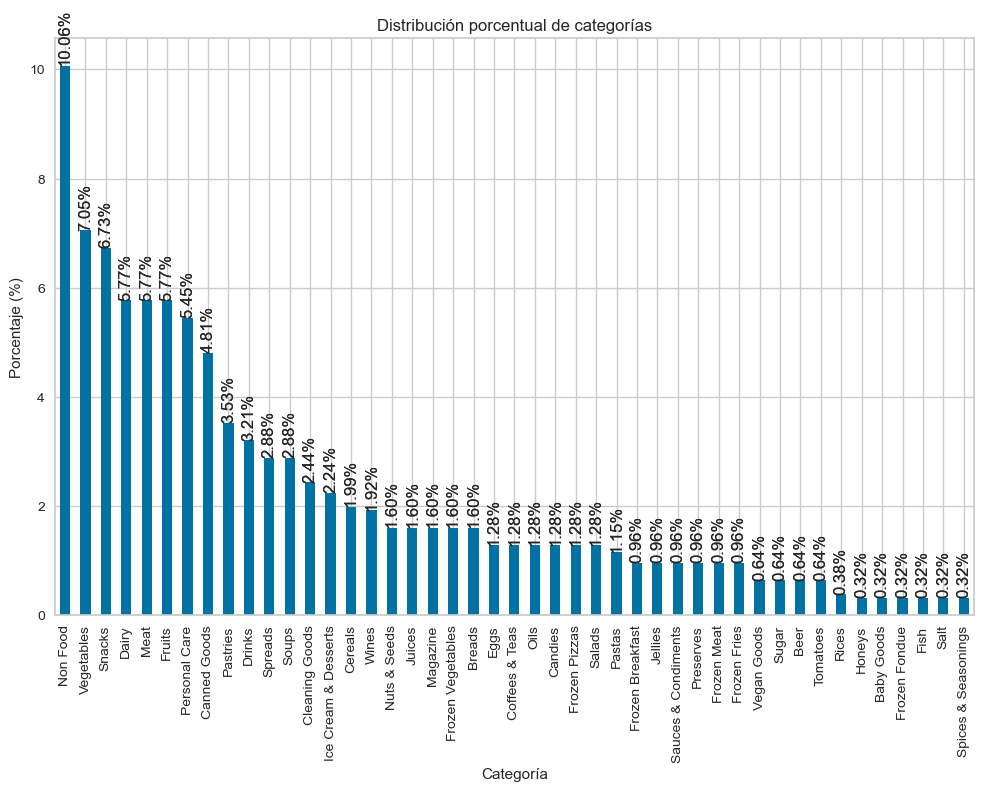

In [108]:
# Distribución categorías
category_percentage = (category_summary / 1560) * 100

plt.figure(figsize=(10, 8))
category_percentage.plot(kind='bar')
ax = category_percentage.plot(kind='bar')
plt.title("Distribución porcentual de categorías")
plt.xlabel("Categoría")
plt.ylabel("Porcentaje (%)")
plt.xticks(rotation=90)  
plt.tight_layout()       
for p in ax.patches:
    ax.annotate(
        f"{p.get_height():.2f}%",              
        (p.get_x() + p.get_width()/2, p.get_height()),  
        ha='center',                          
        va='bottom',
        rotation=90
    )
plt.show()

In [109]:
# Se incorpora la columna de categorias al df
df_combined = df_combined.merge(df_products[["product_id", "category"]], on="product_id", how="left")

In [110]:
df_combined.columns

Index(['transaction_date', 'stock_date', 'product_id', 'customer_id',
       'store_id', 'quantity_x', 'product_brand', 'product_name',
       'product_sku', 'product_retail_price', 'product_cost', 'product_weight',
       'recyclable', 'low_fat', 'customer_acct_num', 'first_name', 'last_name',
       'customer_address', 'customer_city', 'customer_state_province',
       'customer_postal_code', 'customer_country', 'birthdate',
       'marital_status', 'yearly_income', 'gender', 'total_children',
       'num_children_at_home', 'education', 'acct_open_date', 'member_card',
       'occupation', 'homeowner', 'age', 'age_group', 'generation',
       'income_segment', 'education_segment', 'region_id', 'store_type',
       'store_name', 'store_street_address', 'store_city', 'store_state',
       'store_country', 'store_phone', 'first_opened_date',
       'last_remodel_date', 'total_sqft', 'grocery_sqft', 'return_date',
       'quantity_y', 'sales_district', 'sales_region', 'year', 'month', 'w

# 3. Analítica de Clientes

In [111]:
# Se calcula el total gastado por día por cliente
ticket_data = df_combined.groupby(['customer_id', 'store_id', 'transaction_date']).agg(
    total_spent=pd.NamedAgg(column='product_retail_price', aggfunc=lambda x: round((x * df_combined.loc[x.index, 'quantity_x']).sum(), 2)),
    total_products=pd.NamedAgg(column='quantity_x', aggfunc='sum')
).reset_index()

# Se renombran columnas
ticket_data.columns = ['Customer ID', 'Store ID', 'Transaction Date', 'Total Ticket', 'Total Products']

# Columna de fecha sea de tipo datetime
ticket_data['Transaction Date'] = pd.to_datetime(ticket_data['Transaction Date'])

# Se añaden columnas para semana, mes y año
ticket_data['Year'] = ticket_data['Transaction Date'].dt.year
ticket_data['Month'] = ticket_data['Transaction Date'].dt.month
ticket_data['Week'] = ticket_data['Transaction Date'].dt.isocalendar().week

# Se calcula el gasto semanal por cliente
weekly_spent = ticket_data.groupby(['Customer ID', 'Year', 'Week']).agg(
    total_weekly_spent=pd.NamedAgg(column='Total Ticket', aggfunc='sum'),
    total_weekly_products=pd.NamedAgg(column='Total Products', aggfunc='sum')
).reset_index()

# Se calcula el gasto mensual por cliente
monthly_spent = ticket_data.groupby(['Customer ID', 'Year', 'Month']).agg(
    total_monthly_spent=pd.NamedAgg(column='Total Ticket', aggfunc='sum'),
    total_monthly_products=pd.NamedAgg(column='Total Products', aggfunc='sum')
).reset_index()

# Se calcula el gasto anual por cliente
annual_spent = ticket_data.groupby(['Customer ID', 'Year']).agg(
    total_annual_spent=pd.NamedAgg(column='Total Ticket', aggfunc='sum'),
    total_annual_products=pd.NamedAgg(column='Total Products', aggfunc='sum')
).reset_index()

# Se calcula el gasto total acumulado por cliente
total_spent = ticket_data.groupby(['Customer ID']).agg(
    total_spent_across_years=pd.NamedAgg(column='Total Ticket', aggfunc='sum'),
    total_products_across_years=pd.NamedAgg(column='Total Products', aggfunc='sum')
).reset_index()


In [112]:
monthly_spent.head(20)

Customer ID  Year  Month  total_monthly_spent  total_monthly_products
0             3  1997      4                33.48                      18
1             3  1997     10                40.21                      19
2             3  1997     11                24.85                      13
3             3  1998      3                67.15                      23
4             3  1998      4                37.48                      16
5             5  1997      1                 1.08                       2
6             6  1997      7                65.76                      22
7             6  1998      1                 6.52                       7
8             6  1998      6                40.46                      14
9             6  1998     12                34.97                      14
10            8  1998      3                21.63                      12
11            8  1998      4                 8.94                       3
12            8  1998      6                53.19                      25
13            8  1998      7                28.84                      13
14            8  1998      9                57.71                      28
15            8  1998     10                34.13                      17
16            8  1998     11                54.70                      24
17            9  1998      4                40.17                      20
18            9  1998     10                49.41                      19
19           10  1997      1                19.56                      12

In [113]:
annual_spent.head(10)

Customer ID  Year  total_annual_spent  total_annual_products
0            3  1997               98.54                     50
1            3  1998              104.63                     39
2            5  1997                1.08                      2
3            6  1997               65.76                     22
4            6  1998               81.95                     35
5            8  1998              259.14                    122
6            9  1998               89.58                     39
7           10  1997               53.82                     29
8           10  1998              147.25                     75
9           11  1998               44.35                     23

In [114]:
total_spent.head(10)

Customer ID  total_spent_across_years  total_products_across_years
0            3                    203.17                           89
1            5                      1.08                            2
2            6                    147.71                           57
3            8                    259.14                          122
4            9                     89.58                           39
5           10                    201.07                          104
6           11                     44.35                           23
7           12                     16.68                            6
8           14                     68.79                           41
9           17                     50.17                           27

Tras analizar las compras y los gastos, diarios, semanal, anual y total se observa que existen clientes que han comprado pocas veces durante el mes. Por tanto se decide realizar un promedio del gasto mensual y un promedio de los articulos mensuales para trabajar con la segmentación de clientes.


In [115]:
# Se calcula el gasto mensual promedio por cliente
average_monthly_spent = monthly_spent.groupby('Customer ID').agg(
    avg_monthly_spent=pd.NamedAgg(column='total_monthly_spent', aggfunc='mean'),
    avg_monthly_products=pd.NamedAgg(column='total_monthly_products', aggfunc='mean')
).reset_index()

# Se redondean los resultados
average_monthly_spent['avg_monthly_spent'] = average_monthly_spent['avg_monthly_spent'].round(2)
average_monthly_spent['avg_monthly_products'] = average_monthly_spent['avg_monthly_products'].round(2)
average_monthly_spent.head()

Customer ID  avg_monthly_spent  avg_monthly_products
0            3              40.63                 17.80
1            5               1.08                  2.00
2            6              36.93                 14.25
3            8              37.02                 17.43
4            9              44.79                 19.50

Teniendo el gasto promedio mensaul y el numero de productos promedio mensual se crea un dataset para realizar la segmentacion de clientes que incluirá los datos de id cliente, educación, rango salarial, segmento de edad, generación, hijos en casa, gasto promedio mensual y cantidad promedio de productos mensual

In [116]:
# Se seleccionan las columnas relevantes de `df_combined`
customer_info = df_combined[['customer_id', 'marital_status', 'num_children_at_home', 'age_group', 
                             'generation', 'income_segment', 'education_segment']].drop_duplicates()


most_frequent_category = df_combined.groupby('customer_id')['category'].agg(lambda x: x.mode().iloc[0]).reset_index()
customer_info = customer_info.merge(most_frequent_category, on='customer_id', how='left')
# Se agregan las columnas de gasto promedio mensual al DataFrame seleccionado
customer_info = customer_info.merge(
    average_monthly_spent[['Customer ID', 'avg_monthly_spent', 'avg_monthly_products']],
    left_on='customer_id', 
    right_on='Customer ID',
    how='left'
)
customer_info.drop(columns=['Customer ID'], inplace=True)

In [117]:
customer_info.head()

customer_id marital_status  num_children_at_home    age_group  \
0         3449              M                     0        Young   
1         7859              S                     0  Young Adult   
2          106              S                     0        Young   
3         8248              S                     0       Senior   
4         1906              M                     1  Young Adult   

          generation income_segment education_segment  category  \
0       Generación X     Mid Income     Mid Education      Meat   
1       Generación X     Mid Income     Mid Education     Dairy   
2       Generación X     Mid Income    High Education     Dairy   
3  Silent Generation     Low Income     Low Education    Snacks   
4       Baby Boomers     Mid Income    High Education  Non Food   

   avg_monthly_spent  avg_monthly_products  
0              31.92                 15.33  
1              19.79                 11.00  
2              33.54                 13.40  
3              33.17                 17.57  
4              20.09                 11.12

In [118]:
customer_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8842 entries, 0 to 8841
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   customer_id           8842 non-null   int64  
 1   marital_status        8842 non-null   object 
 2   num_children_at_home  8842 non-null   int64  
 3   age_group             8842 non-null   object 
 4   generation            8842 non-null   object 
 5   income_segment        8842 non-null   object 
 6   education_segment     8842 non-null   object 
 7   category              8842 non-null   object 
 8   avg_monthly_spent     8842 non-null   float64
 9   avg_monthly_products  8842 non-null   float64
dtypes: float64(2), int64(2), object(6)
memory usage: 690.9+ KB


## 3.1 Segmentación de Clientes K-Means

- a. Variables categóricas

    - marital_status ('M', 'S'): Codificación binaria.
        M → 0, S → 1

    - age_group ('Young', 'Adult', 'Senior', 'Minor'): Codificación ordinal.
        Minor → 0, Young → 1, Adult → 2, Senior → 3

    - generation: Codificación ordinal basada en generaciones.
        Silent Generation → 0, Baby Boomers → 1, Generación X → 2

     - income_segment, education_segment: Codificación ordinal basada en niveles.
          Low → 0, Mid → 1, High → 2

     - category y product_name:

Dado el alto número de categorías, utilizaremos codificación one-hot encoding para evitar imponer un orden arbitrario

- b. Variables numéricas

    Escalar Variables Numéricas
     - avg_monthly_spent y avg_monthly_products: Escalarlas usando StandardScaler para que estén en la misma escala que las variables categóricas codificadas.

In [119]:
#Se crea copia del dataset
customer_info_copy = customer_info

In [120]:
# Variables a transformar
categorical_columns = ['marital_status', 'age_group', 'generation', 'income_segment', 'education_segment']
numerical_columns = ['avg_monthly_spent', 'avg_monthly_products']
one_hot_columns = ['category']

# Codificación ordinal para variables categóricas
ordinal_mappings = {
    'marital_status': {'M': 0, 'S': 1},
    'age_group': {'Minor': 0, 'Young': 1, 'Young Adult': 2, 'Mid Adult': 3, 'Senior': 4},
    'generation': {'Silent Generation': 0, 'Baby Boomers': 1, 'Generación X': 2},
    'income_segment': {'Low Income': 0, 'Mid Income': 1, 'High Income': 2},
    'education_segment': {'Low Education': 0, 'Mid Education': 1, 'High Education': 2}
}

# Se hace el mapeo
for col, mapping in ordinal_mappings.items():
    customer_info[col] = customer_info[col].map(mapping)

# One-hot encoding para columnas con muchas categorías
customer_info = pd.get_dummies(customer_info, columns=one_hot_columns, drop_first=True)

# Se crea X después de las transformaciones
X = customer_info.drop(columns=['customer_id'])

# Se convierten columnas booleanas a enteros
X = X.astype({col: 'int64' for col in X.select_dtypes(include='bool').columns})

# Se escalan las variables numéricas
scaler = StandardScaler()
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])

### 3.1.1 Selección de clusters k

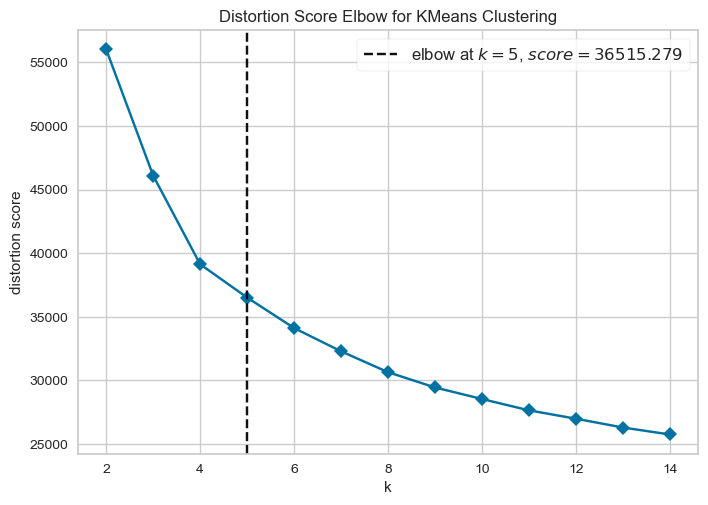

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [121]:
# Modelo KMeans
kmeans = KMeans(random_state=42)

# Método del codo
elbow_visualizer = KElbowVisualizer(kmeans, k=(2, 15), metric='distortion', timings=False)
elbow_visualizer.fit(X)
elbow_visualizer.show()

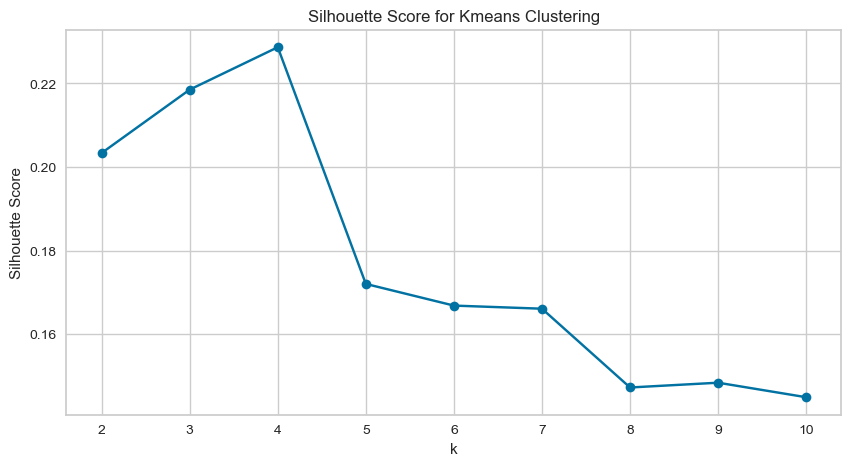

In [122]:
# Método Silhouette
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k,n_init=10, random_state=10)
    labels = kmeans.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, labels))
    
# Gráfico de Silhouette
plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score for Kmeans Clustering')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.show()

In [123]:
# mostrar todas las columnas
pd.set_option('display.max_columns', None)

### 3.1.2 Resultados Kmeans 

In [124]:
# Modelo con 4 clusters
kmeans4 = KMeans(n_clusters=4, random_state=42)
kmeans4.fit(X)

# Se agregan los labels (clusters) al DataFrame original
customer_info['Cluster4'] = kmeans4.labels_

In [125]:
cluster_summary4 = customer_info.groupby('Cluster4').mean()
cluster_summary4

customer_id  marital_status  num_children_at_home  age_group  \
Cluster4                                                                 
0         5133.212715        0.640795              0.188874   3.642914   
1         5130.315262        0.622354              0.293353   1.509469   
2         5198.129013        0.000000              3.085018   2.951249   
3         5125.193642        0.534682              0.622832   2.994220   

          generation  income_segment  education_segment  avg_monthly_spent  \
Cluster4                                                                     
0           0.160530        1.067550           1.021457          29.553399   
1           1.585221        1.057557           1.006313          30.202499   
2           0.596908        1.046968           0.974435          31.956046   
3           0.582370        1.108382           1.041908          72.704812   

          avg_monthly_products  category_Beer  category_Breads  \
Cluster4                                                         
0                    13.967889       0.007682         0.022781   
1                    14.308782       0.007055         0.024137   
2                    15.129905       0.008323         0.017836   
3                    33.913237       0.002890         0.004335   

          category_Candies  category_Canned Goods  category_Cereals  \
Cluster4                                                              
0                 0.014040               0.083444          0.018278   
1                 0.008912               0.100260          0.020052   
2                 0.014863               0.083829          0.015458   
3                 0.004335               0.050578          0.004335   

          category_Cleaning Goods  category_Coffees & Teas  category_Dairy  \
Cluster4                                                                     
0                        0.026490                 0.009536        0.103311   
1                        0.025251                 0.006684        0.099146   
2                        0.019620                 0.005945        0.106421   
3                        0.005780                 0.000000        0.075145   

          category_Drinks  category_Eggs  category_Fish  \
Cluster4                                                  
0                0.025960       0.005828       0.001325   
1                0.026365       0.003342       0.000743   
2                0.026754       0.005351       0.000595   
3                0.015896       0.002890       0.001445   

          category_Frozen Breakfast  category_Frozen Fondue  \
Cluster4                                                      
0                          0.004238                0.001325   
1                          0.003713                0.001485   
2                          0.003567                0.000595   
3                          0.000000                0.000000   

          category_Frozen Fries  category_Frozen Meat  category_Frozen Pizzas  \
Cluster4                                                                        
0                      0.003709              0.002119                0.006887   
1                      0.002599              0.004456                0.005199   
2                      0.001784              0.002378                0.008918   
3                      0.001445              0.000000                0.000000   

          category_Frozen Vegetables  category_Fruits  category_Honeys  \
Cluster4                                                                 
0                           0.009272         0.073113         0.000795   
1                           0.009655         0.072410         0.000371   
2                           0.007134         0.082640         0.000000   
3                           0.000000         0.067919         0.000000   

          category_Ice Cream & Desserts  category_Jellies  category_Juices  \
Cluster4                                                   

In [126]:
# Se combinan los datos del clustering con el DataFrame
df_combined = df_combined.merge(
    customer_info[['customer_id', 'Cluster4']],
    on='customer_id',
    how='left'
)

In [127]:
cluster_summary4 = cluster_summary4.reset_index()

In [128]:
cluster_summary4

Cluster4  customer_id  marital_status  num_children_at_home  age_group  \
0         0  5133.212715        0.640795              0.188874   3.642914   
1         1  5130.315262        0.622354              0.293353   1.509469   
2         2  5198.129013        0.000000              3.085018   2.951249   
3         3  5125.193642        0.534682              0.622832   2.994220   

   generation  income_segment  education_segment  avg_monthly_spent  \
0    0.160530        1.067550           1.021457          29.553399   
1    1.585221        1.057557           1.006313          30.202499   
2    0.596908        1.046968           0.974435          31.956046   
3    0.582370        1.108382           1.041908          72.704812   

   avg_monthly_products  category_Beer  category_Breads  category_Candies  \
0             13.967889       0.007682         0.022781          0.014040   
1             14.308782       0.007055         0.024137          0.008912   
2             15.129905       0.008323         0.017836          0.014863   
3             33.913237       0.002890         0.004335          0.004335   

   category_Canned Goods  category_Cereals  category_Cleaning Goods  \
0               0.083444          0.018278                 0.026490   
1               0.100260          0.020052                 0.025251   
2               0.083829          0.015458                 0.019620   
3               0.050578          0.004335                 0.005780   

   category_Coffees & Teas  category_Dairy  category_Drinks  category_Eggs  \
0                 0.009536        0.103311         0.025960       0.005828   
1                 0.006684        0.099146         0.026365       0.003342   
2                 0.005945        0.106421         0.026754       0.005351   
3                 0.000000        0.075145         0.015896       0.002890   

   category_Fish  category_Frozen Breakfast  category_Frozen Fondue  \
0       0.001325                   0.004238                0.001325   
1       0.000743                   0.003713                0.001485   
2       0.000595                   0.003567                0.000595   
3       0.001445                   0.000000                0.000000   

   category_Frozen Fries  category_Frozen Meat  category_Frozen Pizzas  \
0               0.003709              0.002119                0.006887   
1               0.002599              0.004456                0.005199   
2               0.001784              0.002378                0.008918   
3               0.001445              0.000000                0.000000   

   category_Frozen Vegetables  category_Fruits  category_Honeys  \
0                    0.009272         0.073113         0.000795   
1                    0.009655         0.072410         0.000371   
2                    0.007134         0.082640         0.000000   
3                    0.000000         0.067919         0.000000   

   category_Ice Cream & Desserts  category_Jellies  category_Juices  \
0                       0.011656          0.001854         0.004238   
1                       0.010397          0.002228         0.004456   
2                       0.010702          0.002378         0.008323   
3                       0.002890          0.000000         0.001445   

   category_Magazine  category_Meat  category_Non Food  category_Nuts & Seeds  \
0           0.004238       0.073642           0.235762               0.003709   
1           0.004085       0.072781           0.243223               0.004456   
2           0.006540       0.069560           0.253270               0.001784   
3           0.000000       0.063584           0.462428               0.000000   

   category_Oils  category_Pastas  category_Pastries  category_Personal Care  \
0       0.001325         0.001589           0.018013                0.048477   
1       0.001857         0.002228           0.014853                0.047531   
2       0.001784         0.002973           0.014269           

**Cluster 0: Adultos mayores de 45 y seniors**

Existen más solteros que casados 0.64,  predominan sin hijos en casa 0.18 , El grupo de edad es Adulto cerca de senior pertenece a la generación Silent Genaration, con ingresos medios y educación media. Compra pocos productos 13.96 artículos de media destacando , Non Food 0.23 Y Dairy 0.10. 

Podría reflejar a un grupo de personas en edad previa a la jubilación y jubilados divorciados o viudos con compras pequeñas.

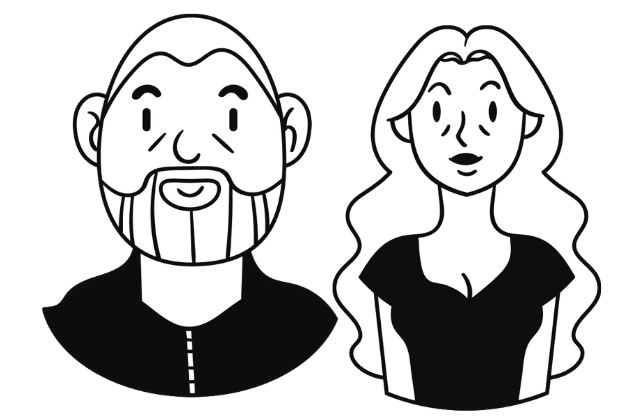



**Cluster 1: Jóvenes Solteros**

Exiten más solteros que casados 0.62, predominan sin hijos en casa 0.29 el grupo de edad es joven hacia adulto joven, la generación es baby boomer y presencia de Generación X, con ingresos medios y educación media con compras pequeñas 14.30 artículos. Predominan articulos de Non Food 0.24 y Canned Goods 0.10

Jovenes solteros con compras pequeñas.

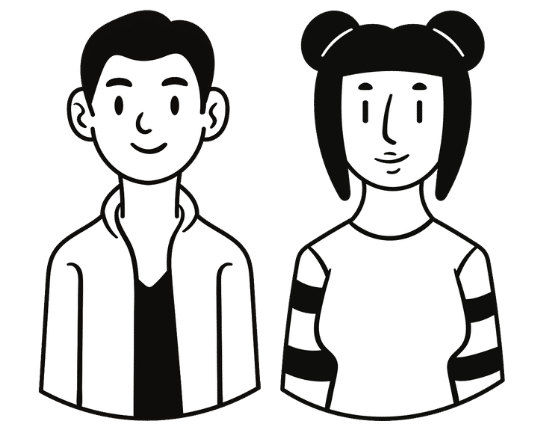



**Cluster 2: Familias numerosas**

Clientes casados 0.00 con hijos en casa 3.08, el grupo de edad es adulto joven en su tramo mas alto (cercanos a los 45) que pertenecen a la generación Silent generation predominando Baby Boomers. Nivel de ingresos medios y educación baja rozando media. Realizan compras medianas 15.12 artículos destacan Non Food 0.25 y Dairy 0.10. 

Refleja a un grupo de personas que son familia numerosa con compras medias.

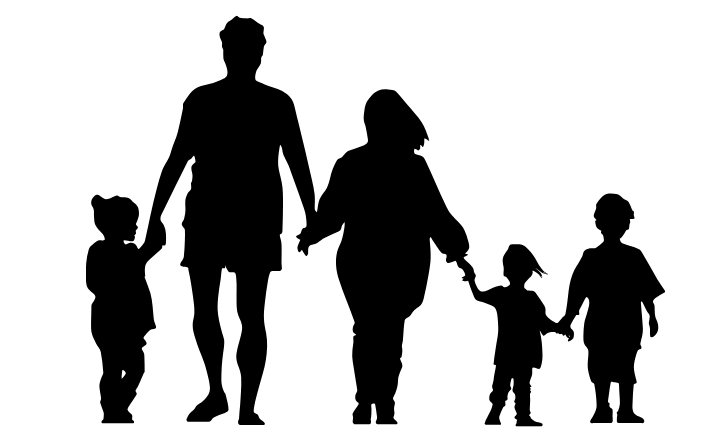




**Cluster 3: Adultos edad media 45 años**

Predominan los solteros a los casados aunque hay casi paridad 0.53 con un o ningún hijo en casa 0.62 . En cuanto a grupo de edad se situan en adultos jovenes al límite de adulto medio 2.99 que pertenencen a la generación Silent Generation aunque más cercanos a baby boomers 0.58. Son el grupo con los ingresos más altos 1.10 y más estudios 1.04, realizan compras grandes con 33.91 artículos de media donde predominan Non Food 0.46 y Vegetables (0.09). 

Adultos edad media alrededor de 45 años compras grandes.


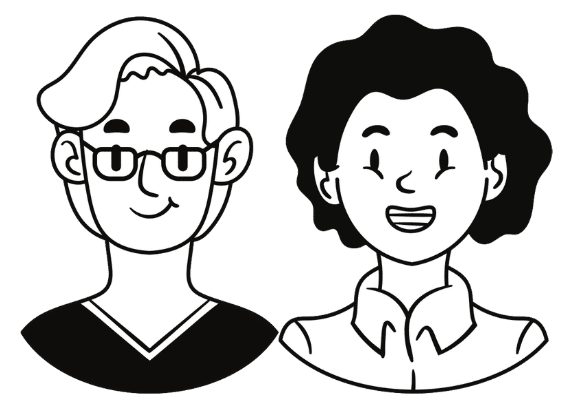

C:\Users\abeli\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\abeli\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\abeli\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


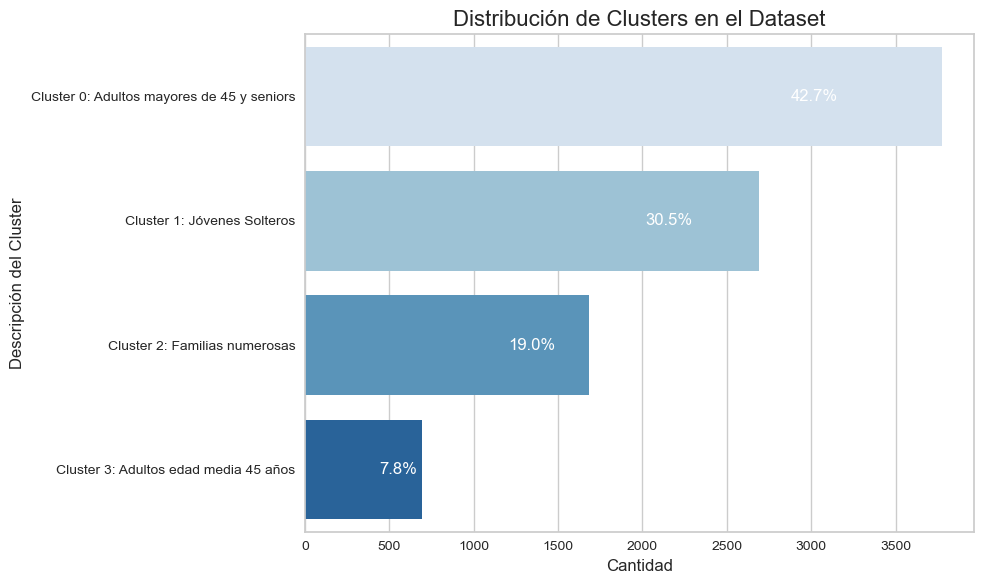

In [129]:
# Se cuentan los valores de cada cluster
cluster_counts = customer_info['Cluster4'].value_counts()

# Mapeo de las descripciones a los clusters
cluster_descriptions = {
    0: "Cluster 0: Adultos mayores de 45 y seniors",
    1: "Cluster 1: Jóvenes Solteros",
    2: "Cluster 2: Familias numerosas",
    3: "Cluster 3: Adultos edad media 45 años"
}

# Se crea dataFrame para la visualización
cluster_data = cluster_counts.reset_index()
cluster_data.columns = ['Cluster', 'Count']
cluster_data['Description'] = cluster_data['Cluster'].map(cluster_descriptions)
# Se calcula el porcentaje de cada clúster
cluster_data['Percentage'] = (cluster_data['Count'] / cluster_data['Count'].sum()) * 100

# Gráfico de barras
plt.figure(figsize=(10, 6))
barplot = sns.barplot(
    x='Count', 
    y='Description', 
    data=cluster_data, 
    palette="Blues"
)

# Se añade el porcentaje dentro de las barras
for index, row in cluster_data.iterrows():
    barplot.text(
        row['Count'] - (row['Count'] * 0.2),  # Posición en el eje x 
        index,  # Posición en el eje y
        f"{row['Percentage']:.1f}%",  # Porcentaje
        color='white',  # Color del texto
        ha='center',  # Alinear horizontalmente
        va='center',  # Alinear verticalmente
        fontsize=12  # Tamaño de la fuente
    )

# Etiquetas y título
plt.title('Distribución de Clusters en el Dataset', fontsize=16)
plt.xlabel('Cantidad', fontsize=12)
plt.ylabel('Descripción del Cluster', fontsize=12)
plt.tight_layout()
plt.show()

## 3.2 Reglas de asociacion


In [130]:
# Agrupar por cliente, tienda y fecha de transacción, y crear una lista de nombres de productos
product_data = df_combined.groupby(['customer_id', 'store_id', 'transaction_date']).agg(
    total_spent=('product_retail_price', 'sum'),  # Suma de precios para obtener el total gastado
    product_list=('category', lambda x: list(x))  # Crear lista de nombres de productos
).reset_index()


product_data.columns = ['Customer ID', 'Store ID', 'Transaction Date', 'Total Ticket', 'Product List']
product_data.head()

Customer ID  Store ID Transaction Date  Total Ticket  \
0            3        15       1997-04-27         13.29   
1            3        15       1997-10-22         12.96   
2            3        15       1997-11-27          7.87   
3            3        15       1998-03-29         20.87   
4            3        15       1998-04-17         14.02   

                                        Product List  
0  [Salads, Drinks, Pastas, Cleaning Goods, Drink...  
1  [Canned Goods, Personal Care, Pastries, Meat, ...  
2  [Frozen Meat, Fruits, Cleaning Goods, Canned G...  
3  [Honeys, Dairy, Vegetables, Dairy, Personal Ca...  
4  [Non Food, Dairy, Drinks, Personal Care, Rices...

In [131]:
product_data.shape

(58381, 5)

In [132]:
# Se extrae las transaciones de la columna Product List
transactions = product_data['Product List'].tolist()
transactions[:5]

[['Salads',
  'Drinks',
  'Pastas',
  'Cleaning Goods',
  'Drinks',
  'Vegetables',
  'Sugar'],
 ['Canned Goods', 'Personal Care', 'Pastries', 'Meat', 'Meat', 'Non Food'],
 ['Frozen Meat', 'Fruits', 'Cleaning Goods', 'Canned Goods'],
 ['Honeys',
  'Dairy',
  'Vegetables',
  'Dairy',
  'Personal Care',
  'Personal Care',
  'Magazine'],
 ['Non Food', 'Dairy', 'Drinks', 'Personal Care', 'Rices', 'Snacks']]

In [133]:
# Se convierte a formato de una matriz binaria
te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)
df_transactions_rules = pd.DataFrame(te_array, columns=te.columns_)
df_transactions_rules.head()


Baby Goods   Beer  Breads  Candies  Canned Goods  Cereals  Cleaning Goods  \
0       False  False   False    False         False    False            True   
1       False  False   False    False          True    False           False   
2       False  False   False    False          True    False            True   
3       False  False   False    False         False    False           False   
4       False  False   False    False         False    False           False   

   Coffees & Teas  Dairy  Drinks   Eggs   Fish  Frozen Breakfast  \
0           False  False    True  False  False             False   
1           False  False   False  False  False             False   
2           False  False   False  False  False             False   
3           False   True   False  False  False             False   
4           False   True    True  False  False             False   

   Frozen Fondue  Frozen Fries  Frozen Meat  Frozen Pizzas  Frozen Vegetables  \
0          False         False        False          False              False   
1          False         False        False          False              False   
2          False         False         True          False              False   
3          False         False        False          False              False   
4          False         False        False          False              False   

   Fruits  Honeys  Ice Cream & Desserts  Jellies  Juices  Magazine   Meat  \
0   False   False                 False    False   False     False  False   
1   False   False                 False    False   False     False   True   
2    True   False                 False    False   False     False  False   
3   False    True                 False    False   False      True  False   
4   False   False                 False    False   False     False  False   

   Non Food  Nuts & Seeds   Oils  Pastas  Pastries  Personal Care  Preserves  \
0     False         False  False    True     False          False      False   
1      True         False  False   False      True           True      False   
2     False         False  False   False     False          False      False   
3     False         False  False   False     False           True      False   
4      True         False  False   False     False           True      False   

   Rices  Salads   Salt  Sauces & Condiments  Snacks  Soups  \
0  False    True  False                False   False  False   
1  False   False  False                False   False  False   
2  False   False  False                False   False  False   
3  False   False  False                False   False  False   
4   True   False  False                False    True  False   

   Spices & Seasonings  Spreads  Sugar  Tomatoes  Vegan Goods  Vegetables  \
0                False    False   True     False        False        True   
1                False    False  False     False        False       False   
2                False    False  False     False        False       False   
3                False    False  False     False        False        True   
4                False    False  False     False        False       False   

   Wines  
0  False  
1  False  
2  False  
3  False  
4  False

In [134]:
df_transactions_rules.shape

(58381, 45)

In [135]:
# Ajustar min_support para probar
for support in [0.01, 0.005, 0.02, 0.03, 0.04, 0.05]:
    frequent_itemsets = apriori(df_transactions_rules, min_support=support, use_colnames=True)
    print(f"Min Support: {support} -> Frequent Itemsets: {len(frequent_itemsets)}")

Min Support: 0.01 -> Frequent Itemsets: 404
Min Support: 0.005 -> Frequent Itemsets: 920
Min Support: 0.02 -> Frequent Itemsets: 163
Min Support: 0.03 -> Frequent Itemsets: 91
Min Support: 0.04 -> Frequent Itemsets: 68
Min Support: 0.05 -> Frequent Itemsets: 54


In [136]:
# Algoritmo Apriori
frequent_itemsets_03 = apriori(df_transactions_rules, min_support=0.03, use_colnames=True)

# Reglas de asociación
rules_03 = association_rules(frequent_itemsets_03, metric="lift", min_threshold=1.0)

# Orden de reglas
rules_sorted_03 = rules_03.sort_values(by=['lift', 'support','confidence'], ascending=[False, False, False])
rules_sorted_03.head()

antecedents     consequents  antecedent support  consequent support  \
9       (Pastries)  (Canned Goods)            0.151625            0.196948   
8   (Canned Goods)      (Pastries)            0.196948            0.151625   
30       (Spreads)         (Dairy)            0.126171            0.232593   
31         (Dairy)       (Spreads)            0.232593            0.126171   
0   (Canned Goods)         (Dairy)            0.196948            0.232593   

     support  confidence     lift  leverage  conviction  zhangs_metric  
9   0.034275    0.226051  1.14777  0.004413    1.037603       0.151755  
8   0.034275    0.174030  1.14777  0.004413    1.027126       0.160320  
30  0.033127    0.262558  1.12883  0.003781    1.040634       0.130606  
31  0.033127    0.142426  1.12883  0.003781    1.018954       0.148718  
0   0.050787    0.257871  1.10868  0.004978    1.034062       0.122067

In [137]:
rules_03

antecedents             consequents  antecedent support  \
0            (Canned Goods)                 (Dairy)            0.196948   
1                   (Dairy)          (Canned Goods)            0.232593   
2                  (Fruits)          (Canned Goods)            0.233432   
3            (Canned Goods)                (Fruits)            0.196948   
4            (Canned Goods)                  (Meat)            0.196948   
5                    (Meat)          (Canned Goods)            0.235402   
6                (Non Food)          (Canned Goods)            0.365684   
7            (Canned Goods)              (Non Food)            0.196948   
8            (Canned Goods)              (Pastries)            0.196948   
9                (Pastries)          (Canned Goods)            0.151625   
10           (Canned Goods)                (Snacks)            0.196948   
11                 (Snacks)          (Canned Goods)            0.264196   
12             (Vegetables)          (Canned Goods)            0.277659   
13           (Canned Goods)            (Vegetables)            0.196948   
14               (Non Food)               (Cereals)            0.365684   
15                (Cereals)              (Non Food)            0.087717   
16               (Non Food)        (Cleaning Goods)            0.365684   
17         (Cleaning Goods)              (Non Food)            0.104897   
18                  (Dairy)                (Drinks)            0.232593   
19                 (Drinks)                 (Dairy)            0.135489   
20                 (Fruits)                 (Dairy)            0.233432   
21                  (Dairy)                (Fruits)            0.232593   
22                  (Dairy)                  (Meat)            0.232593   
23                   (Meat)                 (Dairy)            0.235402   
24               (Pastries)                 (Dairy)            0.151625   
25                  (Dairy)              (Pastries)            0.232593   
26                  (Dairy)         (Personal Care)            0.232593   
27          (Personal Care)                 (Dairy)            0.222607   
28                  (Soups)                 (Dairy)            0.126548   
29                  (Dairy)                 (Soups)            0.232593   
30                (Spreads)                 (Dairy)            0.126171   
31                  (Dairy)               (Spreads)            0.232593   
32                 (Fruits)                (Drinks)            0.233432   
33                 (Drinks)                (Fruits)            0.135489   
34                   (Meat)                (Drinks)            0.235402   
35                 (Drinks)                  (Meat)            0.135489   
36               (Non Food)                (Drinks)            0.365684   
37                 (Drinks)              (Non Food)            0.135489   
38                 (Drinks)         (Personal Care)            0.135489   
39          (Personal Care)                (Drinks)            0.222607   
40                 (Snacks)                (Drinks)            0.264196   
41                 (Drinks)                (Snacks)            0.135489   
42                 (Fruits)                  (Meat)            0.233432   
43                   (Meat)                (Fruits)            0.235402   
44               (Non Food)                (Fruits)            0.365684   
45                 (Fruits)              (Non Food)            0.233432   
46                 (Fruits)              (Pastries)            0.233432   
47               (Pastries)                (Fruits)            0.151625   
48                 (Fruits)         (Personal Care)            0.233432   
49          (Personal Care)                (Fruits)            0.222607   
50                 (Fruits)                (Snacks)            0.233432   
51                 (Snacks)                (Fruits)            0.264196   
52                 (Fruits)              

In [138]:
# Filtrar reglas con lift > 1 y confidence > 0.3
filtered_rules_03 = rules_03[(rules_03['lift'] > 1) & (rules_03['confidence'] > 0.3)]

# Ordenar las reglas filtradas por lift y confidence para priorizar las más relevantes
filtered_rules_sorted = filtered_rules_03.sort_values(by=['support', 'confidence'], ascending=False)

filtered_rules_sorted

antecedents   consequents  antecedent support  \
79            (Vegetables)    (Non Food)            0.277659   
73                (Snacks)    (Non Food)            0.264196   
45                (Fruits)    (Non Food)            0.233432   
71         (Personal Care)    (Non Food)            0.222607   
7           (Canned Goods)    (Non Food)            0.196948   
91         (Personal Care)  (Vegetables)            0.222607   
69              (Pastries)    (Non Food)            0.151625   
37                (Drinks)    (Non Food)            0.135489   
75                 (Soups)    (Non Food)            0.126548   
77               (Spreads)    (Non Food)            0.126171   
17        (Cleaning Goods)    (Non Food)            0.104897   
57  (Ice Cream & Desserts)    (Non Food)            0.099639   
81                 (Wines)    (Non Food)            0.085507   
15               (Cereals)    (Non Food)            0.087717   

    consequent support   support  confidence      lift  leverage  conviction  \
79            0.365684  0.103338    0.372178  1.017757  0.001803    1.010343   
73            0.365684  0.099330    0.375973  1.028135  0.002718    1.016487   
45            0.365684  0.089789    0.384649  1.051862  0.004427    1.030820   
71            0.365684  0.085507    0.384118  1.050410  0.004104    1.029931   
7             0.365684  0.074065    0.376065  1.028389  0.002045    1.016639   
91            0.277659  0.067145    0.301631  1.086338  0.005336    1.034326   
69            0.365684  0.056251    0.370990  1.014509  0.000804    1.008435   
37            0.365684  0.049931    0.368521  1.007758  0.000384    1.004492   
75            0.365684  0.048423    0.382648  1.046388  0.002147    1.027478   
77            0.365684  0.047310    0.374966  1.025383  0.001171    1.014850   
17            0.365684  0.039670    0.378184  1.034183  0.001311    1.020103   
57            0.365684  0.036707    0.368403  1.007435  0.000271    1.004305   
81            0.365684  0.033007    0.386018  1.055604  0.001739    1.033118   
15            0.365684  0.032511    0.370631  1.013527  0.000434    1.007860   

    zhangs_metric  
79       0.024154  
73       0.037191  
45       0.064319  
71       0.061733  
7        0.034375  
91       0.102234  
69       0.016857  
37       0.008904  
75       0.050755  
77       0.028329  
17       0.036927  
57       0.008197  
81       0.057601  
15       0.014630

In [139]:
# Algoritmo Apriori
frequent_itemsets_05 = apriori(df_transactions_rules, min_support=0.01, use_colnames=True)

# Reglas de asociación
rules_05 = association_rules(frequent_itemsets_05, metric="lift", min_threshold=1)

# Orden de reglas
rules_sorted_05 = rules_05.sort_values(by=['support'], ascending=[ False])
rules_sorted_05.head()

antecedents   consequents  antecedent support  consequent support  \
351  (Vegetables)    (Non Food)            0.277659            0.365684   
350    (Non Food)  (Vegetables)            0.365684            0.277659   
341      (Snacks)    (Non Food)            0.264196            0.365684   
340    (Non Food)      (Snacks)            0.365684            0.264196   
245      (Fruits)    (Non Food)            0.233432            0.365684   

      support  confidence      lift  leverage  conviction  zhangs_metric  
351  0.103338    0.372178  1.017757  0.001803    1.010343       0.024154  
350  0.103338    0.282589  1.017757  0.001803    1.006873       0.027506  
341  0.099330    0.375973  1.028135  0.002718    1.016487       0.037191  
340  0.099330    0.271629  1.028135  0.002718    1.010205       0.043141  
245  0.089789    0.384649  1.051862  0.004427    1.030820       0.064319

In [140]:
# Generar itemsets frecuentes con un soporte mínimo
frequent_itemsets = apriori(df_transactions_rules, min_support=0.01, use_colnames=True)

# Generar reglas de asociación
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.4)

# Filtrar reglas relevantes con high confidence y lift
relevant_rules = rules[(rules['confidence'] > 0.2) & (rules['lift'] > 1)]

# Ordenar por lift y confianza para priorizar las reglas más relevantes
relevant_rules_sorted = relevant_rules.sort_values(by=['support','confidence'], ascending=False)

# Mostrar las reglas más relevantes
relevant_rules_sorted.head(10)

antecedents consequents  antecedent support  \
12     (Fruits, Vegetables)  (Non Food)            0.069680   
9          (Fruits, Snacks)  (Non Food)            0.064850   
16  (Snacks, Personal Care)  (Non Food)            0.059745   
2    (Canned Goods, Snacks)  (Non Food)            0.055532   
8   (Fruits, Personal Care)  (Non Food)            0.052483   
14    (Meat, Personal Care)  (Non Food)            0.053219   
1            (Frozen Fries)  (Non Food)            0.042617   
0        (Frozen Breakfast)  (Non Food)            0.042634   
17          (Soups, Snacks)  (Non Food)            0.035542   
7          (Fruits, Drinks)  (Non Food)            0.035029   

    consequent support   support  confidence      lift  leverage  conviction  \
12            0.365684  0.027920    0.400688  1.095723  0.002439    1.058407   
9             0.365684  0.025967    0.400423  1.094996  0.002253    1.057938   
16            0.365684  0.024066    0.402810  1.101524  0.002218    1.062167   
2             0.365684  0.022473    0.404688  1.106662  0.002166    1.065519   
8             0.365684  0.021805    0.415470  1.136145  0.002613    1.085173   
14            0.365684  0.021411    0.402317  1.100177  0.001950    1.061292   
1             0.365684  0.017489    0.410370  1.122198  0.001904    1.075786   
0             0.365684  0.017077    0.400562  1.095379  0.001487    1.058185   
17            0.365684  0.015022    0.422651  1.155781  0.002025    1.098669   
7             0.365684  0.014423    0.411736  1.125934  0.001613    1.078284   

    zhangs_metric  
12       0.093904  
9        0.092771  
16       0.098023  
2        0.102048  
8        0.126468  
14       0.096174  
1        0.113739  
0        0.090951  
17       0.139751  
7        0.115908

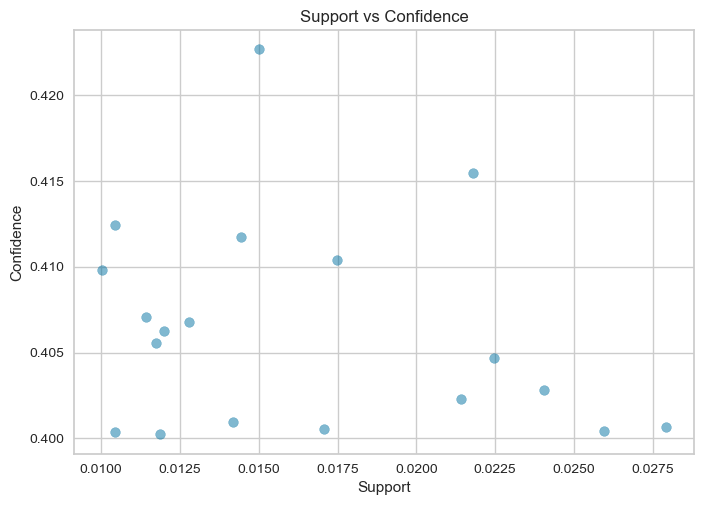

In [141]:
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs Confidence')
plt.show()

PRUEBA REGLAS DE ASOCIACION POR MARCA/PRODUCTO

In [142]:
# Agrupar por cliente, tienda y fecha de transacción, y crear una lista de nombres de productos
product_name_data = df_combined.groupby(['customer_id', 'store_id','store_type', 'transaction_date']).agg(
    total_spent=('product_retail_price', 'sum'),  # Suma de precios para obtener el total gastado
    product_list=('product_brand', lambda x: list(x))  # Crear lista de nombres de productos
).reset_index()

product_name_data.columns = ['Customer ID', 'Store ID', 'Store Type','Transaction Date','Total Ticket', 'Product List']
product_name_data.head()

Customer ID  Store ID   Store Type Transaction Date  Total Ticket  \
0            3        15  Supermarket       1997-04-27         13.29   
1            3        15  Supermarket       1997-10-22         12.96   
2            3        15  Supermarket       1997-11-27          7.87   
3            3        15  Supermarket       1998-03-29         20.87   
4            3        15  Supermarket       1998-04-17         14.02   

                                        Product List  
0  [Lake, CDR, Monarch, Faux Products, Skinner, H...  
1  [Pleasant, Consolidated, Big Time, American, I...  
2        [Carrington, High Top, Hilltop, Just Right]  
3  [Tell Tale, Gorilla, Ebony, Even Better, Bird ...  
4  [Red Wing, Gorilla, Gorilla, Consolidated, Mon...

In [143]:
transactions_name = product_name_data['Product List'].tolist()
transactions_name[:5]

[['Lake', 'CDR', 'Monarch', 'Faux Products', 'Skinner', 'High Top', 'Super'],
 ['Pleasant', 'Consolidated', 'Big Time', 'American', 'Imagine', 'Red Wing'],
 ['Carrington', 'High Top', 'Hilltop', 'Just Right'],
 ['Tell Tale',
  'Gorilla',
  'Ebony',
  'Even Better',
  'Bird Call',
  'Bird Call',
  'Gauss'],
 ['Red Wing', 'Gorilla', 'Gorilla', 'Consolidated', 'Monarch', 'Musial']]

In [144]:
te2 = TransactionEncoder()
te2_array = te2.fit(transactions_name).transform(transactions_name)
df_transactions_name_rules = pd.DataFrame(te2_array, columns=te2.columns_)
df_transactions_name_rules.head()

ADJ  Akron  American  Amigo  Applause  Atomic  BBB Best   Best  \
0  False  False     False  False     False   False     False  False   
1  False  False      True  False     False   False     False  False   
2  False  False     False  False     False   False     False  False   
3  False  False     False  False     False   False     False  False   
4  False  False     False  False     False   False     False  False   

   Best Choice  Better  Big City  Big Time  Bird Call  Black Tie  Blue Label  \
0        False   False     False     False      False      False       False   
1        False   False     False      True      False      False       False   
2        False   False     False     False      False      False       False   
3        False   False     False     False       True      False       False   
4        False   False     False     False      False      False       False   

   Blue Medal  Booker  Bravo    CDR  Carlson  Carrington  Choice   Club  \
0       False   False  False   True    False       False   False  False   
1       False   False  False  False    False       False   False  False   
2       False   False  False  False    False        True   False  False   
3       False   False  False  False    False       False   False  False   
4       False   False  False  False    False       False   False  False   

   Colony  Colossal  Consolidated  Cormorant  Curlew  Cutting Edge  Denny  \
0   False     False         False      False   False         False  False   
1   False     False          True      False   False         False  False   
2   False     False         False      False   False         False  False   
3   False     False         False      False   False         False  False   
4   False     False          True      False   False         False  False   

   Discover  Dollar  Dual City  Ebony  Even Better  Excel  Excellent  \
0     False   False      False  False        False  False      False   
1     False   False      False  False        False  False      False   
2     False   False      False  False        False  False      False   
3     False   False      False   True         True  False      False   
4     False   False      False  False        False  False      False   

   Fabulous  Fantastic   Fast  Faux Products  Footnote  Fort West  Framton  \
0     False      False  False           True     False      False    False   
1     False      False  False          False     False      False    False   
2     False      False  False          False     False      False    False   
3     False      False  False          False     False      False    False   
4     False      False  False          False     False      False    False   

   Gauss  Genteel  Gerolli  Giant  Golden   Good  Gorilla  Great  \
0  False    False    False  False   False  False    False  False   
1  False    False    False  False   False  False    False  False   
2  False    False    False  False   False  False    False  False   
3   True    False    False  False   False  False     True  False   
4  False    False    False  False   False  False     True  False   

   Green Ribbon  Gulf Coast  Hermanos  High Quality  High Top  Hilltop  \
0         False       False     False         False      True    False   
1         False       False     False         False     False    False   
2         False       False     False         False      True     True   
3         False       False     False         False     False    False   
4         False       False     False         False     False    False   

   Horatio  Imagine  James Bay  Jardon  Jeffers  Johnson  Jumbo  Just Right  \
0    False    False      False   False    False    False  False       False   
1    False     True      False   False    False    False  False       False   
2    False    False      False   False    False    False  False        True   
3    False    False      False   False    False    False  False       False   
4    False    False      False  

In [145]:
df_transactions_name_rules.shape

(58381, 111)

In [146]:
print(df_transactions_name_rules.sum().sort_values(ascending=False).head(10))  # Top ítems más frecuentes

Hermanos       7586
Tell Tale      7132
Ebony          7053
Tri-State      6915
High Top       6659
Nationeel      6073
Fort West      5906
Fast           5845
Horatio        5761
Best Choice    5669
dtype: int64


In [147]:
# Ajustar min_support para probar
for support in [0.01,0.02, 0.03, 0.04, 0.05]:
    frequent_itemsets_name = apriori(df_transactions_name_rules, min_support=support, use_colnames=True)
    print(f"Min Support: {support} -> Frequent Itemsets: {len(frequent_itemsets_name)}")

Min Support: 0.01 -> Frequent Itemsets: 197
Min Support: 0.02 -> Frequent Itemsets: 65
Min Support: 0.03 -> Frequent Itemsets: 49
Min Support: 0.04 -> Frequent Itemsets: 42
Min Support: 0.05 -> Frequent Itemsets: 40


In [148]:
frequent_itemsets_001 = apriori(df_transactions_name_rules, min_support=0.01, use_colnames=True)

In [149]:
# Generar las reglas
rules_001 = association_rules(frequent_itemsets_001, metric="support", min_threshold=0.01)

# Ordenar las reglas por lift, confidence y support
rules_sorted = rules_001.sort_values(by=["confidence", "lift"], ascending=[False, False])

# Mostrar las principales reglas
print(f"Total de reglas generadas: {len(rules_sorted)}")
rules_sorted.head(20)

Total de reglas generadas: 222


antecedents  consequents  antecedent support  consequent support  \
163     (Tell Tale)   (Hermanos)            0.122163            0.129940   
45            (CDR)   (Hermanos)            0.076086            0.129940   
159        (Sunset)   (Hermanos)            0.095819            0.129940   
166  (High Quality)  (Tell Tale)            0.086826            0.122163   
51     (Carrington)   (Hermanos)            0.092838            0.129940   
149     (Landslide)   (Hermanos)            0.081139            0.129940   
123     (Fort West)   (Hermanos)            0.101163            0.129940   
162      (Hermanos)  (Tell Tale)            0.129940            0.122163   
157      (Red Wing)   (Hermanos)            0.093455            0.129940   
164     (Tri-State)   (Hermanos)            0.118446            0.129940   
143      (High Top)   (Hermanos)            0.114061            0.129940   
71          (Denny)   (Hermanos)            0.084754            0.129940   
218         (Super)  (Tri-State)            0.083263            0.118446   
5        (BBB Best)   (Hermanos)            0.085610            0.129940   
121          (Fast)  (Tri-State)            0.100118            0.118446   
88       (High Top)      (Ebony)            0.114061            0.120810   
180         (Super)   (High Top)            0.083263            0.114061   
73          (Denny)   (High Top)            0.084754            0.114061   
43            (CDR)  (Fort West)            0.076086            0.101163   
58     (Carrington)  (Tell Tale)            0.092838            0.122163   

      support  confidence      lift  leverage  conviction  zhangs_metric  
163  0.019493    0.159563  1.227975  0.003619    1.035247       0.211487  
45   0.012127    0.159388  1.226629  0.002241    1.035032       0.199973  
159  0.014885    0.155345  1.195518  0.002434    1.030078       0.180873  
166  0.013429    0.154666  1.266059  0.002822    1.038449       0.230129  
51   0.014251    0.153506  1.181361  0.002188    1.027840       0.169230  
149  0.012333    0.151995  1.169736  0.001790    1.026009       0.157920  
123  0.015262    0.150864  1.161029  0.002117    1.024641       0.154305  
162  0.019493    0.150013  1.227975  0.003619    1.032765       0.213378  
157  0.013926    0.149010  1.146766  0.001782    1.022410       0.141176  
164  0.017557    0.148228  1.140750  0.002166    1.021472       0.139961  
143  0.016821    0.147470  1.134909  0.001999    1.020562       0.134177  
71   0.012487    0.147332  1.133852  0.001474    1.020398       0.128983  
218  0.012213    0.146678  1.238350  0.002351    1.033084       0.209955  
5    0.012504    0.146058  1.124049  0.001380    1.018876       0.120692  
121  0.014508    0.144910  1.223428  0.002650    1.030949       0.202942  
88   0.016461    0.144316  1.194571  0.002681    1.027471       0.183850  
180  0.012007    0.144209  1.264314  0.002510    1.035228       0.228045  
73   0.012179    0.143694  1.259802  0.002512    1.034606       0.225322  
43   0.010740    0.141153  1.395298  0.003043    1.046562       0.306638  
58   0.013086    0.140959  1.153863  0.001745    1.021881       0.146993

In [150]:
frequent_itemsets_005 = apriori(df_transactions_name_rules, min_support=0.05, use_colnames=True)
# Generar las reglas
rules_005 = association_rules(frequent_itemsets_005, metric="support", min_threshold=0.05)

# Ordenar las reglas por lift, confidence y support
rules_sorted005 = rules_005.sort_values(by=["confidence", "lift"], ascending=[False, False])

# Mostrar las principales reglas
print(f"Total de reglas generadas: {len(rules_sorted005)}")
rules_sorted005.head(20)

Total de reglas generadas: 0


Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction, zhangs_metric]
Index: []

Reglas con alto lift y confidence: Identificar productos que deberían promocionarse juntos.

Bajo support pero alto confidence: Productos que pueden tener un nicho de mercado específico.

## 3.3 ANALISIS DE DEMANDA

### Preparacion dataset

In [151]:
# Agrupar datos por tienda, año y mes
store_monthly_data = df_combined.groupby(['store_id', 'year', 'month']).agg(
    total_monthly_spent=pd.NamedAgg(
        column='product_retail_price', 
        aggfunc=lambda x: round((x * df_combined.loc[x.index, 'quantity_x']).sum(), 2)
    ),
    total_monthly_products=pd.NamedAgg(column='quantity_x', aggfunc='sum')
).reset_index()

store_monthly_data.rename(columns={
    'store_id': 'Store ID',
    'year': 'Year',
    'month': 'Month'
}, inplace=True)

store_monthly_data.head()

Store ID  Year  Month  total_monthly_spent  total_monthly_products
0         1  1998      1              5668.27                    2622
1         1  1998      2              4212.25                    1997
2         1  1998      3              5182.62                    2423
3         1  1998      4              4604.30                    2251
4         1  1998      5              4312.83                    2035

In [152]:
demand_forecasting = store_monthly_data.merge(
    df_stores[['store_id', 'store_country', 'store_state', 'store_type']],
    left_on='Store ID',  
    right_on='store_id', 
    how='left'  
)

demand_forecasting.drop(columns=['store_id'], inplace=True)

In [153]:
demand_forecasting['date'] = pd.to_datetime(
    demand_forecasting['Year'].astype(str) + '-' + demand_forecasting['Month'].astype(str) + '-01'
)

# Se ordena por fecha
demand_forecasting = demand_forecasting.sort_values(by=['Store ID', 'date']).reset_index(drop=True)
demand_forecasting.head()

Store ID  Year  Month  total_monthly_spent  total_monthly_products  \
0         1  1998      1              5668.27                    2622   
1         1  1998      2              4212.25                    1997   
2         1  1998      3              5182.62                    2423   
3         1  1998      4              4604.30                    2251   
4         1  1998      5              4312.83                    2035   

  store_country store_state   store_type       date  
0        Mexico    Guerrero  Supermarket 1998-01-01  
1        Mexico    Guerrero  Supermarket 1998-02-01  
2        Mexico    Guerrero  Supermarket 1998-03-01  
3        Mexico    Guerrero  Supermarket 1998-04-01  
4        Mexico    Guerrero  Supermarket 1998-05-01

In [154]:
country_demand = demand_forecasting.groupby(['store_country', 'date']).agg(
    total_monthly_spent=('total_monthly_spent', 'sum'),
    total_monthly_products=('total_monthly_products', 'sum')
).reset_index()

# Asegurar que la columna de fecha esté en el formato adecuado
country_demand['date'] = pd.to_datetime(country_demand['date'])

# Separar las métricas para análisis independiente
country_spent = country_demand[['store_country', 'date', 'total_monthly_spent']]
#country_products = country_demand[['store_country', 'date', 'total_monthly_products']]
country_spent.head()

store_country       date  total_monthly_spent
0        Canada 1998-01-01              7144.80
1        Canada 1998-02-01              8332.66
2        Canada 1998-03-01              8403.67
3        Canada 1998-04-01              8484.02
4        Canada 1998-05-01              9342.32

In [155]:
# Verificar el rango de fechas en tus datos
print(f"Fecha mínima: {country_spent['date'].min()}")
print(f"Fecha máxima: {country_spent['date'].max()}")
print(f"Total de meses: {country_spent['date'].nunique()}")

Fecha mínima: 1997-01-01 00:00:00
Fecha máxima: 1998-12-01 00:00:00
Total de meses: 24


In [156]:
# Verificar el rango de fechas por cada país
for country in country_spent['store_country'].unique():
    country_data = country_spent[country_spent['store_country'] == country]
    min_date = country_data['date'].min()
    max_date = country_data['date'].max()
    unique_months = country_data['date'].nunique()
    
    print(f"País: {country}")
    print(f"Fecha mínima: {min_date}")
    print(f"Fecha máxima: {max_date}")
    print(f"Total de meses: {unique_months}")
    print("-" * 30)

País: Canada
Fecha mínima: 1998-01-01 00:00:00
Fecha máxima: 1998-12-01 00:00:00
Total de meses: 12
------------------------------
País: Mexico
Fecha mínima: 1998-01-01 00:00:00
Fecha máxima: 1998-12-01 00:00:00
Total de meses: 12
------------------------------
País: USA
Fecha mínima: 1997-01-01 00:00:00
Fecha máxima: 1998-12-01 00:00:00
Total de meses: 24
------------------------------


Se realiza analisis de las tiendas de USA ya que Mexico y Canadá no disponen de datos historicos de 1997

### TIENDAS USA

In [157]:
usa_demand = demand_forecasting[demand_forecasting['store_country'] == 'USA']
usa_demand.head()

Store ID  Year  Month  total_monthly_spent  total_monthly_products  \
12         2  1997      1               375.06                     185   
13         2  1997      2               358.23                     159   
14         2  1997      3               362.17                     174   
15         2  1997      4               398.78                     195   
16         2  1997      5               356.63                     175   

   store_country store_state     store_type       date  
12           USA          WA  Small Grocery 1997-01-01  
13           USA          WA  Small Grocery 1997-02-01  
14           USA          WA  Small Grocery 1997-03-01  
15           USA          WA  Small Grocery 1997-04-01  
16           USA          WA  Small Grocery 1997-05-01

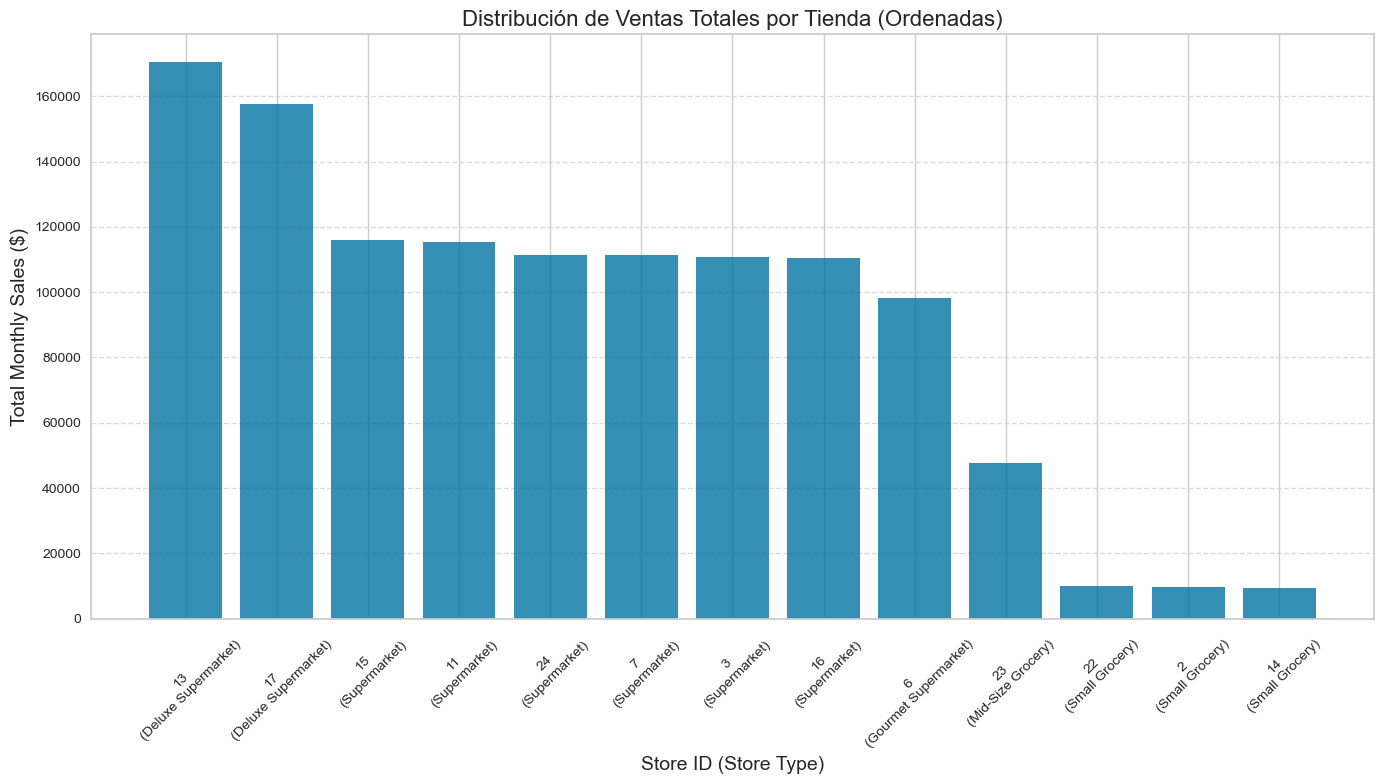

In [158]:
# Se calcula las ventas totales por tienda 
sales_by_store = usa_demand.groupby(['Store ID', 'store_type']).agg(
    total_monthly_spent=('total_monthly_spent', 'sum')
).reset_index()
sales_by_store = sales_by_store.sort_values(by='total_monthly_spent', ascending=False)

# Gráfico de barras
plt.figure(figsize=(14, 8))  
plt.bar(
    x=range(len(sales_by_store)), 
    height=sales_by_store['total_monthly_spent'], 
    alpha=0.8
)

plt.xticks(
    ticks=range(len(sales_by_store)),
    labels=[f"{store_id}\n({store_type})" for store_id, store_type in zip(sales_by_store['Store ID'], sales_by_store['store_type'])],
    rotation=45, 
    fontsize=10
)

plt.title('Distribución de Ventas Totales por Tienda (Ordenadas)', fontsize=16)
plt.xlabel('Store ID (Store Type)', fontsize=14)
plt.ylabel('Total Monthly Sales ($)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

C:\Users\abeli\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\abeli\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\abeli\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\abeli\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) 

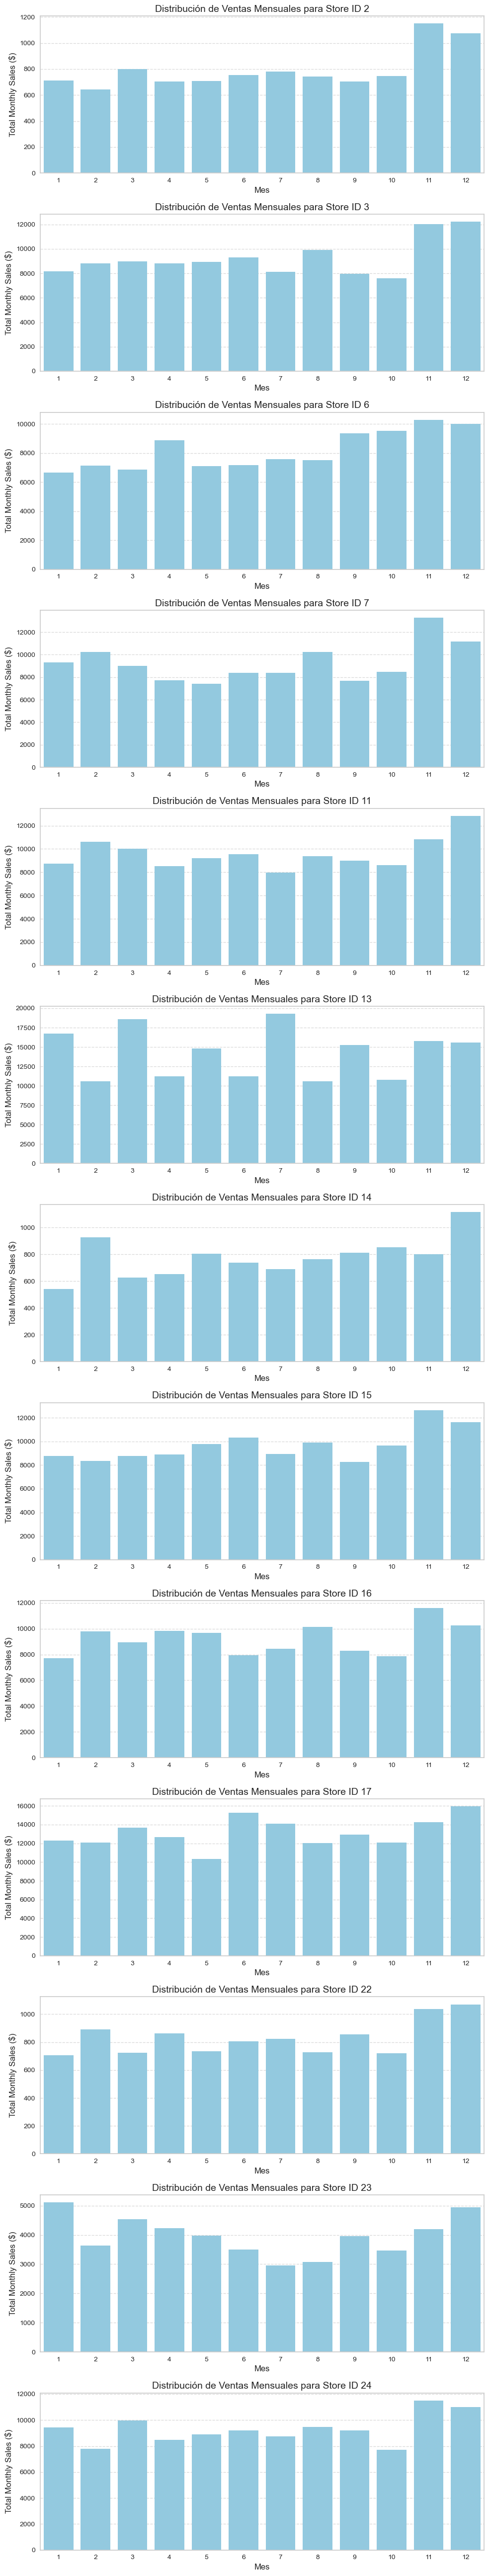

In [159]:
monthly_sales_by_store = usa_demand.groupby(['Store ID', 'Month']).agg(
    total_monthly_spent=('total_monthly_spent', 'sum')
).reset_index()

store_ids = monthly_sales_by_store['Store ID'].unique()


fig, axes = plt.subplots(nrows=len(store_ids), ncols=1, figsize=(10, len(store_ids) * 4))

# Iterar sobre las tiendas y crear gráficos
for ax, store_id in zip(axes, store_ids):
    store_data = monthly_sales_by_store[monthly_sales_by_store['Store ID'] == store_id]
    
    sns.barplot(
        x='Month', 
        y='total_monthly_spent', 
        data=store_data, 
        ax=ax, 
        order=list(range(1, 13)),
        color="#87CEEB"
    )
    
    ax.set_title(f"Distribución de Ventas Mensuales para Store ID {store_id}", fontsize=14)
    ax.set_xlabel("Mes", fontsize=12)
    ax.set_ylabel("Total Monthly Sales ($)", fontsize=12)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout() 
plt.show()

In [160]:
store_demand = usa_demand

In [161]:
store_demand.head()

Store ID  Year  Month  total_monthly_spent  total_monthly_products  \
12         2  1997      1               375.06                     185   
13         2  1997      2               358.23                     159   
14         2  1997      3               362.17                     174   
15         2  1997      4               398.78                     195   
16         2  1997      5               356.63                     175   

   store_country store_state     store_type       date  
12           USA          WA  Small Grocery 1997-01-01  
13           USA          WA  Small Grocery 1997-02-01  
14           USA          WA  Small Grocery 1997-03-01  
15           USA          WA  Small Grocery 1997-04-01  
16           USA          WA  Small Grocery 1997-05-01

### PREDICCION DE DEMANDA USA POR DIA

Se recupera el dataset de los tickets ya que tiene la venta agrupada de cada cliente y se une con el df de tiendas para obtener el pais y el tipo de tienda

In [162]:
ticket_data.head()

Customer ID  Store ID Transaction Date  Total Ticket  Total Products  Year  \
0            3        15       1997-04-27         33.48              18  1997   
1            3        15       1997-10-22         40.21              19  1997   
2            3        15       1997-11-27         24.85              13  1997   
3            3        15       1998-03-29         67.15              23  1998   
4            3        15       1998-04-17         37.48              16  1998   

   Month  Week  
0      4    17  
1     10    43  
2     11    48  
3      3    13  
4      4    16

In [163]:
daily_demand_forecasting = ticket_data.merge(
    df_stores[['store_id', 'store_country', 'store_state', 'store_type']],
    left_on='Store ID',  
    right_on='store_id',  
    how='left'  
)

daily_demand_forecasting.drop(columns=['store_id'], inplace=True)
daily_demand_forecasting.head()

Customer ID  Store ID Transaction Date  Total Ticket  Total Products  Year  \
0            3        15       1997-04-27         33.48              18  1997   
1            3        15       1997-10-22         40.21              19  1997   
2            3        15       1997-11-27         24.85              13  1997   
3            3        15       1998-03-29         67.15              23  1998   
4            3        15       1998-04-17         37.48              16  1998   

   Month  Week store_country store_state   store_type  
0      4    17           USA          WA  Supermarket  
1     10    43           USA          WA  Supermarket  
2     11    48           USA          WA  Supermarket  
3      3    13           USA          WA  Supermarket  
4      4    16           USA          WA  Supermarket

In [164]:
daily_country_demand = daily_demand_forecasting.groupby(['store_country', 'Transaction Date']).agg(
    total_daily_spent=('Total Ticket', 'sum'),
    total_daily_products=('Total Products', 'sum')
).reset_index()
daily_country_demand['Transaction Date'] = pd.to_datetime(daily_country_demand['Transaction Date'])
daily_country_spent = daily_country_demand[['store_country', 'Transaction Date', 'total_daily_spent']]
daily_country_products = daily_country_demand[['store_country', 'Transaction Date', 'total_daily_products']]
daily_country_spent.head()

store_country Transaction Date  total_daily_spent
0        Canada       1998-01-05            1134.73
1        Canada       1998-01-07            1443.75
2        Canada       1998-01-09             943.09
3        Canada       1998-01-10            1013.48
4        Canada       1998-01-11             357.42

#### ANALISIS DIARIO POR TIENDA USA

In [165]:
daily_usa_demand = daily_demand_forecasting[daily_demand_forecasting['store_country'] == 'USA']
daily_usa_demand.head()

Customer ID  Store ID Transaction Date  Total Ticket  Total Products  Year  \
0            3        15       1997-04-27         33.48              18  1997   
1            3        15       1997-10-22         40.21              19  1997   
2            3        15       1997-11-27         24.85              13  1997   
3            3        15       1998-03-29         67.15              23  1998   
4            3        15       1998-04-17         37.48              16  1998   

   Month  Week store_country store_state   store_type  
0      4    17           USA          WA  Supermarket  
1     10    43           USA          WA  Supermarket  
2     11    48           USA          WA  Supermarket  
3      3    13           USA          WA  Supermarket  
4      4    16           USA          WA  Supermarket

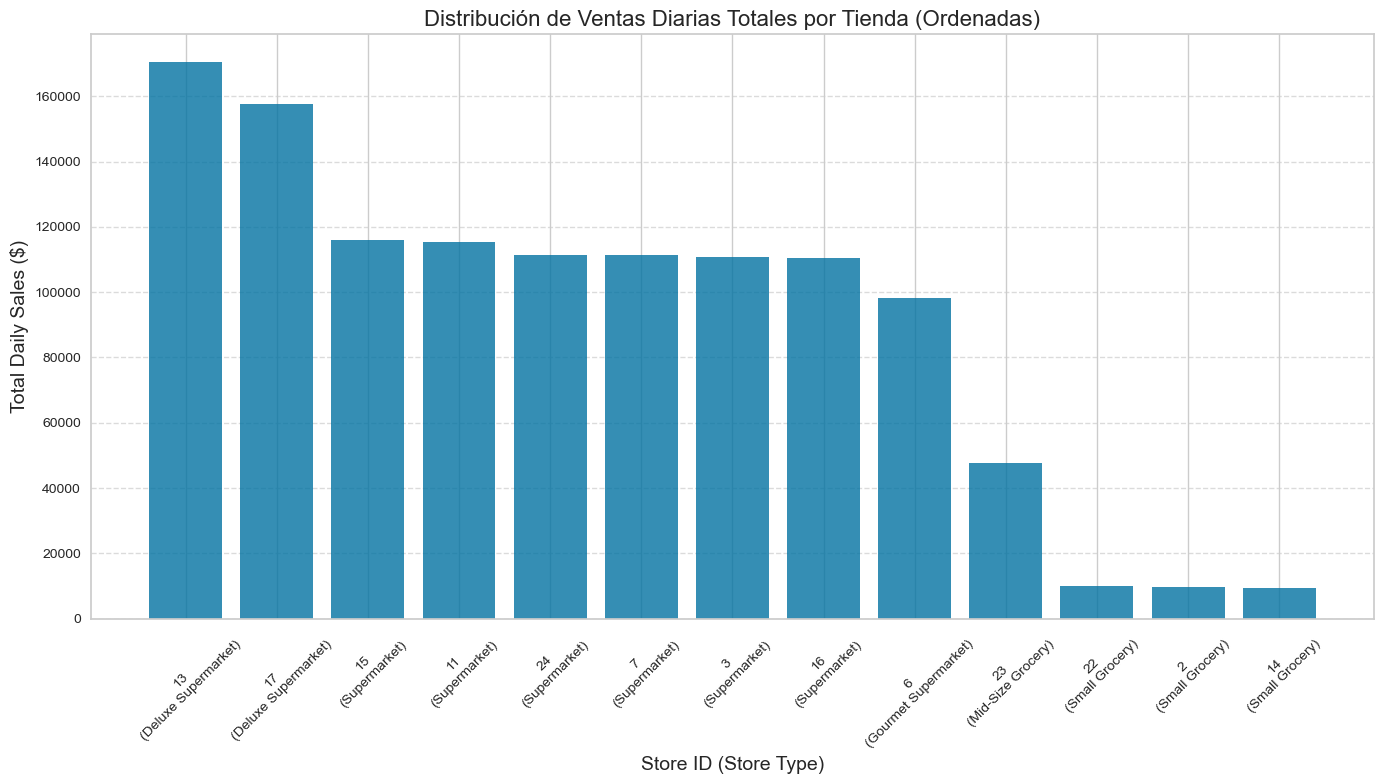

In [166]:
# Calcular las ventas totales por tienda
daily_sales_by_store = daily_usa_demand.groupby(['Store ID', 'store_type']).agg(
    total_daily_spent=('Total Ticket', 'sum')
).reset_index()

daily_sales_by_store = daily_sales_by_store.sort_values(by='total_daily_spent', ascending=False)

# Gráfico de barras
plt.figure(figsize=(14, 8)) 
plt.bar(
    x=range(len(daily_sales_by_store)),  
    height=daily_sales_by_store['total_daily_spent'], 
    alpha=0.8
)

plt.xticks(
    ticks=range(len(daily_sales_by_store)),
    labels=[f"{store_id}\n({store_type})" for store_id, store_type in zip(daily_sales_by_store['Store ID'], daily_sales_by_store['store_type'])],
    rotation=45,  
    fontsize=10
)


plt.title('Distribución de Ventas Diarias Totales por Tienda (Ordenadas)', fontsize=16)
plt.xlabel('Store ID (Store Type)', fontsize=14)
plt.ylabel('Total Daily Sales ($)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout() 
plt.show()

In [167]:
# Agregar datos por tienda y fecha
daily_store_demand = daily_usa_demand
# Calcular fecha mínima y máxima para cada tienda
daily_store_date_range = daily_store_demand.groupby('Store ID')['Transaction Date'].agg(['min', 'max']).reset_index()
daily_store_date_range

Store ID        min        max
0          2 1997-01-05 1998-12-25
1          3 1997-01-06 1998-12-25
2          6 1997-01-01 1998-12-28
3          7 1997-01-03 1998-12-20
4         11 1997-01-02 1998-12-30
5         13 1997-01-07 1998-12-27
6         14 1997-01-01 1998-12-29
7         15 1997-01-05 1998-12-16
8         16 1997-01-13 1998-12-27
9         17 1997-01-11 1998-12-29
10        22 1997-01-11 1998-12-23
11        23 1997-01-02 1998-12-26
12        24 1997-01-06 1998-12-25

In [168]:
daily_store_demand = daily_usa_demand.groupby(['Store ID', 'Transaction Date','store_type']).agg(
    total_daily_spent=('Total Ticket', 'sum'),
    total_daily_products=('Total Products', 'sum')
).reset_index()
daily_store_demand['Transaction Date'] = pd.to_datetime(daily_store_demand['Transaction Date'])
# Agregar una columna con el nombre del día
daily_store_demand['Day of Week'] = daily_store_demand['Transaction Date'].dt.day_name()
daily_store_demand.head()


Store ID Transaction Date     store_type  total_daily_spent  \
0         2       1997-01-05  Small Grocery              51.19   
1         2       1997-01-08  Small Grocery              69.30   
2         2       1997-01-10  Small Grocery              83.59   
3         2       1997-01-28  Small Grocery              68.60   
4         2       1997-01-29  Small Grocery             102.38   

   total_daily_products Day of Week  
0                    29      Sunday  
1                    35   Wednesday  
2                    38      Friday  
3                    28     Tuesday  
4                    55   Wednesday

In [169]:
daily_usa_demand.head()

Customer ID  Store ID Transaction Date  Total Ticket  Total Products  Year  \
0            3        15       1997-04-27         33.48              18  1997   
1            3        15       1997-10-22         40.21              19  1997   
2            3        15       1997-11-27         24.85              13  1997   
3            3        15       1998-03-29         67.15              23  1998   
4            3        15       1998-04-17         37.48              16  1998   

   Month  Week store_country store_state   store_type  
0      4    17           USA          WA  Supermarket  
1     10    43           USA          WA  Supermarket  
2     11    48           USA          WA  Supermarket  
3      3    13           USA          WA  Supermarket  
4      4    16           USA          WA  Supermarket

Se calcula las ventas por día de la semana para ver la distribución en cason que existan días que no hay venta por cierre.

In [170]:
daily_usa_demand['Transaction Date'] = pd.to_datetime(daily_usa_demand['Transaction Date'])
total_daily_spent = daily_usa_demand.groupby('Transaction Date')['Total Ticket'].sum().reset_index()
total_daily_spent.columns = ['Transaction Date', 'total_daily_spent']

# Columna en DataFrame original
daily_usa_demand = pd.merge(daily_usa_demand, total_daily_spent, on='Transaction Date', how='left')

In [171]:
# Agregar una columna con el nombre del día
daily_usa_demand['Day of Week'] = daily_usa_demand['Transaction Date'].dt.day_name()
# Filtrar el DataFrame por el país "USA"
daily_usa_demand = daily_usa_demand[daily_usa_demand['store_country'] == 'USA']
daily_usa_demand.head()

Customer ID  Store ID Transaction Date  Total Ticket  Total Products  Year  \
0            3        15       1997-04-27         33.48              18  1997   
1            3        15       1997-10-22         40.21              19  1997   
2            3        15       1997-11-27         24.85              13  1997   
3            3        15       1998-03-29         67.15              23  1998   
4            3        15       1998-04-17         37.48              16  1998   

   Month  Week store_country store_state   store_type  total_daily_spent  \
0      4    17           USA          WA  Supermarket            2416.70   
1     10    43           USA          WA  Supermarket            3874.17   
2     11    48           USA          WA  Supermarket            1793.09   
3      3    13           USA          WA  Supermarket            2043.41   
4      4    16           USA          WA  Supermarket             747.05   

  Day of Week  
0      Sunday  
1   Wednesday  
2    Thursday  
3      Sunday  
4      Friday

C:\Users\abeli\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\abeli\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\abeli\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


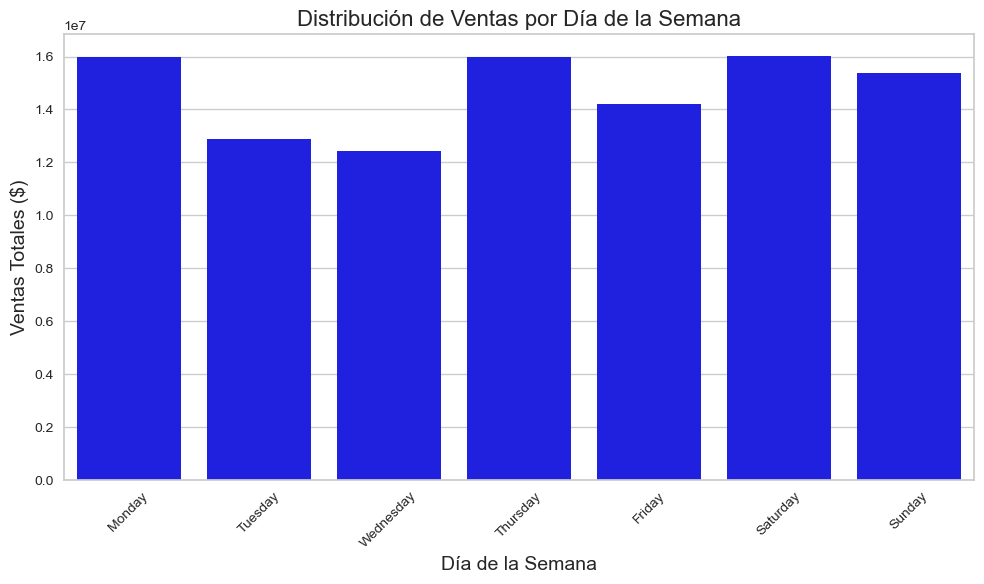

In [172]:
# Se calcula el total de ventas por día de la semana
day_of_week_sales = daily_usa_demand.groupby('Day of Week')['total_daily_spent'].sum().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

# Crear la gráfica
plt.figure(figsize=(10, 6))
sns.barplot(x=day_of_week_sales.index, y=day_of_week_sales.values, color="blue")
plt.title("Distribución de Ventas por Día de la Semana", fontsize=16)
plt.xlabel("Día de la Semana", fontsize=14)
plt.ylabel("Ventas Totales ($)", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Se realiza histograma por cada mes la venta de cada día para ver de manera visual la distibución de ventas cada día de la semana.

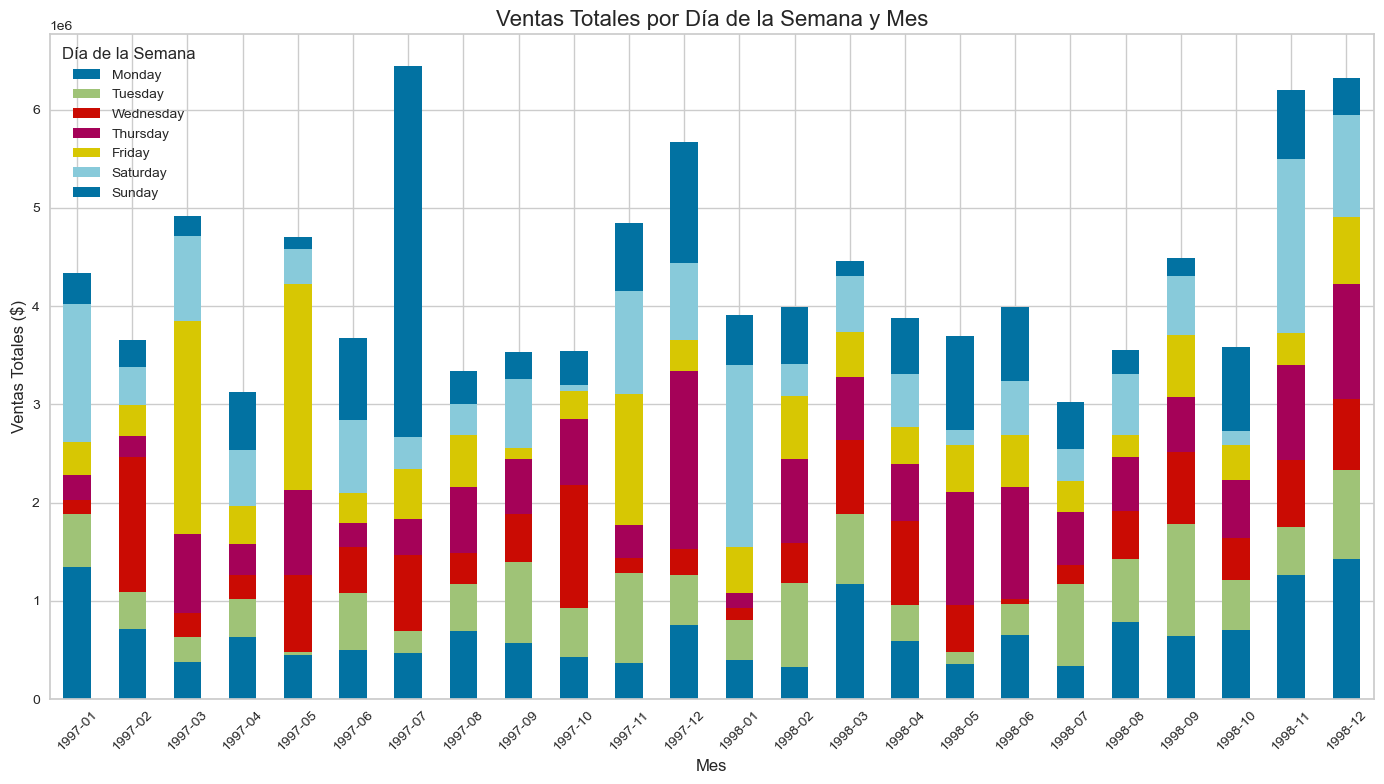

In [173]:
# Columna para el mes
daily_usa_demand['Month'] = daily_usa_demand['Transaction Date'].dt.to_period('M')

# Agrupar por mes y día de la semana y sumar las ventas
grouped_data = daily_usa_demand.groupby(['Month', 'Day of Week'])['total_daily_spent'].sum().reset_index()

# Pivotar los datos para que cada día de la semana sea una columna
pivot_data = grouped_data.pivot(index='Month', columns='Day of Week', values='total_daily_spent')

# Reordenar los días de la semana (opcional, según preferencia)
pivot_data = pivot_data[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']]

pivot_data.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Ventas Totales por Día de la Semana y Mes', fontsize=16)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Ventas Totales ($)', fontsize=12)
plt.legend(title='Día de la Semana')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Se crea un df para ver los dias de la semana sin venta en cada mes por cada tienda

In [174]:
# Mes y el día de la semana
daily_store_demand['Month'] = daily_store_demand['Transaction Date'].dt.month
daily_store_demand['Day of Week'] = daily_store_demand['Transaction Date'].dt.day_name()
# Agrupar por Store ID, Month y Day of Week y sumar total_daily_spent
grouped_store_data = daily_store_demand.groupby(['Store ID', 'Month', 'Day of Week'], as_index=False)['total_daily_spent'].sum()
grouped_store_data.head()

Store ID  Month Day of Week  total_daily_spent
0         2      1      Friday             146.09
1         2      1    Saturday              95.78
2         2      1      Sunday             110.25
3         2      1     Tuesday              68.60
4         2      1   Wednesday             292.64

In [175]:
# DataFrame pivotado para representar los datos en formato de gráfico
store_demand_pivot = grouped_store_data.pivot_table(
    index=['Store ID', 'Month'],
    columns='Day of Week',
    values='total_daily_spent',
    aggfunc='sum'
)

store_demand_pivot = store_demand_pivot[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']]
store_demand_pivot = store_demand_pivot.reset_index()
store_demand_pivot.head()

Day of Week  Store ID  Month  Monday  Tuesday  Wednesday  Thursday  Friday  \
0                   2      1     NaN    68.60     292.64       NaN  146.09   
1                   2      2  125.89    53.80      69.32       NaN  133.54   
2                   2      3     NaN   136.11     157.16     64.40  179.39   
3                   2      4  205.43    79.20      69.10    139.58   88.87   
4                   2      5     NaN    82.83     133.39     87.97   71.32   

Day of Week  Saturday  Sunday  
0               95.78  110.25  
1               44.59  217.55  
2               85.20  175.83  
3                 NaN  123.05  
4              121.59  209.24

In [176]:
# Valores nulos por día de la semana para cada tienda
null_counts_by_store = store_demand_pivot.groupby('Store ID')[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']].apply(lambda df: df.isnull().sum())
null_counts_by_store.head(10)

Day of Week  Monday  Tuesday  Wednesday  Thursday  Friday  Saturday  Sunday
Store ID                                                                   
2                 6        0          3         2       2         4       1
3                 0        0          4         4       0         1       5
6                 0        2          4         2       2         2       4
7                 2        4          5         2       1         3       2
11                1        2          2         0       2         3       2
13                1        1          5         3       2         5       2
14                4        1          3         2       3         3       3
15                0        1          3         2       4         3       2
16                2        2          2         2       0         2       3
17                0        2          3         0       2         3       2

Se observa la cantidad total de días sin venta en cada mes. Por ejemplo en la tienda 2 existen 14 meses en los que el lunes no se ha registrado ventas, 5 meses en los que el martes nos e ha registrado venta.

In [177]:
daily_store_demand.head()

Store ID Transaction Date     store_type  total_daily_spent  \
0         2       1997-01-05  Small Grocery              51.19   
1         2       1997-01-08  Small Grocery              69.30   
2         2       1997-01-10  Small Grocery              83.59   
3         2       1997-01-28  Small Grocery              68.60   
4         2       1997-01-29  Small Grocery             102.38   

   total_daily_products Day of Week  Month  
0                    29      Sunday      1  
1                    35   Wednesday      1  
2                    38      Friday      1  
3                    28     Tuesday      1  
4                    55   Wednesday      1

Se agrupan los datos diarios de estados unidos para ver por tipo de supermercado los dias de venta

In [178]:
# Agrupar por store_type y calcular métricas agregadas
store_type_aggregated = daily_store_demand.groupby('store_type').agg(
    total_sales=('total_daily_spent', 'sum'),
    total_products=('total_daily_products', 'sum'),
    average_sales_per_day=('total_daily_spent', 'mean'),
    average_products_per_day=('total_daily_products', 'mean'),
    days_with_data=('Transaction Date', 'count')
).reset_index()

store_type_aggregated

store_type  total_sales  total_products  average_sales_per_day  \
0   Deluxe Supermarket    328154.64          155134            1367.311000   
1  Gourmet Supermarket     98114.78           46129             817.623167   
2     Mid-Size Grocery     47576.78           22377             396.473167   
3        Small Grocery     28800.92           13598              80.002556   
4          Supermarket    675391.36          318694             938.043556   

   average_products_per_day  days_with_data  
0                646.391667             240  
1                384.408333             120  
2                186.475000             120  
3                 37.772222             360  
4                442.630556             720

In [179]:
# Filtrar supermercados
supermarket_data = daily_store_demand[daily_store_demand['store_type'] == 'Supermarket']

# Agrupar por fecha de transacción y día de la semana para sumar las ventas
supermarket_data = supermarket_data.groupby(['Transaction Date', 'Day of Week']).agg(
    total_daily_spent=('total_daily_spent', 'sum')
).reset_index()
supermarket_data.head()

Transaction Date Day of Week  total_daily_spent
0       1997-01-02    Thursday             882.94
1       1997-01-03      Friday             867.64
2       1997-01-05      Sunday            1563.46
3       1997-01-06      Monday            1718.69
4       1997-01-07     Tuesday             835.74

In [180]:
supermarket_data.shape

(487, 3)

### IMPUTACION DE DATOS FALTANTES

Se crea un dataset con todas las fechas existentes en el periodo de 1997 y 1998 y se combina con el dataset para obtener las fechas en los que no hay venta.

In [181]:
# Rango completo de fechas
date_range = pd.date_range(start=supermarket_data['Transaction Date'].min(),
                           end=supermarket_data['Transaction Date'].max())

# DataFrame con todas las fechas
full_data = pd.DataFrame({'Transaction Date': date_range})

# Fusionar con supermarket_data
supermarket_data = full_data.merge(supermarket_data[['Transaction Date', 'Day of Week', 'total_daily_spent']],
                            on='Transaction Date', how='left')

# Completar el día de la semana para las fechas faltantes
supermarket_data['Day of Week'] = supermarket_data['Transaction Date'].dt.day_name()

# Convertir el día de la semana a variables dummy
supermarket_data_encoded = pd.get_dummies(supermarket_data, columns=['Day of Week'], drop_first=True)

In [182]:
supermarket_data_encoded.head(10)

Transaction Date  total_daily_spent  Day of Week_Monday  \
0       1997-01-02             882.94               False   
1       1997-01-03             867.64               False   
2       1997-01-04                NaN               False   
3       1997-01-05            1563.46               False   
4       1997-01-06            1718.69                True   
5       1997-01-07             835.74               False   
6       1997-01-08                NaN               False   
7       1997-01-09             610.89               False   
8       1997-01-10             938.49               False   
9       1997-01-11             762.54               False   

   Day of Week_Saturday  Day of Week_Sunday  Day of Week_Thursday  \
0                 False               False                  True   
1                 False               False                 False   
2                  True               False                 False   
3                 False                True                 False   
4                 False               False                 False   
5                 False               False                 False   
6                 False               False                 False   
7                 False               False                  True   
8                 False               False                 False   
9                  True               False                 False   

   Day of Week_Tuesday  Day of Week_Wednesday  
0                False                  False  
1                False                  False  
2                False                  False  
3                False                  False  
4                False                  False  
5                 True                  False  
6                False                   True  
7                False                  False  
8                False                  False  
9                False                  False

Se imputan los datos faltantes con kneares neighbours tomando como referencia 3 vecinos para completar los dias sin venta.

In [183]:
# Aplicar KNNImputer
imputer = KNNImputer(n_neighbors=3)
imputed_data = imputer.fit_transform(supermarket_data_encoded[['total_daily_spent'] + list(supermarket_data_encoded.columns[2:])])

# Reemplazar los datos
supermarket_data['total_daily_spent'] = imputed_data[:, 0]

supermarket_data.head()

Transaction Date Day of Week  total_daily_spent
0       1997-01-02    Thursday             882.94
1       1997-01-03      Friday             867.64
2       1997-01-04    Saturday            1212.06
3       1997-01-05      Sunday            1563.46
4       1997-01-06      Monday            1718.69

In [184]:
supermarket_data['Transaction Date'] = pd.to_datetime(supermarket_data['Transaction Date'])

In [185]:
# Se elimina la fecha 1998-01-01
supermarket_data = supermarket_data[supermarket_data['Transaction Date'] != '1998-01-01']

In [186]:
supermarket_data.shape

(727, 3)

In [187]:
supermarket_data_copy = supermarket_data.copy()

Se obtienen las fechas catalogadas como días festivos para Estados Unidos en los años 1998 y 1999

In [188]:
import holidays
# Generar un calendario de vacaciones para USA
us_holidays = holidays.US(years=[1997, 1998, 1999])

# Se cambia nombre de columna de la fecha a ds
holidays_df = pd.DataFrame([
    {'holiday': name, 'ds': date} for date, name in us_holidays.items()
])
holidays_df['ds'] = pd.to_datetime(holidays_df['ds'])
holidays_df

holiday         ds
0                New Year's Day 1997-01-01
1                  Memorial Day 1997-05-26
2              Independence Day 1997-07-04
3                     Labor Day 1997-09-01
4                  Veterans Day 1997-11-11
5                  Thanksgiving 1997-11-27
6                 Christmas Day 1997-12-25
7    Martin Luther King Jr. Day 1997-01-20
8         Washington's Birthday 1997-02-17
9                New Year's Day 1998-01-01
10                 Memorial Day 1998-05-25
11             Independence Day 1998-07-04
12  Independence Day (observed) 1998-07-03
13                    Labor Day 1998-09-07
14                 Veterans Day 1998-11-11
15                 Thanksgiving 1998-11-26
16                Christmas Day 1998-12-25
17   Martin Luther King Jr. Day 1998-01-19
18        Washington's Birthday 1998-02-16
19               New Year's Day 1999-01-01
20    New Year's Day (observed) 1999-12-31
21                 Memorial Day 1999-05-31
22             Independence Day 1999-07-04
23  Independence Day (observed) 1999-07-05
24                    Labor Day 1999-09-06
25                 Veterans Day 1999-11-11
26                 Thanksgiving 1999-11-25
27                Christmas Day 1999-12-25
28     Christmas Day (observed) 1999-12-24
29   Martin Luther King Jr. Day 1999-01-18
30        Washington's Birthday 1999-02-15

In [189]:
supermarket_data = supermarket_data_copy.copy()

In [190]:
# Configuración inicial
supermarket_data.columns = ['Transaction Date', 'Day of Week', 'total_daily_spent']
supermarket_data.columns = ['ds', 'day_of_week', 'y']

Se realiza mapeo de los días de la semana para que Prophet lo pueda añadir como regresor.

In [191]:
supermarket_data['ds'] = pd.to_datetime(supermarket_data['ds'])
day_of_week_mapping = {
    "Monday": 0,
    "Tuesday": 1,
    "Wednesday": 2,
    "Thursday": 3,
    "Friday": 4,
    "Saturday": 5,
    "Sunday": 6,
}
supermarket_data['day_of_week'] = supermarket_data['day_of_week'].map(day_of_week_mapping)

In [192]:
supermarket_data.head()

ds  day_of_week        y
0 1997-01-02            3   882.94
1 1997-01-03            4   867.64
2 1997-01-04            5  1212.06
3 1997-01-05            6  1563.46
4 1997-01-06            0  1718.69

In [193]:
supermarket_data_codified = supermarket_data.copy()

In [194]:
supermarket_data = supermarket_data_codified.copy()

## MODELOS PROPHET

### Modelo 1 Standard

In [195]:
model1 = Prophet()
model1.fit(supermarket_data[['ds', 'y']])
# Predicciones
forecast1 = model1.predict(model1.make_future_dataframe(periods=365, freq='D'))

12:32:03 - cmdstanpy - INFO - Chain [1] start processing
12:32:03 - cmdstanpy - INFO - Chain [1] done processing


### Modelo 2 Prophet días de la semana y estacionalidad

In [196]:
model2 = Prophet()
model2.add_regressor('day_of_week')  
model2.add_seasonality(name='weekly', period=7, fourier_order=3)
model2.add_seasonality(name='yearly', period=365.25, fourier_order=10)
model2.add_seasonality(name='monthly', period=30.5, fourier_order=5)
model2.add_seasonality(name='quarterly', period=91.25, fourier_order=5) 
model2.fit(supermarket_data)
# Se crea dataframe para predicciones futuras
future = model2.make_future_dataframe(periods=365, freq='D')

# Se añade columna 'day_of_week'como 'ds'
future['day_of_week'] = future['ds'].dt.dayofweek 

forecast2 = model2.predict(future)

12:32:04 - cmdstanpy - INFO - Chain [1] start processing
12:32:04 - cmdstanpy - INFO - Chain [1] done processing


### Modelo 3 Prophet días holidays, día de la semana y estacionalidad

In [197]:
#MODELO 3 PROPHET con df HOLIDAYS
model3 = Prophet(holidays=holidays_df)  
model3.add_regressor('day_of_week')
model3.add_seasonality(name='weekly', period=7, fourier_order=3)
model3.add_seasonality(name='yearly', period=365.25, fourier_order=10)
model3.add_seasonality(name='monthly', period=30.5, fourier_order=5)
model3.add_seasonality(name='quarterly', period=91.25, fourier_order=5) 
model3.fit(supermarket_data)

forecast3 = model3.predict(future)

12:32:04 - cmdstanpy - INFO - Chain [1] start processing
12:32:04 - cmdstanpy - INFO - Chain [1] done processing


### Cálculo de métricas

In [198]:
#Función para calcular las métricas
def calculate_metrics(real, predicted, lower, upper):
    rmse = mean_squared_error(real, predicted, squared=False)
    mae = mean_absolute_error(real, predicted)
    mape = np.mean(np.abs((real - predicted) / real)) * 100
    mdape = np.median(np.abs((real - predicted) / real)) * 100
    smape = 100 * np.mean(2 * np.abs(predicted - real) / (np.abs(real) + np.abs(predicted)))
    coverage = np.mean((real >= lower) & (real <= upper))
    return rmse, mae, mape, mdape, smape, coverage

In [199]:
models = [model1, model2, model3]
forecasts = [forecast1, forecast2, forecast3]
results = []
supermarket_data.set_index('ds', inplace=True)
    
for model, forecast in zip(models, forecasts):
    # Alinea las predicciones con los datos de validación
    forecast = forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']]
    forecast = forecast.join(supermarket_data[['y']], how='inner')

    # Calcula las métricas
    metrics = calculate_metrics(
        real=forecast['y'],
        predicted=forecast['yhat'],
        lower=forecast['yhat_lower'],
        upper=forecast['yhat_upper']
    )
    results.append(metrics)

supermarket_data.reset_index(inplace=True)
# Almacenar los resultados
metric_names = ['RMSE', 'MAE', 'MAPE', 'MdAPE', 'sMAPE', 'Coverage']
results_df = pd.DataFrame(results, columns=metric_names, index=['Modelo 1', 'Modelo 2', 'Modelo 3'])

In [200]:
results_df

RMSE         MAE       MAPE      MdAPE      sMAPE  Coverage
Modelo 1  591.481098  432.213587  33.828926  25.933646  30.269278  0.876204
Modelo 2  570.391208  419.824226  32.647045  25.916953  29.362570  0.881706
Modelo 3  568.949359  418.025094  32.452927  25.947805  29.244514  0.884457

In [201]:
#Visualizacion

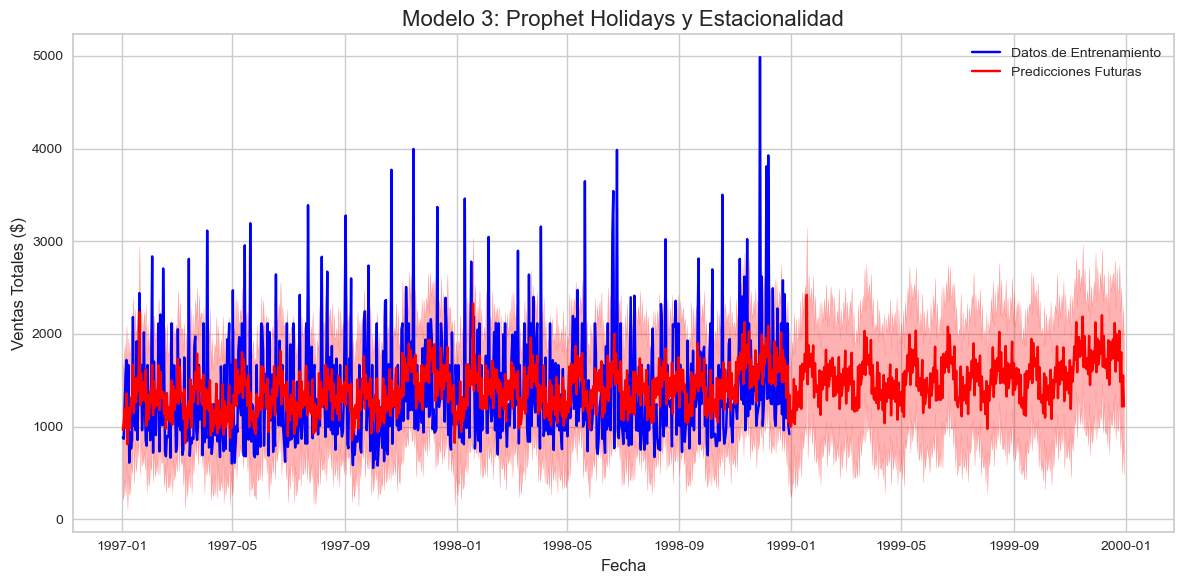

In [202]:
# Graficar resultados
plt.figure(figsize=(12, 6))
plt.plot(supermarket_data['ds'], supermarket_data['y'], label='Datos de Entrenamiento', color='blue')
plt.plot(forecast3['ds'], forecast3['yhat'], label='Predicciones Futuras', color='red')
plt.fill_between(forecast3['ds'], forecast3['yhat_lower'], forecast3['yhat_upper'], color='red', alpha=0.3)
plt.title('Modelo 3: Prophet Holidays y Estacionalidad', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Ventas Totales ($)', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()


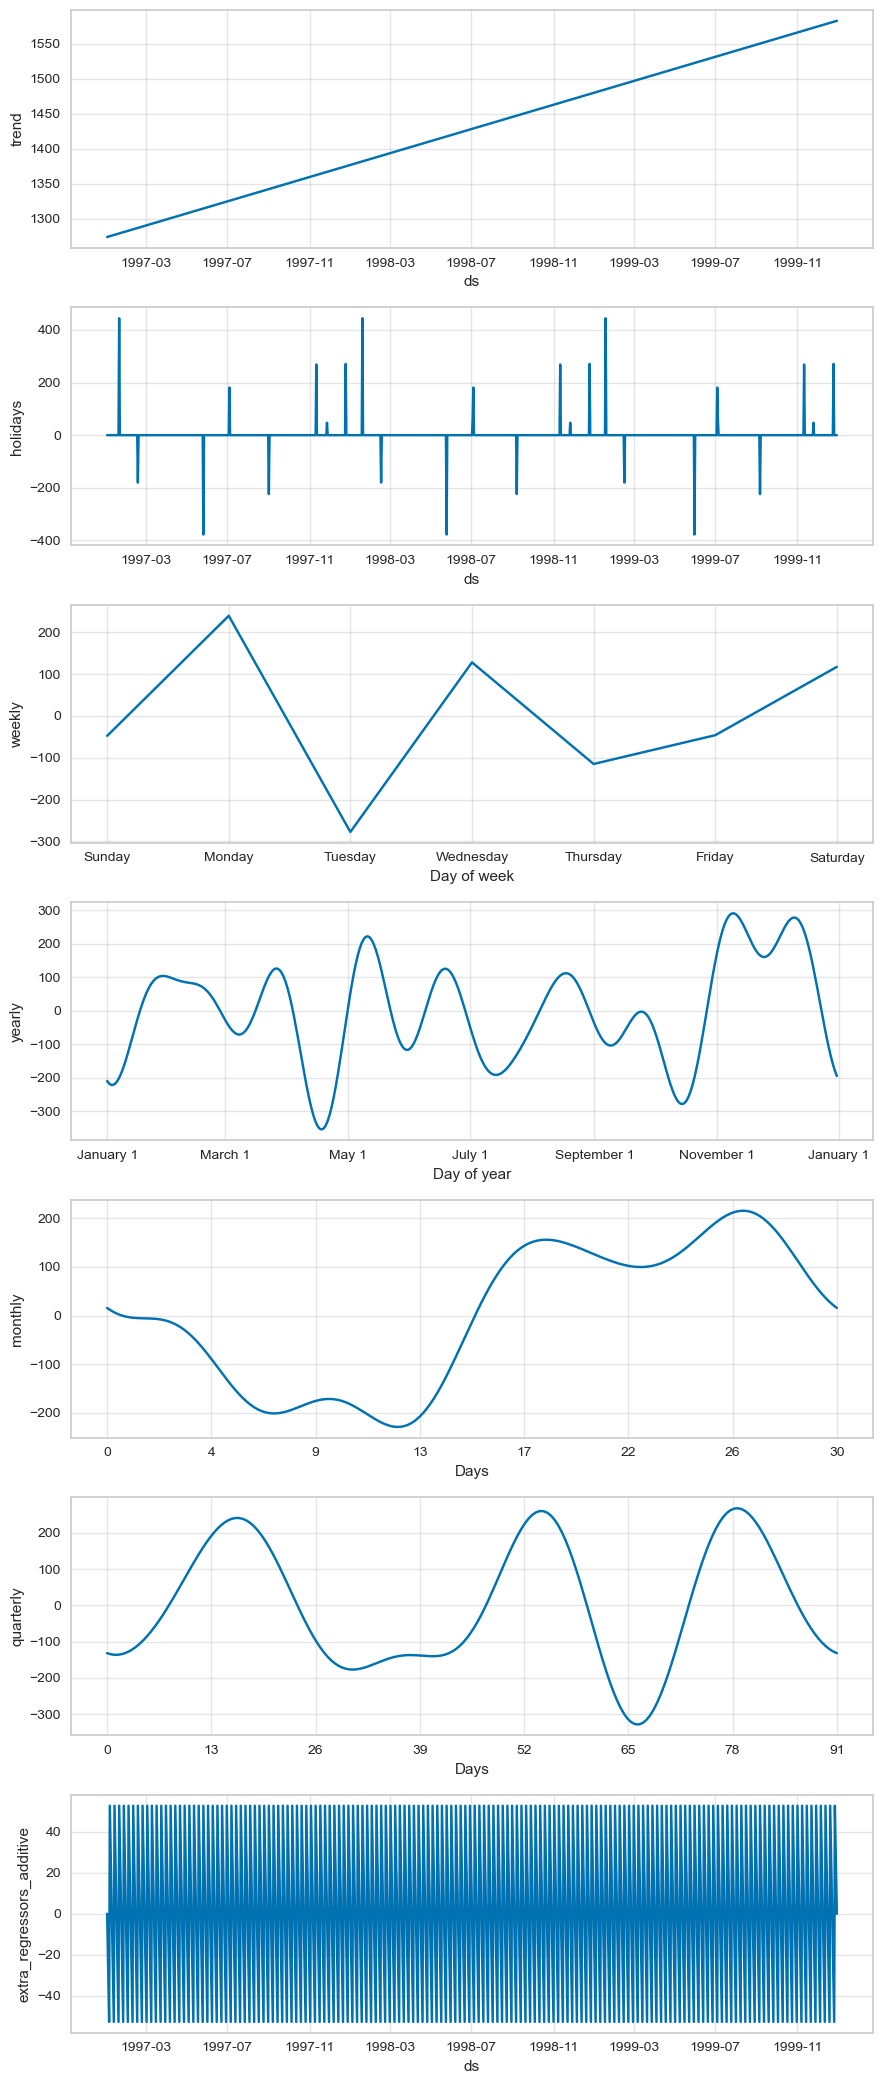

In [203]:
fig = model3.plot_components(forecast3)

### Separación datos de entramiento y validación

In [204]:
# Fecha para dividir los datos en entrenamiento y validación
split_date = '1998-09-01'  
train_df = supermarket_data[supermarket_data['ds'] < split_date]
valid_df = supermarket_data[supermarket_data['ds'] >= split_date].copy() 

### Modelo 1 Standard

In [205]:
tmodel1 = Prophet()
tmodel1.fit(train_df[['ds', 'y']])
# Predicciones
tforecast1 = tmodel1.predict(tmodel1.make_future_dataframe(periods=365, freq='D'))

12:32:06 - cmdstanpy - INFO - Chain [1] start processing
12:32:06 - cmdstanpy - INFO - Chain [1] done processing


### Modelo 2 Prophet días de la semana y estacionalidad

In [206]:
tmodel2 = Prophet()
tmodel2.add_regressor('day_of_week')  
tmodel2.add_seasonality(name='weekly', period=7, fourier_order=3)
tmodel2.add_seasonality(name='yearly', period=365.25, fourier_order=10)
tmodel2.add_seasonality(name='monthly', period=30.5, fourier_order=5)
tmodel2.add_seasonality(name='quarterly', period=91.25, fourier_order=5) 
tmodel2.fit(train_df)
# Se crea dataframe para predicciones futuras
tfuture = tmodel2.make_future_dataframe(periods=365, freq='D')

# Se añade columna day_of_week como ds
tfuture['day_of_week'] = tfuture['ds'].dt.dayofweek  

tforecast2 = tmodel2.predict(tfuture)

12:32:06 - cmdstanpy - INFO - Chain [1] start processing
12:32:06 - cmdstanpy - INFO - Chain [1] done processing


### Modelo 3 Prophet días holidays, día de la semana y estacionalidad

In [207]:
#MODELO 3 PROPHET HOLIDAYS
tmodel3 = Prophet(holidays=holidays_df) 
tmodel3.add_regressor('day_of_week')
tmodel3.add_seasonality(name='weekly', period=7, fourier_order=3)
tmodel3.add_seasonality(name='yearly', period=365.25, fourier_order=10)
tmodel3.add_seasonality(name='monthly', period=30.5, fourier_order=5)
tmodel3.add_seasonality(name='quarterly', period=91.25, fourier_order=5)  
tmodel3.fit(train_df)

tforecast3 = tmodel3.predict(tfuture)

12:32:07 - cmdstanpy - INFO - Chain [1] start processing
12:32:07 - cmdstanpy - INFO - Chain [1] done processing


In [208]:
#Función para calcular las métricas
def calculate_metrics(real, predicted, lower, upper):
    rmse = mean_squared_error(real, predicted, squared=False)
    mae = mean_absolute_error(real, predicted)
    mape = np.mean(np.abs((real - predicted) / real)) * 100
    mdape = np.median(np.abs((real - predicted) / real)) * 100
    smape = 100 * np.mean(2 * np.abs(predicted - real) / (np.abs(real) + np.abs(predicted)))
    coverage = np.mean((real >= lower) & (real <= upper))
    return rmse, mae, mape, mdape, smape, coverage

In [209]:
tmodels = [tmodel1, tmodel2, tmodel3]
tforecasts = [tforecast1, tforecast2, tforecast3]
results = []

for model, forecast in zip(models, forecasts):
    forecast = forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']]
    valid_data = valid_df.set_index('ds')[['y']]
    forecast = forecast.join(valid_data, how='inner')

    # Calcula las métricas
    metrics = calculate_metrics(
        real=forecast['y'],
        predicted=forecast['yhat'],
        lower=forecast['yhat_lower'],
        upper=forecast['yhat_upper']
    )
    results.append(metrics)

# Almacenar los resultados
metric_names = ['RMSE', 'MAE', 'MAPE', 'MdAPE', 'sMAPE', 'Coverage']
results_df_train = pd.DataFrame(results, columns=metric_names, index=['Modelo 1 train', 'Modelo 2 train', 'Modelo 3 train'])

In [210]:
results_df_train

RMSE         MAE       MAPE      MdAPE      sMAPE  \
Modelo 1 train  675.788128  459.902279  31.617817  24.601911  28.904009   
Modelo 2 train  630.434644  450.586023  30.827171  26.154118  28.383200   
Modelo 3 train  624.220472  442.050446  30.152656  25.927703  27.853596   

                Coverage  
Modelo 1 train  0.842975  
Modelo 2 train  0.859504  
Modelo 3 train  0.859504

Se selecciona el modelo que mejores metricas tiene y se grafica.

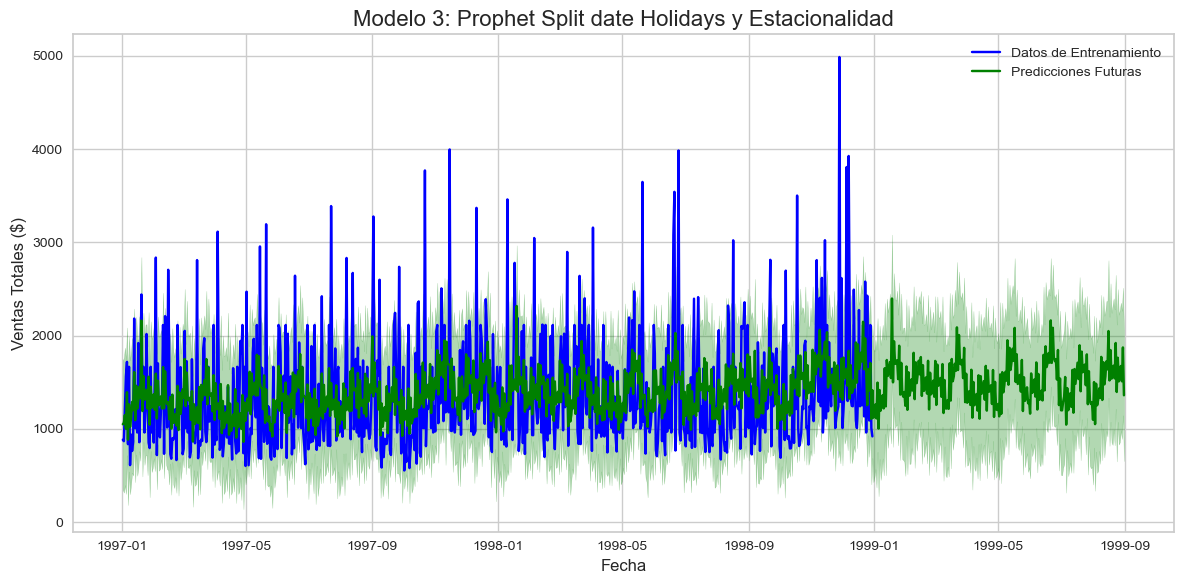

In [211]:
# Graficar resultados
plt.figure(figsize=(12, 6))
plt.plot(supermarket_data['ds'], supermarket_data['y'], label='Datos de Entrenamiento', color='blue')
plt.plot(tforecast3['ds'], tforecast3['yhat'], label='Predicciones Futuras', color='green')
plt.fill_between(tforecast3['ds'], tforecast3['yhat_lower'], tforecast3['yhat_upper'], color='green', alpha=0.3)
plt.title('Modelo 3: Prophet Split date Holidays y Estacionalidad', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Ventas Totales ($)', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

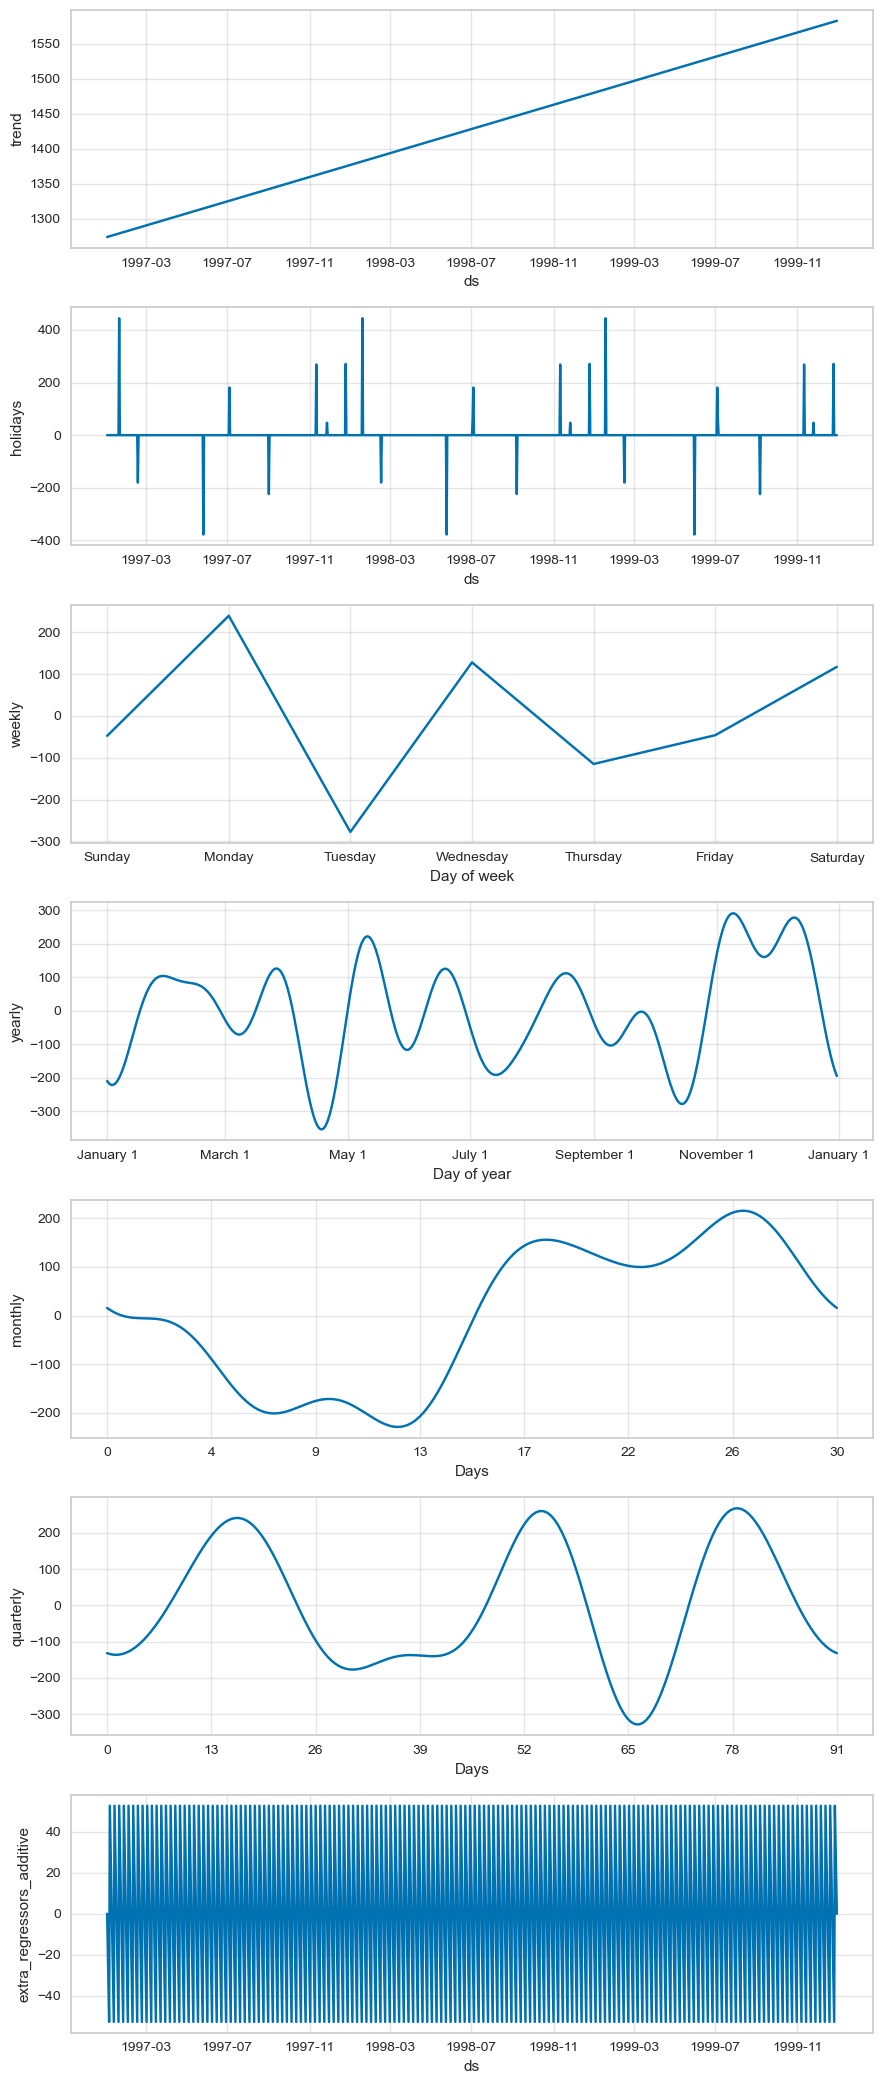

In [212]:
fig = model3.plot_components(forecast3)

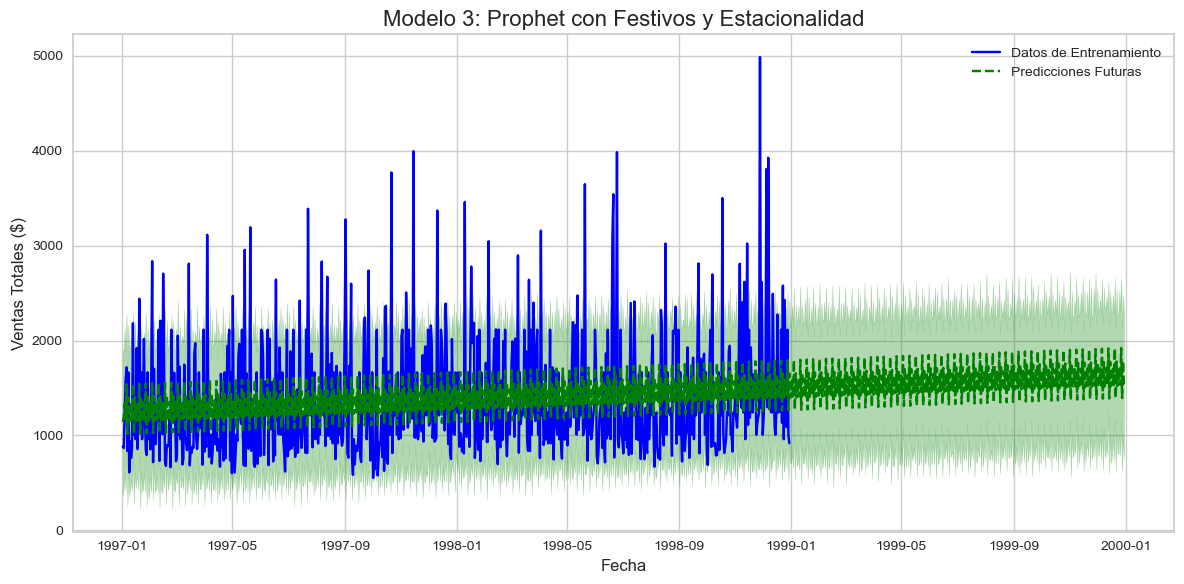

In [213]:
# Graficar los datos de entrenamiento y las predicciones futuras
plt.figure(figsize=(12, 6))
plt.plot(supermarket_data['ds'], supermarket_data['y'], label='Datos de Entrenamiento', color='blue')
plt.plot(forecast1['ds'], forecast1['yhat'], label='Predicciones Futuras', color='green', linestyle='--')
plt.fill_between(forecast1['ds'], forecast1['yhat_lower'], forecast1['yhat_upper'], color='green', alpha=0.3)
plt.title('Modelo 3: Prophet con Festivos y Estacionalidad', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Ventas Totales ($)', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

Se analiza la estacionalidad

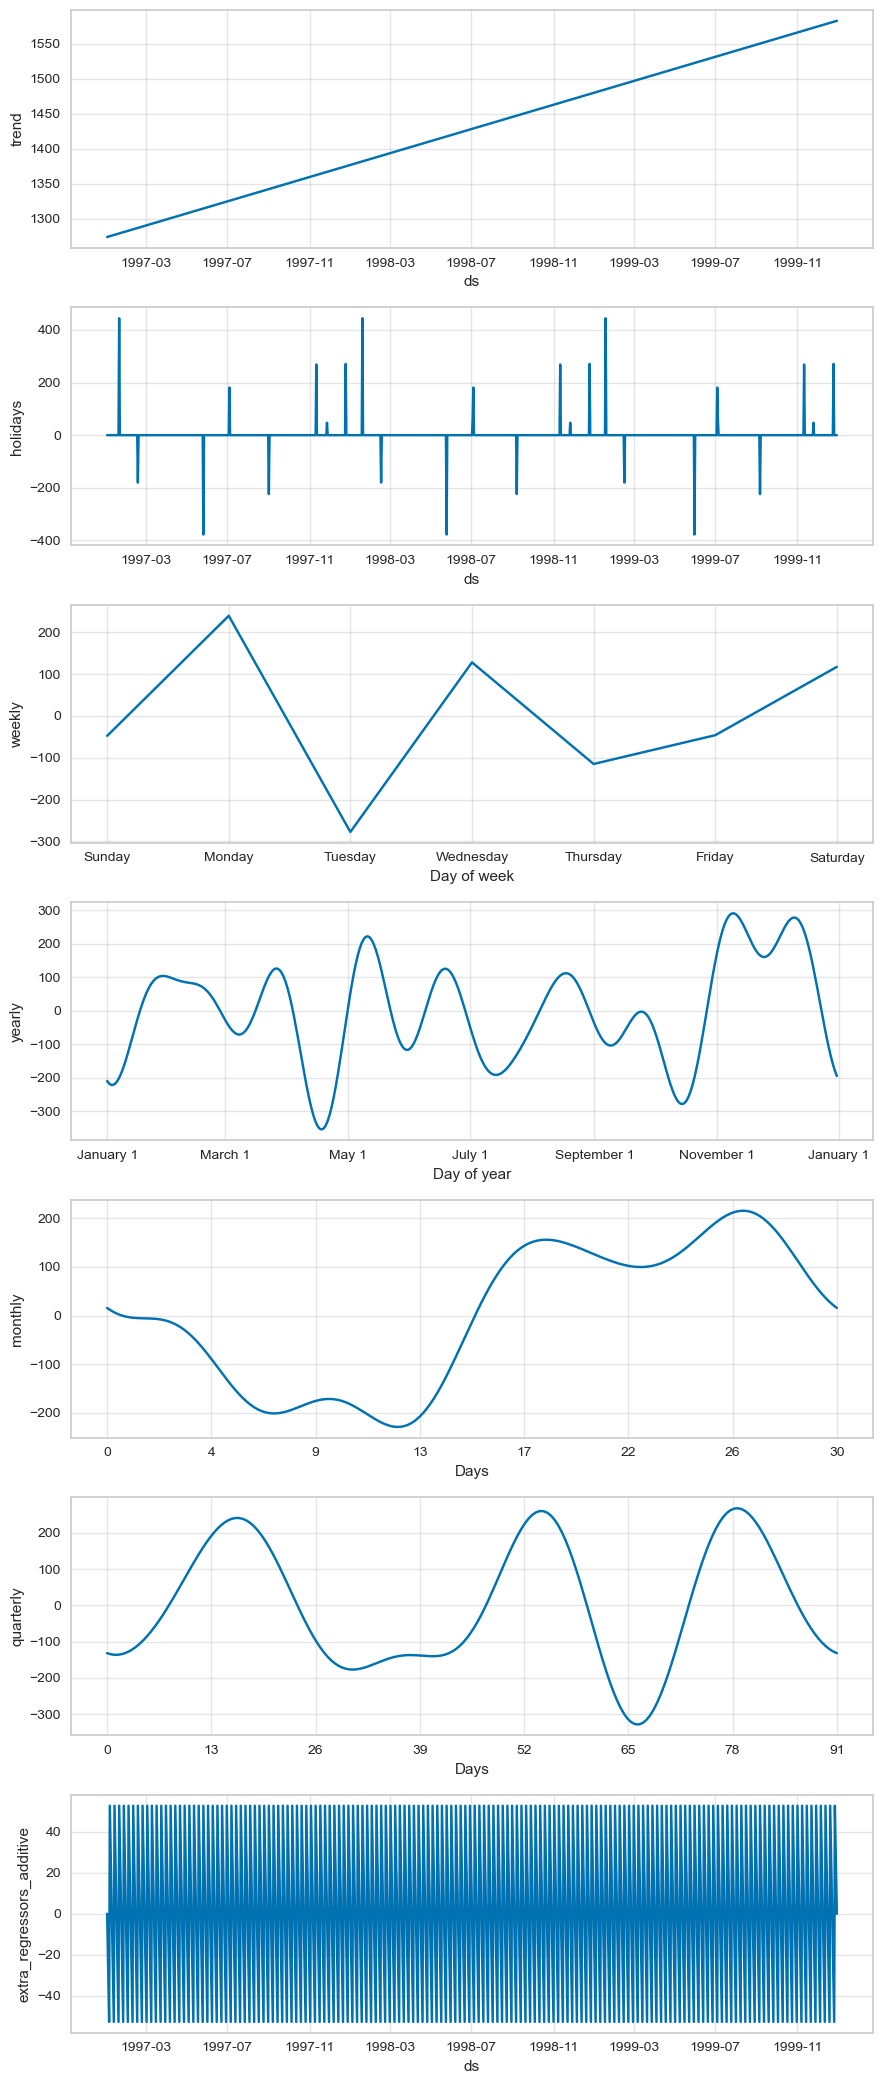

In [214]:
fig = model3.plot_components(forecast3)

### CROSS VALIDATION PROPHET

In [215]:
# Diccionario para almacenar las métricas de todos los modelos
cv_metrics = {}
logging.getLogger('cmdstanpy').setLevel(logging.CRITICAL)

### MODELO 0 PROPHET HORIZON 30 PERIOD 7

In [216]:
# Validación cruzada
df_cv0 = cross_validation(model1, initial='365 days', period='7 days', horizon='30 days')
metrics0 = performance_metrics(df_cv0)

# Guardar métricas
cv_metrics['Modelo 1 H30,P7'] = metrics0.mean()
df_cv0 = df_cv0.drop_duplicates(subset=['ds'], keep='last')
# Mostrar métricas
cv_metrics['Modelo 1 H30,P7']

  0%|          | 0/48 [00:00<?, ?it/s]

horizon     16 days 12:00:00
mse            397206.534937
rmse               627.40443
mae               449.569471
mape                0.339478
mdape               0.264625
smape                 0.3014
coverage            0.830605
dtype: object

### MODELO 1 PROPHET  CROSS VALIDATION HORIZON 30 PERIOD 1

In [217]:
# Validación cruzada
df_cv1 = cross_validation(model1, initial='365 days', period='1 days', horizon='30 days')
metrics1 = performance_metrics(df_cv1)

# Guardar métricas
cv_metrics['Modelo 1 H30,P1'] = metrics1.mean()
df_cv1 = df_cv1.drop_duplicates(subset=['ds'], keep='last')
cv_metrics['Modelo 1 H30,P1']

  0%|          | 0/333 [00:00<?, ?it/s]

horizon     16 days 12:00:00
mse             395010.66315
rmse              628.481957
mae               448.440571
mape                0.339458
mdape               0.259412
smape               0.301247
coverage            0.834585
dtype: object

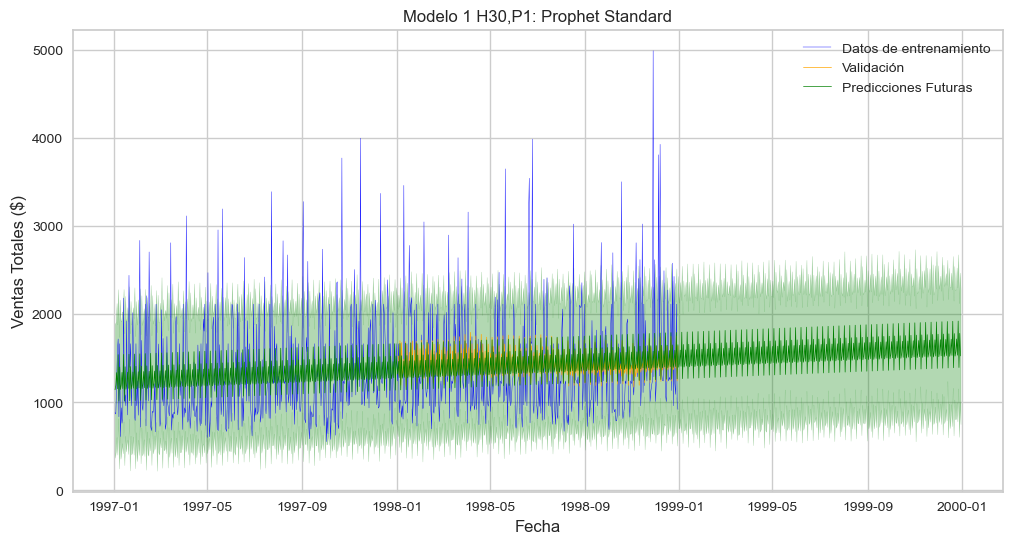

In [218]:
df_cv1 = df_cv1.drop_duplicates(subset=['ds'], keep='last')
# Graficar predicciones
plt.figure(figsize=(12, 6))
plt.plot(supermarket_data['ds'], supermarket_data['y'], label='Datos de entrenamiento', color='blue',linewidth=0.3)
plt.plot(df_cv1['ds'], df_cv1['yhat'], label='Validación', color='orange',linewidth=0.5)
plt.plot(forecast1['ds'], forecast1['yhat'], label='Predicciones Futuras', color='green',  linewidth=0.5)
plt.fill_between(forecast1['ds'], forecast1['yhat_lower'], forecast1['yhat_upper'], color='green', alpha=0.3)
plt.title('Modelo 1 H30,P1: Prophet Standard')
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Ventas Totales ($)', fontsize=12)
plt.legend()
plt.show()

### MODELO 1 PROHET CROSS VALIDATION HORIZON 7 PERIOD 1

In [219]:
# Validación cruzada
df_cv2 = cross_validation(model1, initial='365 days', period='1 days', horizon='7 days')
metrics2 = performance_metrics(df_cv2)

# Guardar métricas
cv_metrics['Modelo 1 H7,P1'] = metrics2.mean()
df_cv2 = df_cv2.drop_duplicates(subset=['ds'], keep='last')
cv_metrics['Modelo 1 H7,P1']

  0%|          | 0/356 [00:00<?, ?it/s]

horizon     4 days 00:00:00
mse           399154.402289
rmse             631.786224
mae              453.256933
mape               0.339765
mdape              0.263618
smape              0.303111
coverage           0.830658
dtype: object

### MODELO 3 PROPHET HORIZON 30 PEDIOD 1  REGRESORES Y ESTACIONALIDAD

  0%|          | 0/332 [00:00<?, ?it/s]

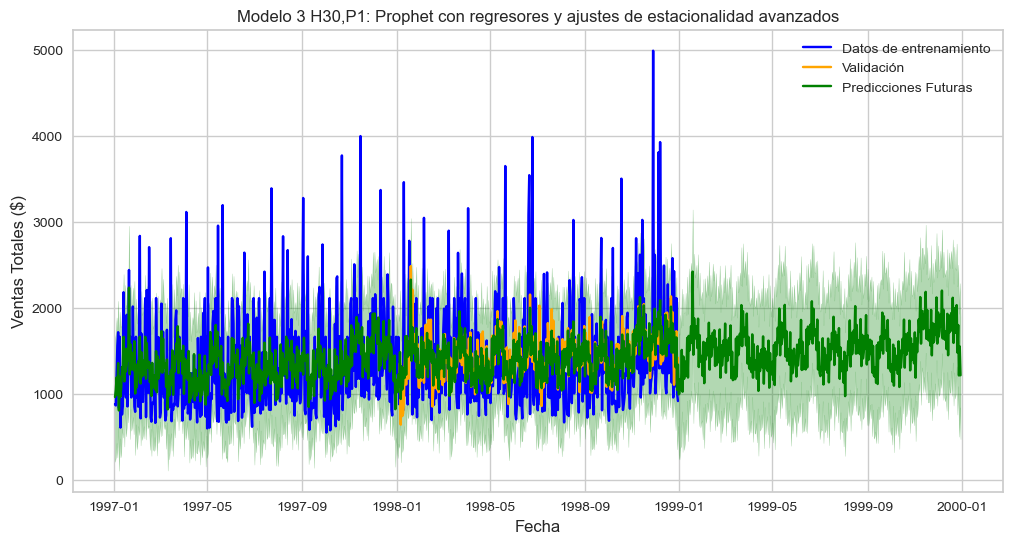

horizon     16 days 12:00:00
mse            420683.398706
rmse              648.588004
mae               468.231941
mape                0.353322
mdape               0.272321
smape                0.31339
coverage            0.798874
dtype: object

In [220]:
# Validación cruzada
df_cv3 = cross_validation(model3, initial='366 days', period='1 day', horizon='30 days')
metrics3 = performance_metrics(df_cv3)

# Guardar métricas
cv_metrics['Modelo 3 H30,P1'] = metrics3.mean()

df_cv3 = df_cv3.drop_duplicates(subset=['ds'], keep='last')
# Graficar predicciones
plt.figure(figsize=(12, 6))
plt.plot(supermarket_data['ds'], supermarket_data['y'], label='Datos de entrenamiento', color='blue')
plt.plot(df_cv3['ds'], df_cv3['yhat'], label='Validación', color='orange')
plt.plot(forecast3['ds'], forecast3['yhat'], label='Predicciones Futuras', color='green')
plt.fill_between(forecast3['ds'], forecast3['yhat_lower'], forecast3['yhat_upper'], color='green', alpha=0.3)
plt.title('Modelo 3 H30,P1: Prophet con regresores y ajustes de estacionalidad avanzados')
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Ventas Totales ($)', fontsize=12)
plt.legend()
plt.show()
cv_metrics['Modelo 3 H30,P1']

### MODELO 3 PROPHET HORIZON 30 PEDIOD 7 REGRESORES, ESTACIONALIDAD Y VACACIONES

  0%|          | 0/48 [00:00<?, ?it/s]

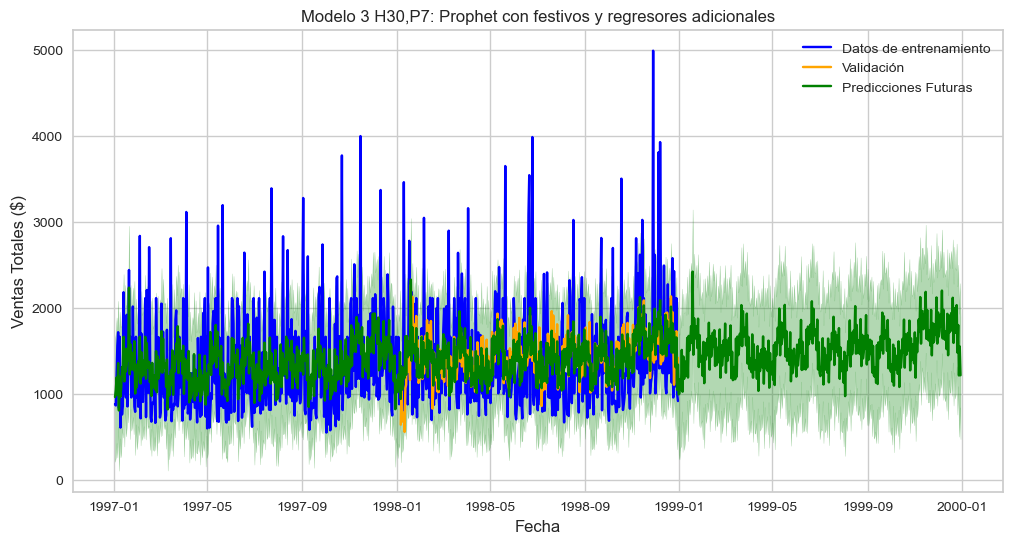

horizon     16 days 12:00:00
mse            422023.275785
rmse              646.860154
mae               468.990952
mape                0.351937
mdape               0.275512
smape               0.313671
coverage            0.802083
dtype: object

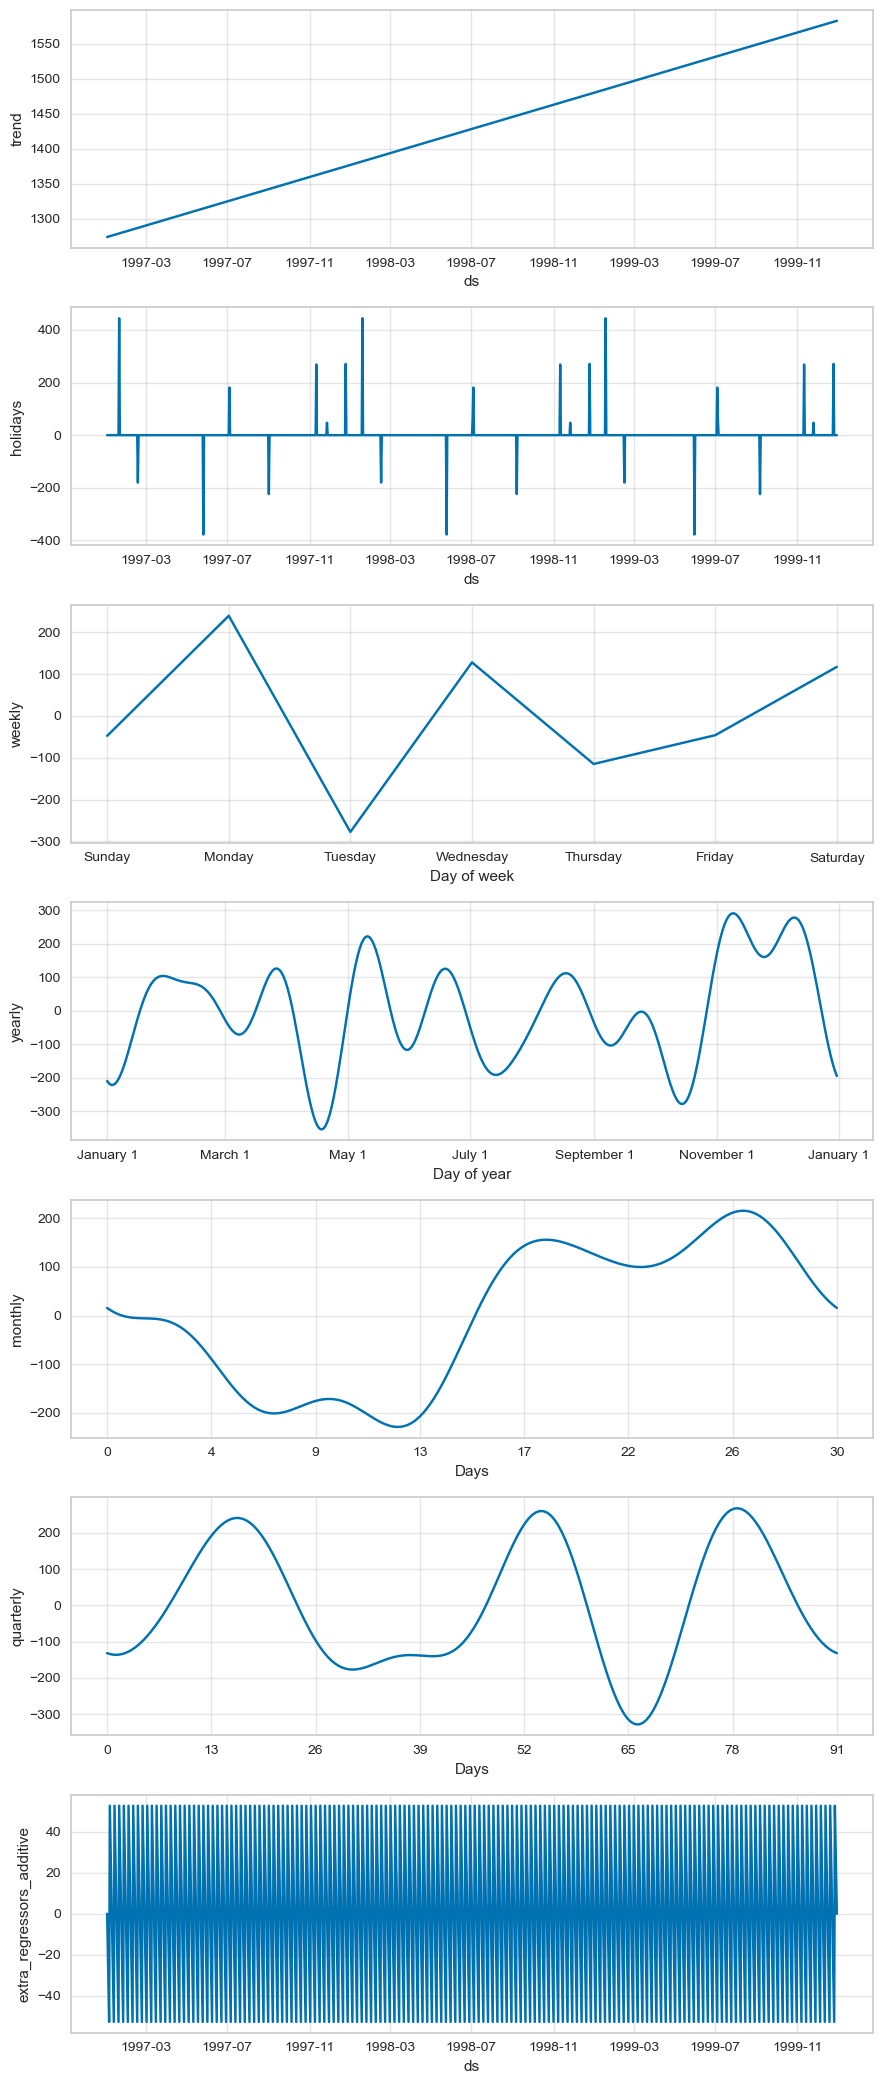

In [221]:
#MODELO 3 PROPHET HOLIDAYS

# Validación cruzada
df_cv4 = cross_validation(model3, initial='366 days', period='7 days', horizon='30 days')
metrics4 = performance_metrics(df_cv4)

# Guardar métricas
cv_metrics['Modelo 3 H30,P7'] = metrics4.mean()

df_cv4 = df_cv4.drop_duplicates(subset=['ds'], keep='last')

# Graficar predicciones
plt.figure(figsize=(12, 6))
plt.plot(supermarket_data['ds'], supermarket_data['y'], label='Datos de entrenamiento', color='blue')
plt.plot(df_cv4['ds'], df_cv4['yhat'], label='Validación', color='orange')
plt.plot(forecast3['ds'], forecast3['yhat'], label='Predicciones Futuras', color='green')
plt.fill_between(forecast3['ds'], forecast3['yhat_lower'], forecast3['yhat_upper'], color='green', alpha=0.3)
plt.title('Modelo 3 H30,P7: Prophet con festivos y regresores adicionales')
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Ventas Totales ($)', fontsize=12)
plt.legend()
plt.show()
fig = model3.plot_components(forecast3)
cv_metrics['Modelo 3 H30,P7']

In [222]:
# Diccionario a DataFrame
cv_metrics_df = pd.DataFrame.from_dict(cv_metrics, orient='index')
cv_metrics_df.reset_index(inplace=True)
cv_metrics_df.rename(columns={'index': 'Modelo'}, inplace=True)

cv_metrics_df

Modelo          horizon            mse        rmse         mae  \
0  Modelo 1 H30,P7 16 days 12:00:00  397206.534937  627.404430  449.569471   
1  Modelo 1 H30,P1 16 days 12:00:00  395010.663150  628.481957  448.440571   
2   Modelo 1 H7,P1  4 days 00:00:00  399154.402289  631.786224  453.256933   
3  Modelo 3 H30,P1 16 days 12:00:00  420683.398706  648.588004  468.231941   
4  Modelo 3 H30,P7 16 days 12:00:00  422023.275785  646.860154  468.990952   

       mape     mdape     smape  coverage  
0  0.339478  0.264625  0.301400  0.830605  
1  0.339458  0.259412  0.301247  0.834585  
2  0.339765  0.263618  0.303111  0.830658  
3  0.353322  0.272321  0.313390  0.798874  
4  0.351937  0.275512  0.313671  0.802083

Se analizan los resultados y se selecciona el mejor modelo obtenido

In [223]:
results_df

RMSE         MAE       MAPE      MdAPE      sMAPE  Coverage
Modelo 1  591.481098  432.213587  33.828926  25.933646  30.269278  0.876204
Modelo 2  570.391208  419.824226  32.647045  25.916953  29.362570  0.881706
Modelo 3  568.949359  418.025094  32.452927  25.947805  29.244514  0.884457

In [224]:
results_df_train

RMSE         MAE       MAPE      MdAPE      sMAPE  \
Modelo 1 train  675.788128  459.902279  31.617817  24.601911  28.904009   
Modelo 2 train  630.434644  450.586023  30.827171  26.154118  28.383200   
Modelo 3 train  624.220472  442.050446  30.152656  25.927703  27.853596   

                Coverage  
Modelo 1 train  0.842975  
Modelo 2 train  0.859504  
Modelo 3 train  0.859504

In [225]:
cv_metrics_df

Modelo          horizon            mse        rmse         mae  \
0  Modelo 1 H30,P7 16 days 12:00:00  397206.534937  627.404430  449.569471   
1  Modelo 1 H30,P1 16 days 12:00:00  395010.663150  628.481957  448.440571   
2   Modelo 1 H7,P1  4 days 00:00:00  399154.402289  631.786224  453.256933   
3  Modelo 3 H30,P1 16 days 12:00:00  420683.398706  648.588004  468.231941   
4  Modelo 3 H30,P7 16 days 12:00:00  422023.275785  646.860154  468.990952   

       mape     mdape     smape  coverage  
0  0.339478  0.264625  0.301400  0.830605  
1  0.339458  0.259412  0.301247  0.834585  
2  0.339765  0.263618  0.303111  0.830658  
3  0.353322  0.272321  0.313390  0.798874  
4  0.351937  0.275512  0.313671  0.802083

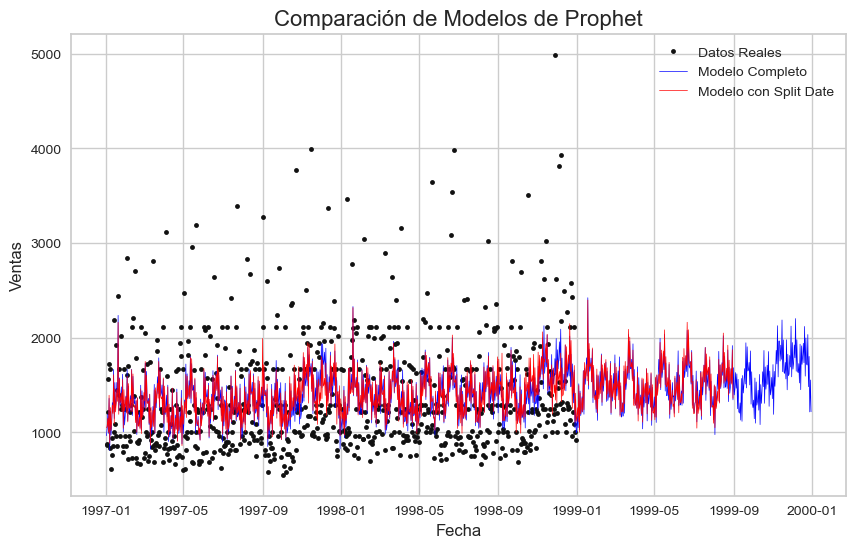

In [226]:
fig, ax = plt.subplots(figsize=(10, 6))

# Datos reales
ax.plot(supermarket_data['ds'], supermarket_data['y'], 'k.', label='Datos Reales')

# Predicciones del modelo completo
ax.plot(forecast3['ds'], forecast3['yhat'], color='blue', linewidth=0.5, label='Modelo Completo')

# Predicciones del modelo con split date
ax.plot(tforecast3['ds'], tforecast3['yhat'], color='red', linewidth=0.5, label='Modelo con Split Date')

# Título y etiquetas
ax.set_title('Comparación de Modelos de Prophet', fontsize=16)
ax.set_xlabel('Fecha', fontsize=12)
ax.set_ylabel('Ventas', fontsize=12)

# Mostrar leyenda
ax.legend()

# Mostrar gráfico
plt.show()